# Data Analysis & EDA

### Import required libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

### Load the all datasets

In [2]:
monthly_1990 = pd.read_csv(r'C:\House_price\notebook\data\monthly_data_1990.csv', index_col='date')
qtr_2000 = pd.read_csv(r'C:\House_price\notebook\data\hpi_quarterly_data.csv', index_col='date')
hp_idx = pd.read_csv(r'C:\House_price\notebook\data\hpi_monthly_data.csv', index_col='date')
hp_idx_qtr = pd.read_csv(r'C:\US-Housing-Analysis\data\hpi_quarterly_data.csv', index_col='date')

Load the all above datasets and insert the date as a Index

In [3]:
datasets = [monthly_1990, qtr_2000, hp_idx, hp_idx_qtr]

for d in datasets:
    d.index = pd.to_datetime(d.index).normalize()

this code iterates through a list of datasets, assumes that each dataset has a datetime index, and normalizes the datetime index of each dataset by removing the time component, keeping only the date information. This can be useful if you want to standardize the format of datetime indices across multiple datasets for further analysis or manipulation

In [4]:
# Rename quarterly index

hp_idx_qtr.rename(columns={'hp_idx': 'hp_idx_qtr'}, inplace=True)

In [5]:
x_mnth = monthly_1990.join(hp_idx, how='inner')

In [6]:
x_mnth

spend  permits  permit_val  starts  completions  manufactured  \
date                                                                         
1993-01-01  194150      989    5383.028    1091        975.0           248   
1993-02-01  194689      953    5844.533    1063       1043.0           248   
1993-03-01  190185      881    8227.729     950        983.0           241   
1993-04-01  198296      922    8918.858    1110       1067.0           241   
1993-05-01  198835      911    8320.702    1128        973.0           240   
...            ...      ...         ...     ...          ...           ...   
2020-08-01  641103     1055   21995.756    1023        895.0            94   
2020-09-01  662353     1121   23179.135    1105        933.0            96   
2020-10-01  684180     1141   23846.574    1162        898.0           100   
2020-11-01  702717     1155   19839.048    1182        913.0           101   
2020-12-01  725025     1233   22196.074    1315        958.0           104   

            new_for_sale  months_supply  emratio  pop_level        gdp  \
date                                                                     
1993-01-01           265            5.4     61.4     193962  99.750560   
1993-02-01           263            5.3     61.4     194108  99.668158   
1993-03-01           268            5.4     61.5     194248  99.585598   
1993-04-01           270            4.7     61.5     194398  99.511168   
1993-05-01           273            5.3     61.7     194549  99.450667   
...                  ...            ...      ...        ...        ...   
2020-08-01           286            3.5     56.5     260558  97.297319   
2020-09-01           286            2.5     56.6     260742  97.433292   
2020-10-01           284            3.5     57.4     260925  97.572374   
2020-11-01           290            4.0     57.4     261085  97.726275   
2020-12-01           299            3.8     57.4     261230  98.095174   

            mortgage_rate  fed_fund_rate  disp_income  pm_save  \
date                                                             
1993-01-01         7.9925           2.66       7237.6    425.6   
1993-02-01         7.6825           3.25       7271.8    441.5   
1993-03-01         7.4950           3.65       7249.2    439.0   
1993-04-01         7.4720           3.31       7286.8    436.4   
1993-05-01         7.4650           3.01       7276.3    415.8   
...                   ...            ...          ...      ...   
2020-08-01         2.9350           0.10      15739.2   2714.5   
2020-09-01         2.8900           0.09      15799.7   2569.3   
2020-10-01         2.8340           0.09      15729.1   2462.2   
2020-11-01         2.7650           0.09      15522.5   2311.5   
2020-12-01         2.6840           0.09      15536.5   2402.8   

            consump_durable  new_sold   hp_idx  
date                                            
1993-01-01            538.1       596   76.783  
1993-02-01            524.2       604   76.836  
1993-03-01            521.2       602   76.867  
1993-04-01            543.0       701   76.936  
1993-05-01            552.0       626   77.037  
...                     ...       ...      ...  
2020-08-01           1791.7      1029  222.484  
2020-09-01           1817.8       988  225.937  
2020-10-01           1826.1      1027  229.888  
2020-11-01           1803.1       863  233.253  
2020-12-01           1797.2       873  236.433  

[348 rows x 18 columns]

In [7]:
x_qtr = qtr_2000.join(hp_idx_qtr, how='inner')

In [8]:
x_qtr

hp_idx  hp_idx_qtr
date                              
1987-01-01   64.374667   64.374667
1987-04-01   65.588333   65.588333
1987-07-01   66.924667   66.924667
1987-10-01   68.116333   68.116333
1988-01-01   69.252667   69.252667
...                ...         ...
2021-04-01  253.658000  253.658000
2021-07-01  266.828000  266.828000
2021-10-01  277.493667  277.493667
2022-01-01  290.924667  290.924667
2022-04-01  302.264500  302.264500

[142 rows x 2 columns]

## Exploratory Data Analysis

#### Statistics of the Monthly and Quarterly

In [9]:
x_mnth.describe()

spend      permits    permit_val       starts  completions  \
count     348.000000   348.000000    348.000000   348.000000   348.000000   
mean   388468.896552   978.086207  13436.704716  1021.948276  1008.341954   
std    131929.281264   350.756496   5004.263997   364.981422   350.616782   
min    190185.000000   337.000000   4187.117000   353.000000   368.000000   
25%    262888.500000   678.750000   9384.458500   717.250000   713.500000   
50%    365905.000000  1014.500000  12819.002500  1106.500000  1059.000000   
75%    507904.500000  1232.250000  16737.504500  1277.750000  1262.000000   
max    725025.000000  1798.000000  28099.586000  1823.000000  1911.000000   

       manufactured  new_for_sale  months_supply     emratio      pop_level  \
count    348.000000    348.000000     348.000000  348.000000     348.000000   
mean     163.908046    309.563218       5.547989   61.448276  228248.660920   
std      110.532443     97.260866       1.786734    2.227836   20452.252824   
min       40.000000    142.000000       2.500000   51.300000  193962.000000   
25%       75.000000    256.250000       4.200000   59.550000  211956.500000   
50%      113.000000    300.000000       5.100000   62.300000  228791.500000   
75%      249.500000    342.000000       6.300000   63.100000  246221.250000   
max      390.000000    570.000000      12.200000   64.700000  261230.000000   

              gdp  mortgage_rate  fed_fund_rate   disp_income      pm_save  \
count  348.000000     348.000000     348.000000    348.000000   348.000000   
mean    99.920825       5.770086       2.611494  11069.916667   700.559195   
std      1.146031       1.608015       2.242938   2285.997015   590.672049   
min     91.633777       2.684000       0.040000   7236.400000   193.400000   
25%     99.558040       4.195000       0.200000   9406.300000   379.075000   
50%     99.963766       5.930250       2.040000  11196.000000   453.250000   
75%    100.495975       7.067500       5.055000  12495.975000   938.875000   
max    101.861821       9.198000       7.800000  17246.200000  6428.100000   

       consump_durable     new_sold     hp_idx  
count       348.000000   348.000000  348.00000  
mean       1058.056322   721.807471  141.39667  
std         276.321557   264.030389   42.37160  
min         521.200000   270.000000   76.78300  
25%         903.225000   504.750000  102.72300  
50%        1077.200000   704.500000  144.78800  
75%        1198.500000   893.000000  175.91350  
max        1826.100000  1389.000000  236.43300

Insights
* summary statistics table for various economic and housing-related variables. Here's a brief description of the information presented:

* Count: There are 348 data points for each variable, indicating the number of observations or data entries available for analysis.

- Mean: The "mean" row represents the average value for each variable over the dataset. For example, the mean spend is approximately 388,469, and the mean permits are approximately 978.

- Std (Standard Deviation): The "std" row provides the standard deviation, which measures the amount of variation or dispersion in the data. A higher standard deviation indicates greater variability in the variable.

- Min (Minimum): The "min" row shows the minimum value observed in the dataset for each variable. For example, the minimum spend is approximately 190,185.

- Max (Maximum): The "max" row displays the maximum value observed in the dataset for each variable. For instance, the maximum spend is approximately 725,025.

In [10]:
x_qtr.describe()

hp_idx  hp_idx_qtr
count  142.000000  142.000000
mean   136.274931  136.274931
std     54.340831   54.340831
min     64.374667   64.374667
25%     81.707000   81.707000
50%    139.580667  139.580667
75%    175.173167  175.173167
max    302.264500  302.264500

Insights
* summary statistics for six different variables:

1. **rent_vacancy:** The data includes 88 observations for the rent vacancy rate. The mean (average) rent vacancy rate is approximately 8.48%, with a minimum value of 5.6% and a maximum value of 11.1%. The data exhibits a relatively low standard deviation of approximately 1.46%, indicating relatively low variability around the mean.

2. **owner_vacancy:** Similarly, there are 88 observations for the owner vacancy rate. The mean owner vacancy rate is approximately 1.91%, with values ranging from a minimum of 0.9% to a maximum of 2.9%. The standard deviation is approximately 0.52%, suggesting relatively consistent values.

3. **week_earning:** This variable includes 88 observations for weekly earnings. The mean weekly earnings are approximately 800.81 units, with a minimum of 603 units and a maximum of 1069 units. The data exhibits a moderate standard deviation of approximately 124.45 units, indicating some variability around the mean.

4. **delinquent_rate:** The dataset contains 88 observations for the delinquent rate. The mean delinquent rate is approximately 4.64%, with values ranging from a minimum of 1.41% to a maximum of 11.48%. The standard deviation is approximately 3.25%, indicating some variability in the delinquent rate.

5. **hor:** This variable represents the "hor" values, with 88 observations. The mean value is approximately 66.43, and it ranges from a minimum of 62.9 to a maximum of 69.2. The standard deviation is relatively low at approximately 1.84, indicating that the "hor" values are relatively close to the mean.

6. **hp_idx_qtr:** Finally, "hp_idx_qtr" includes 88 observations. The mean value is approximately 166.13, with values ranging from a minimum of 101.34 to a maximum of 277.49. The standard deviation is approximately 36.56, suggesting notable variability in the "hp_idx_qtr" variable.

### Outliers detection in Monthly and Querterly dataset

In [11]:
def detect_outlier(df_in:pd.DataFrame):
    
    df_out = df_in.copy()
    
    for c in df_out.columns:
        q1 = df_out[c].quantile(0.25)
        q3 = df_out[c].quantile(0.75)
        
        iqr = q3 - q1
        a, b = q1-1.5*iqr, q3+1.5*iqr
        
        df_out['out_' + c] = (df_out[c] < a) | (df_out[c] > b)
        
    return df_out

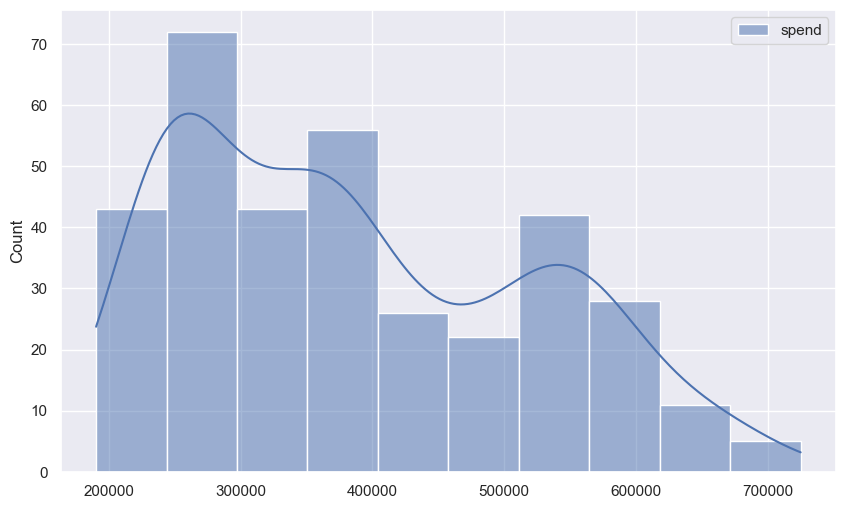

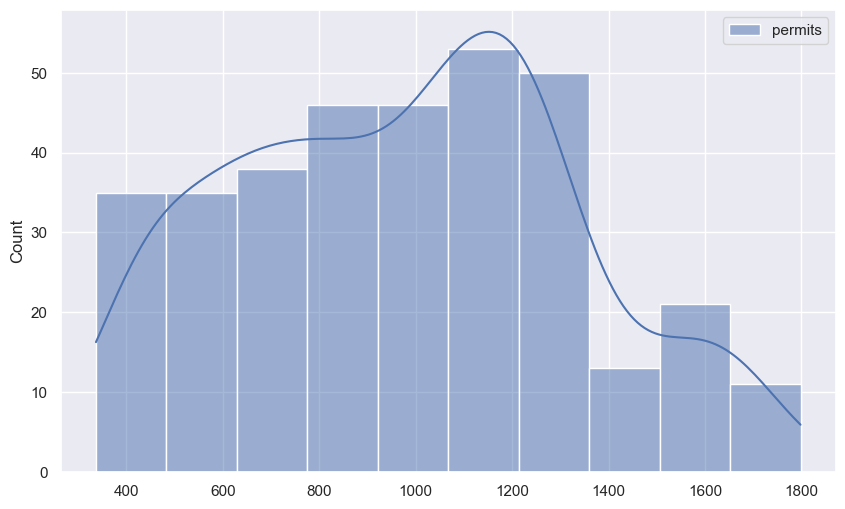

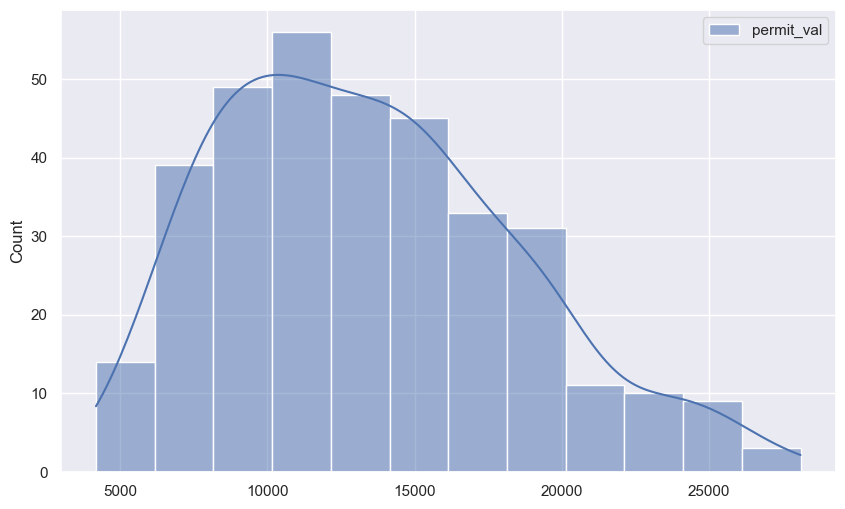

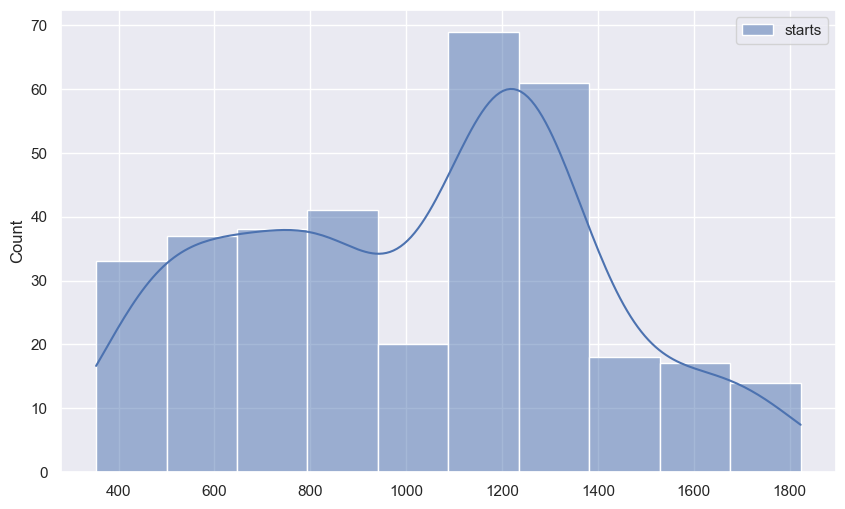

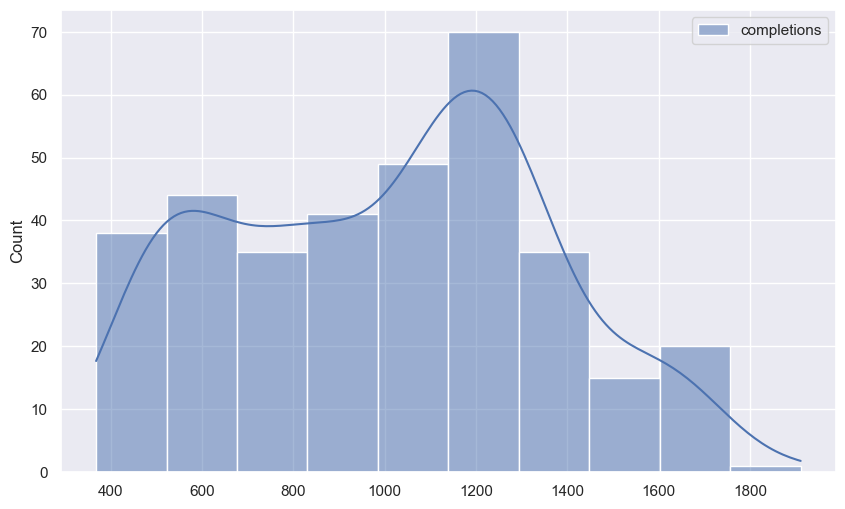

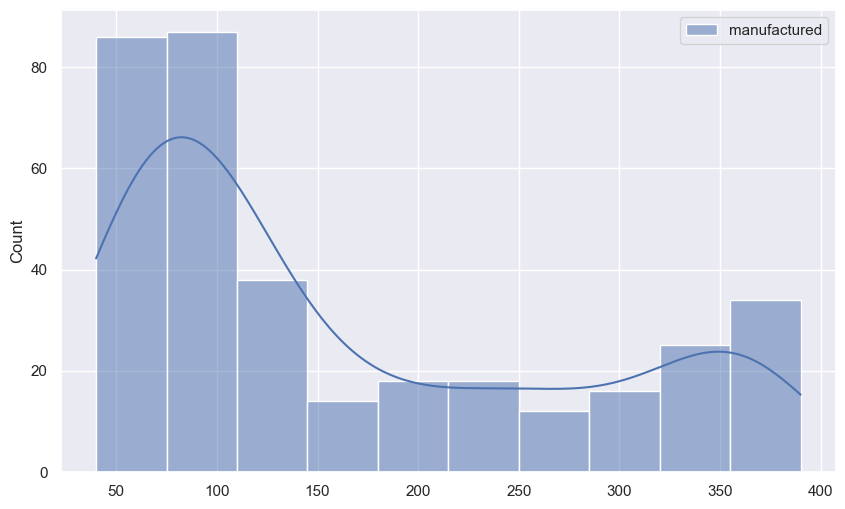

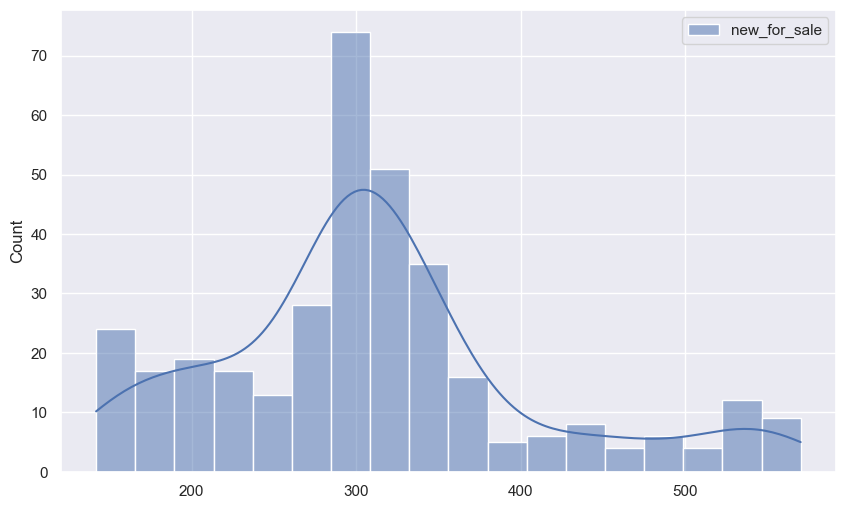

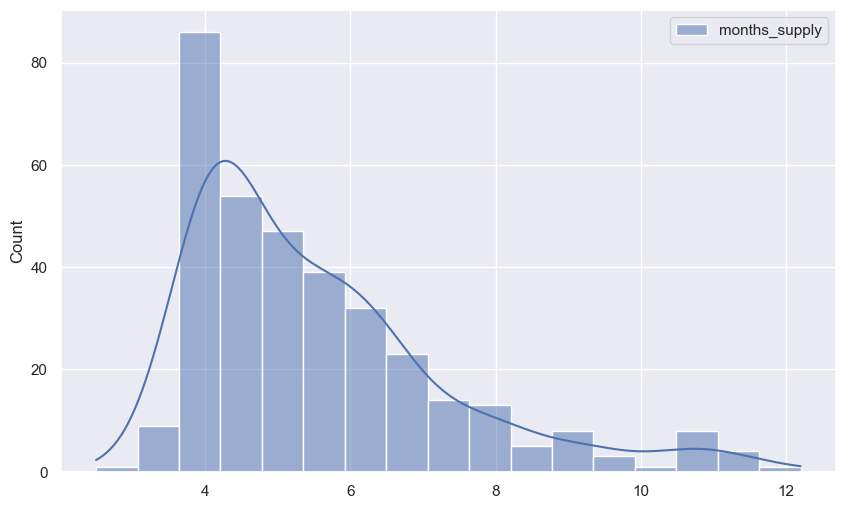

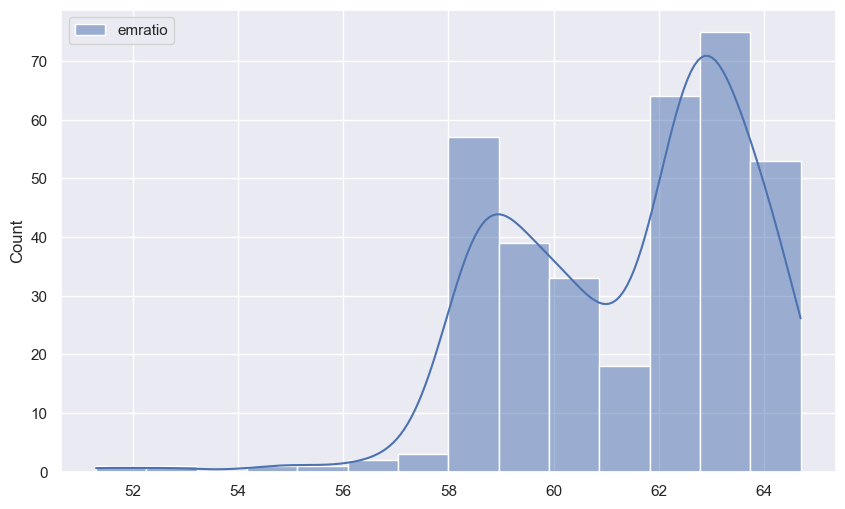

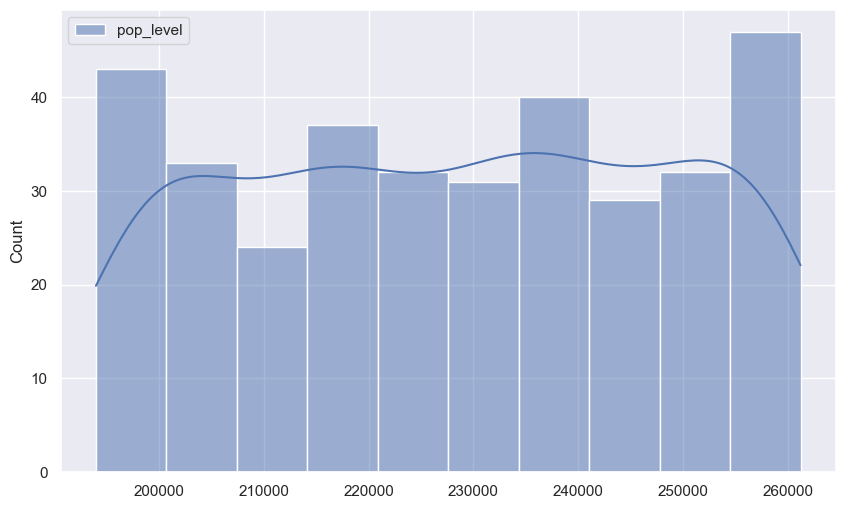

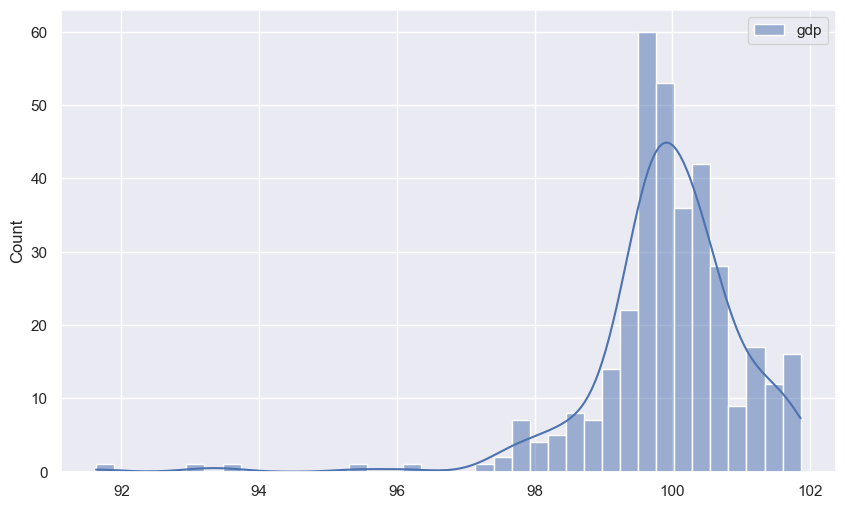

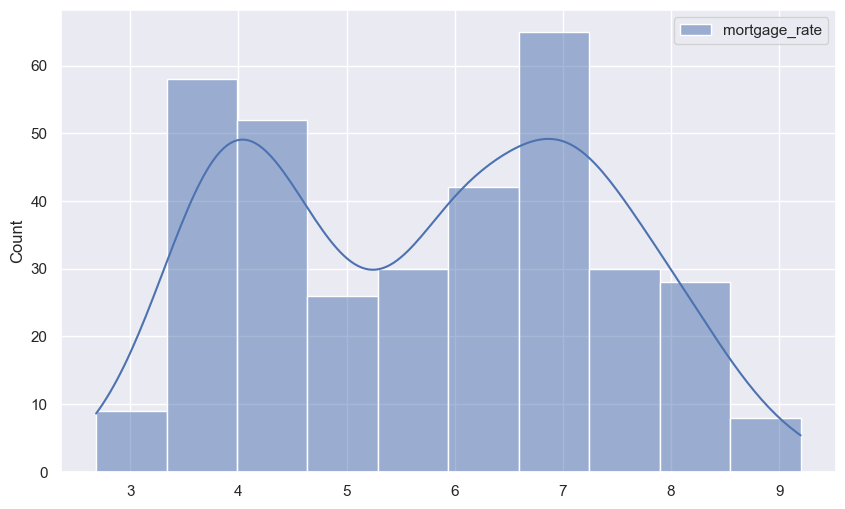

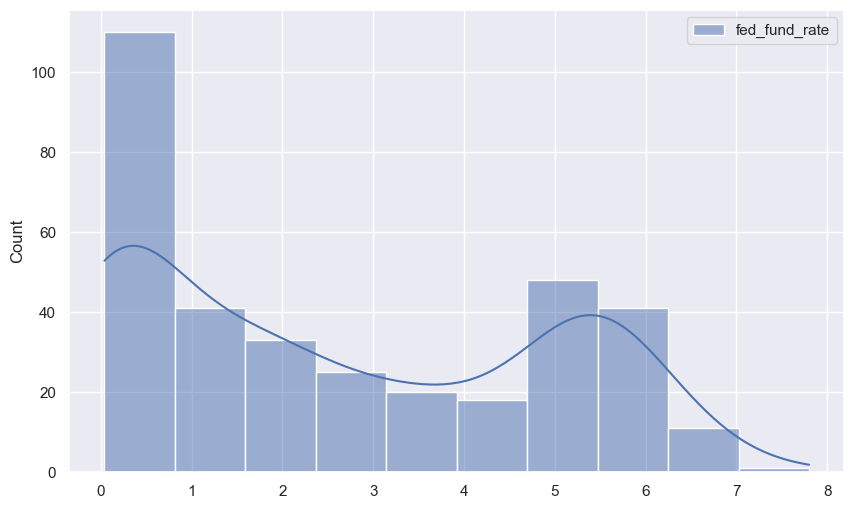

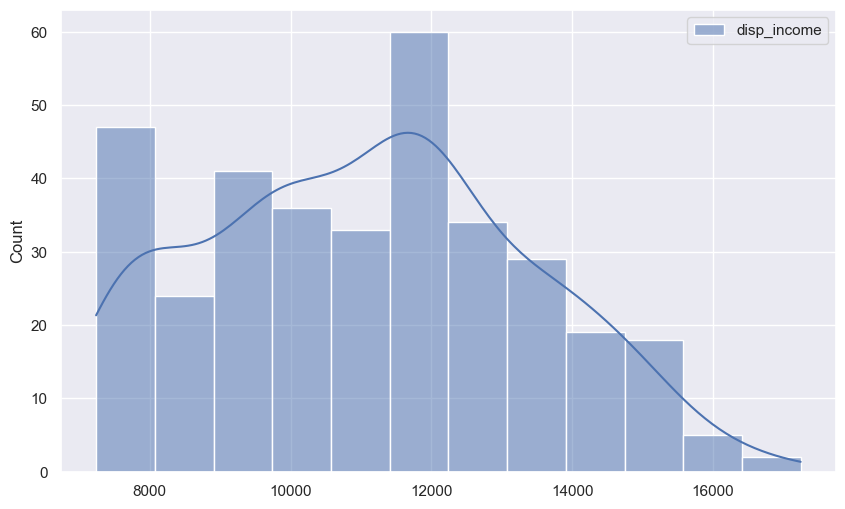

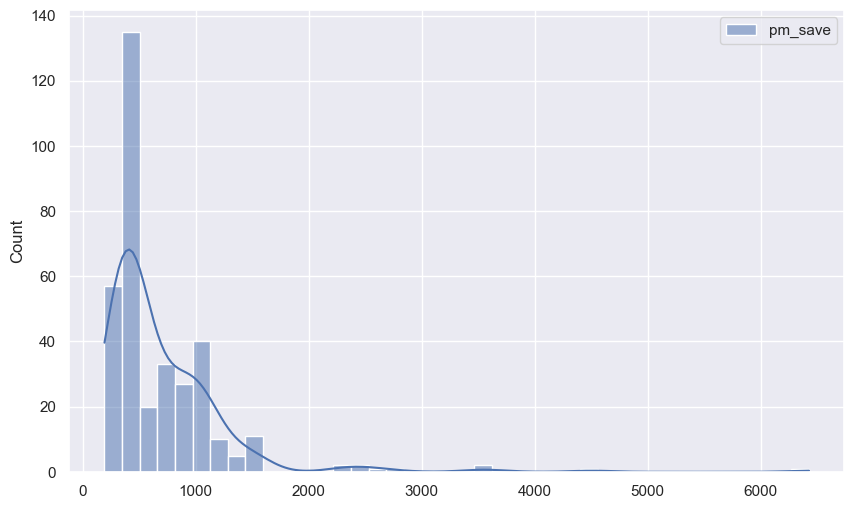

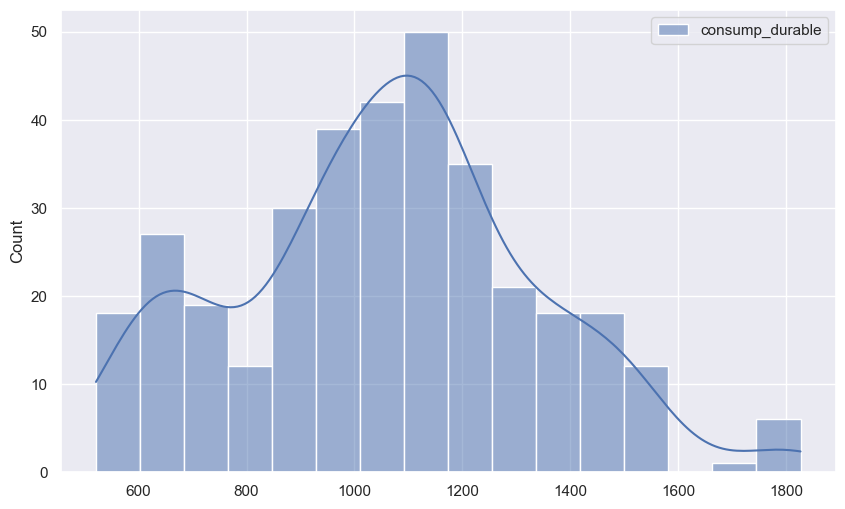

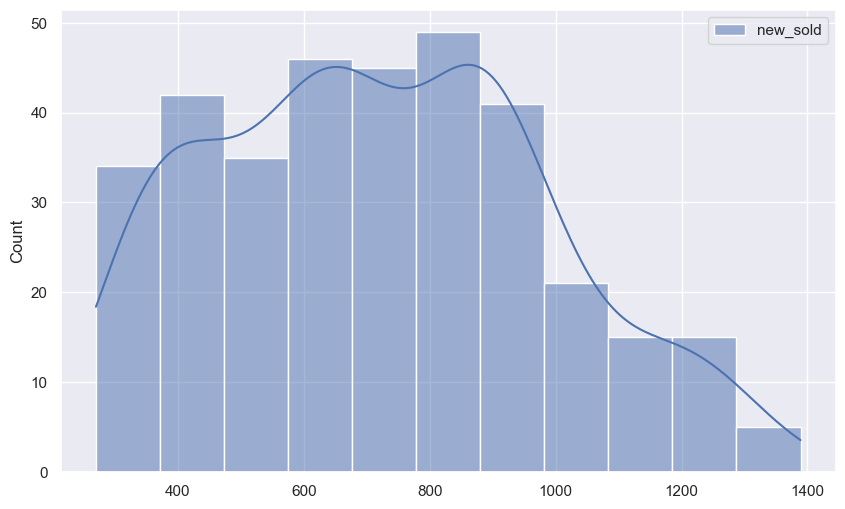

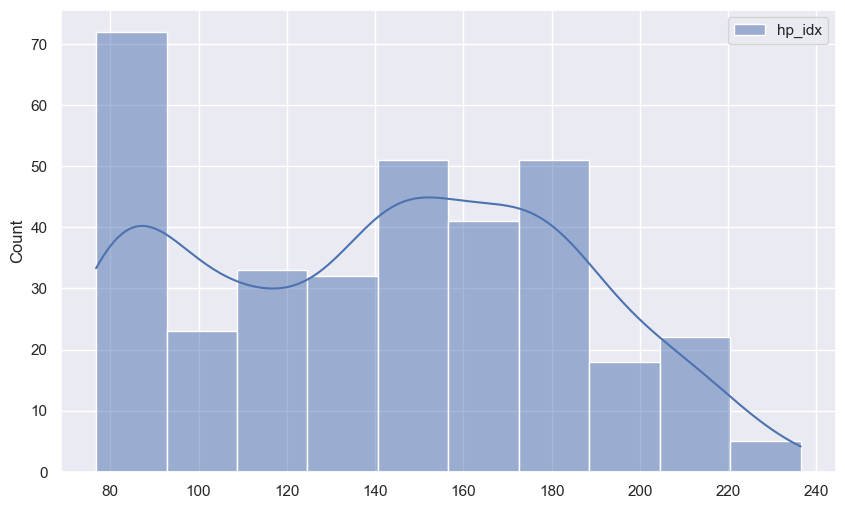

In [12]:
plt.close('all')

# Define the desired figure size (width, height) in inches
fig_size = (10, 6)  # You can adjust the width and height as needed

for col in x_mnth.columns:
    f, ax = plt.subplots(figsize=fig_size)  # Set the figure size
    
    sns.histplot(x_mnth[[col]], ax=ax, kde=True)

plt.show()


In [13]:
x_mnth_out = detect_outlier(x_mnth)

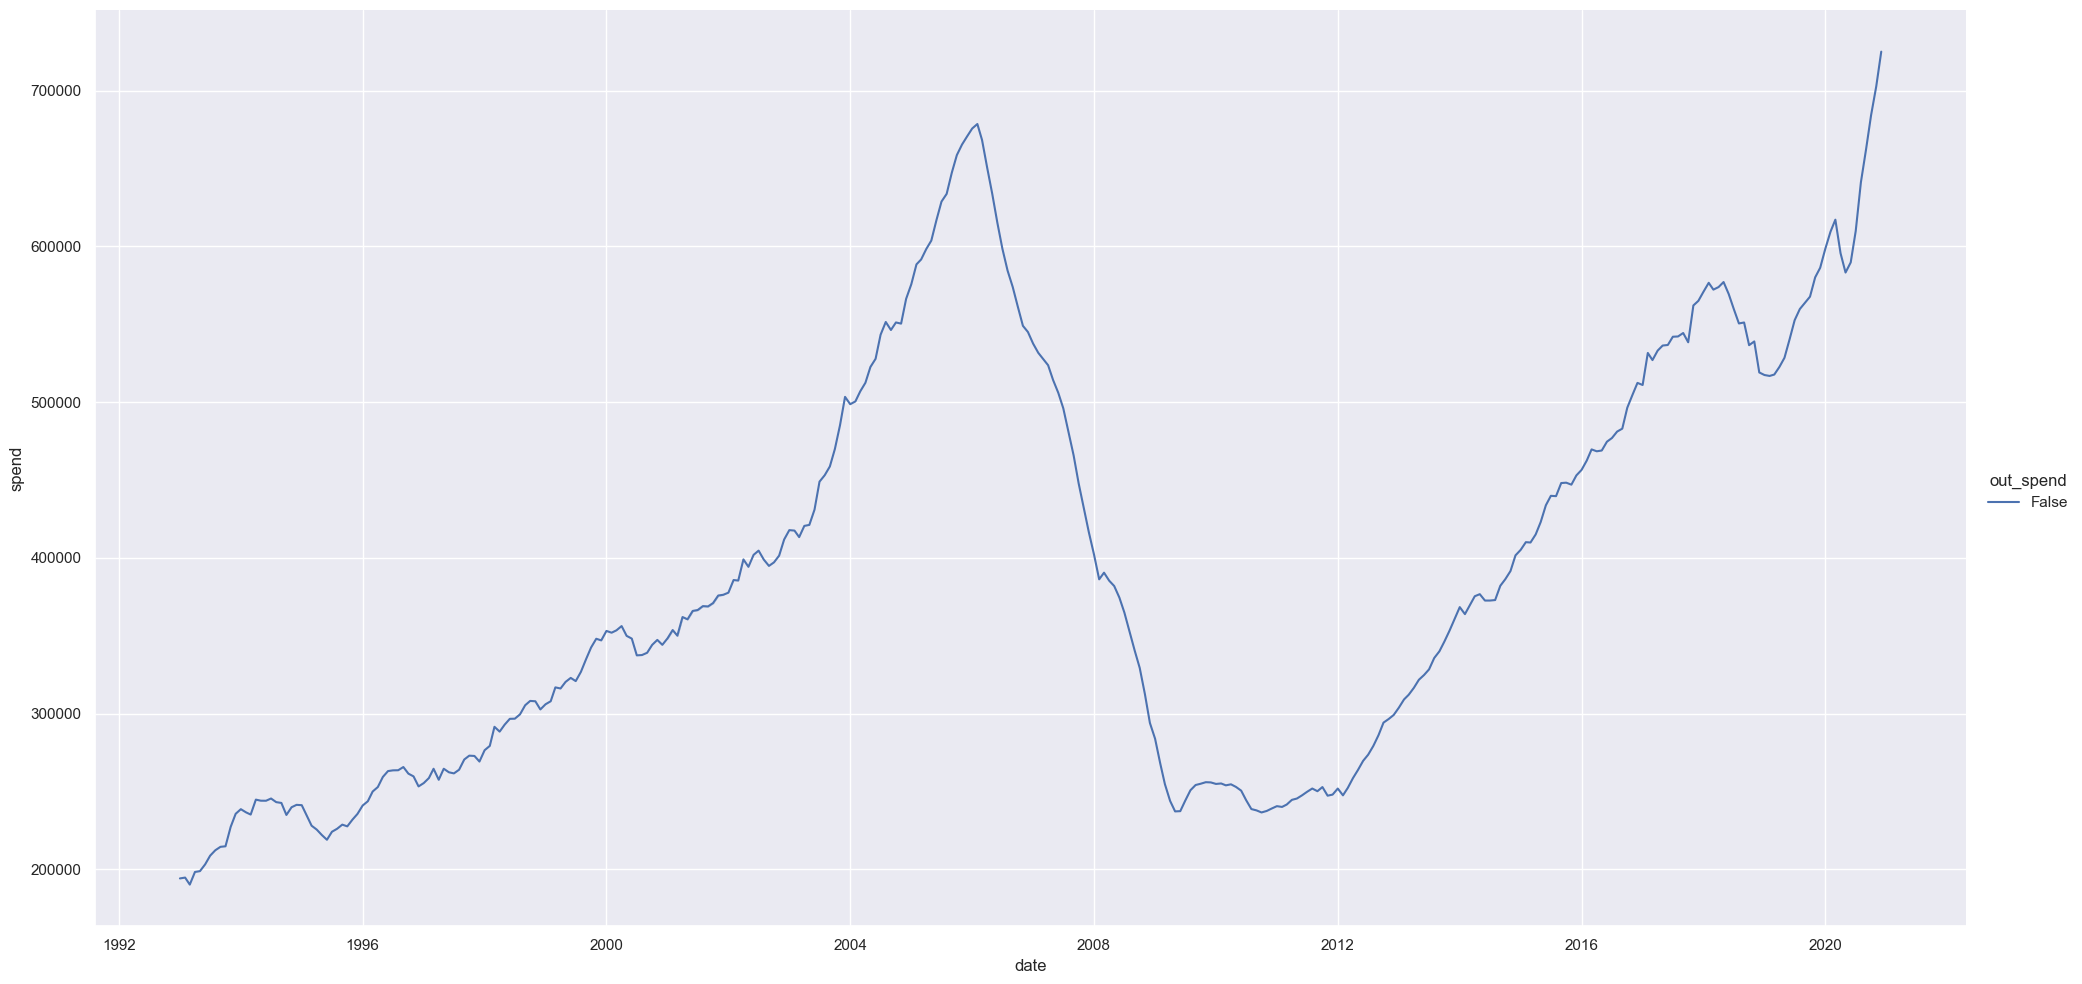

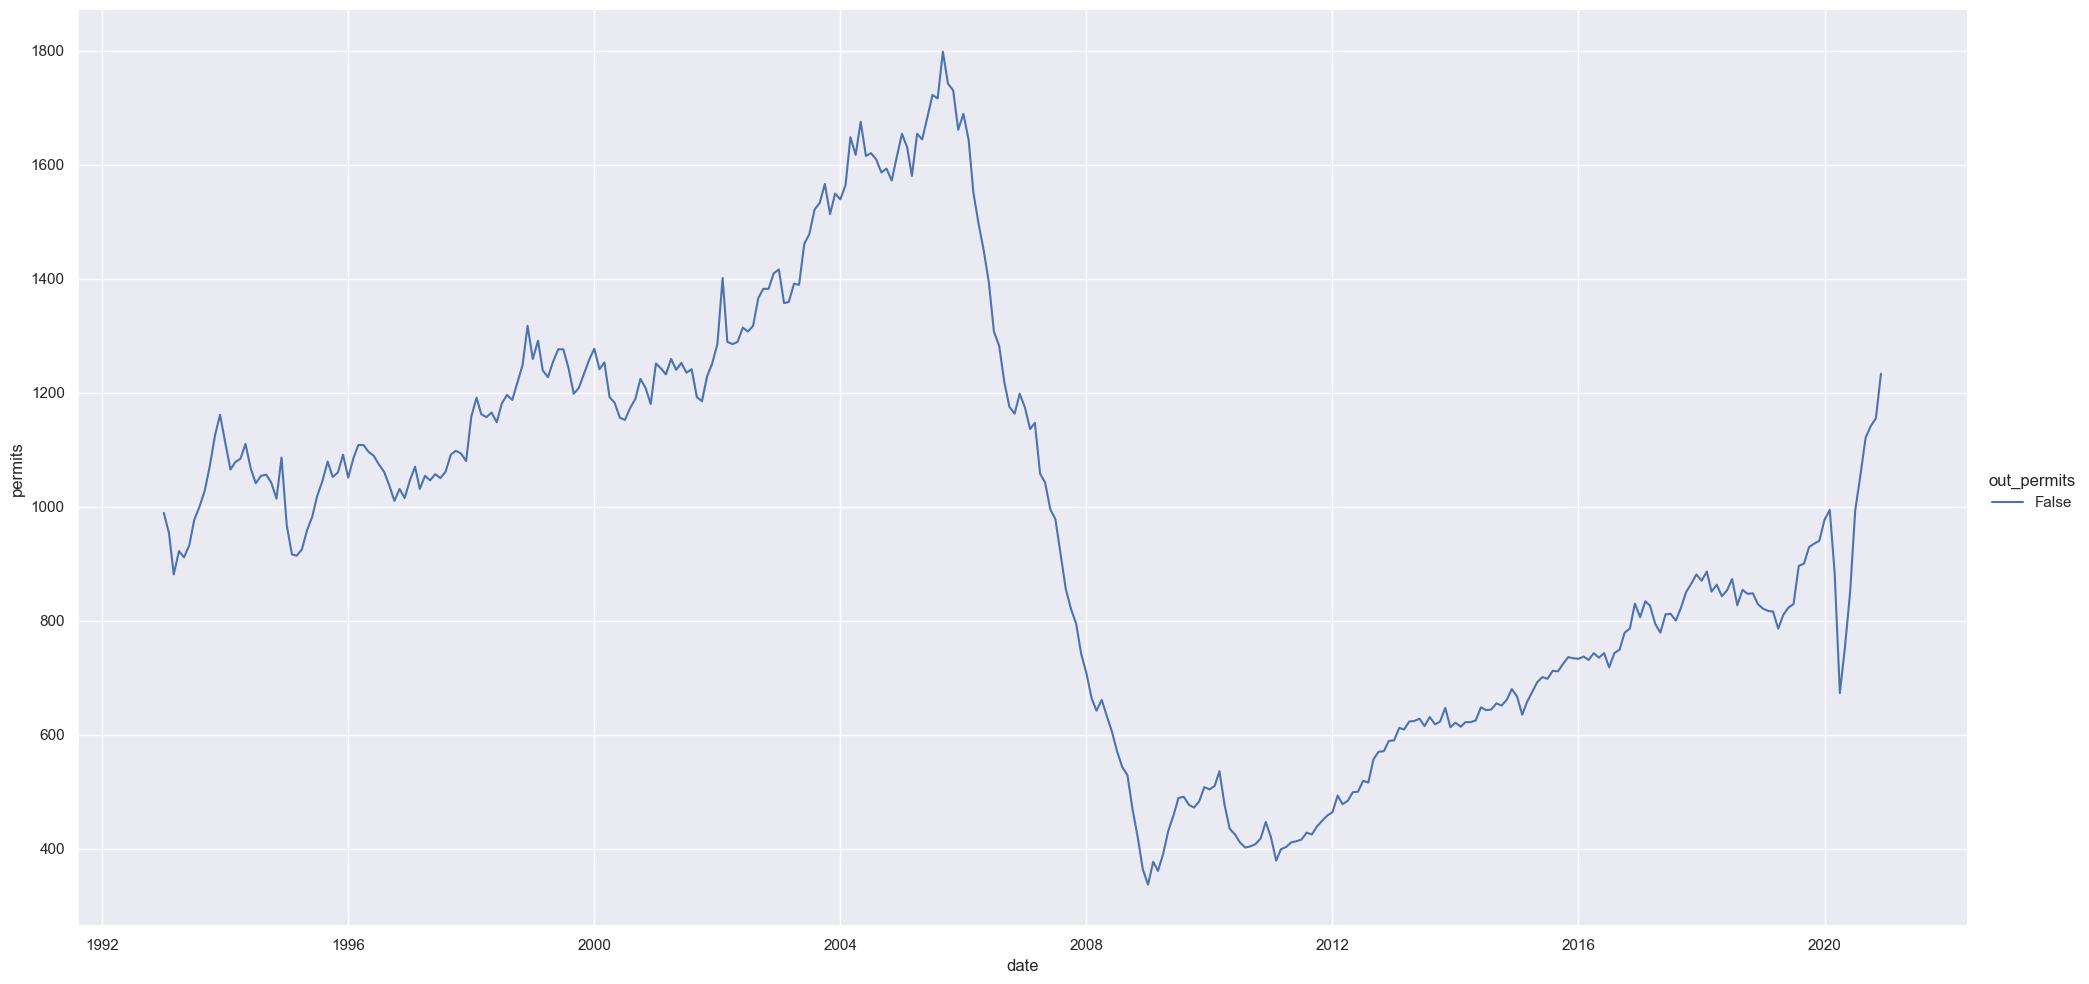

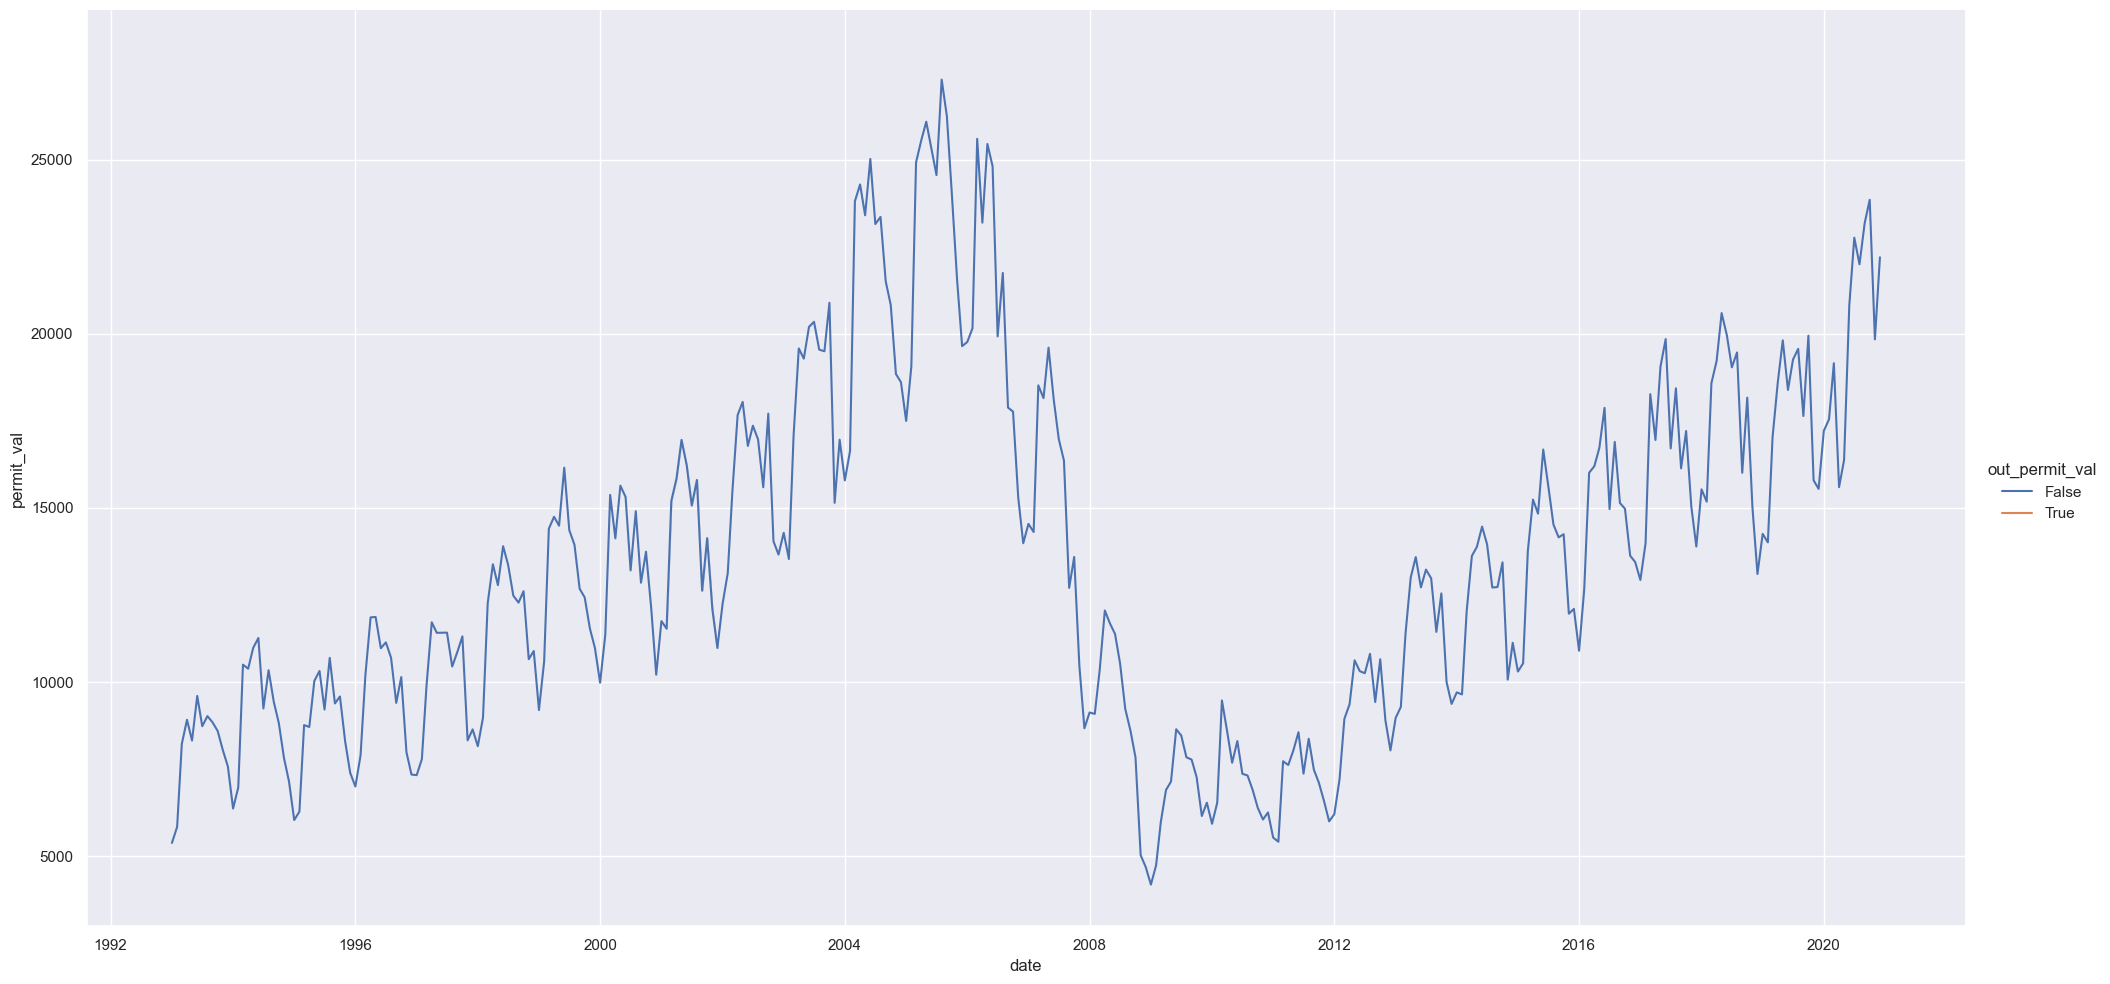

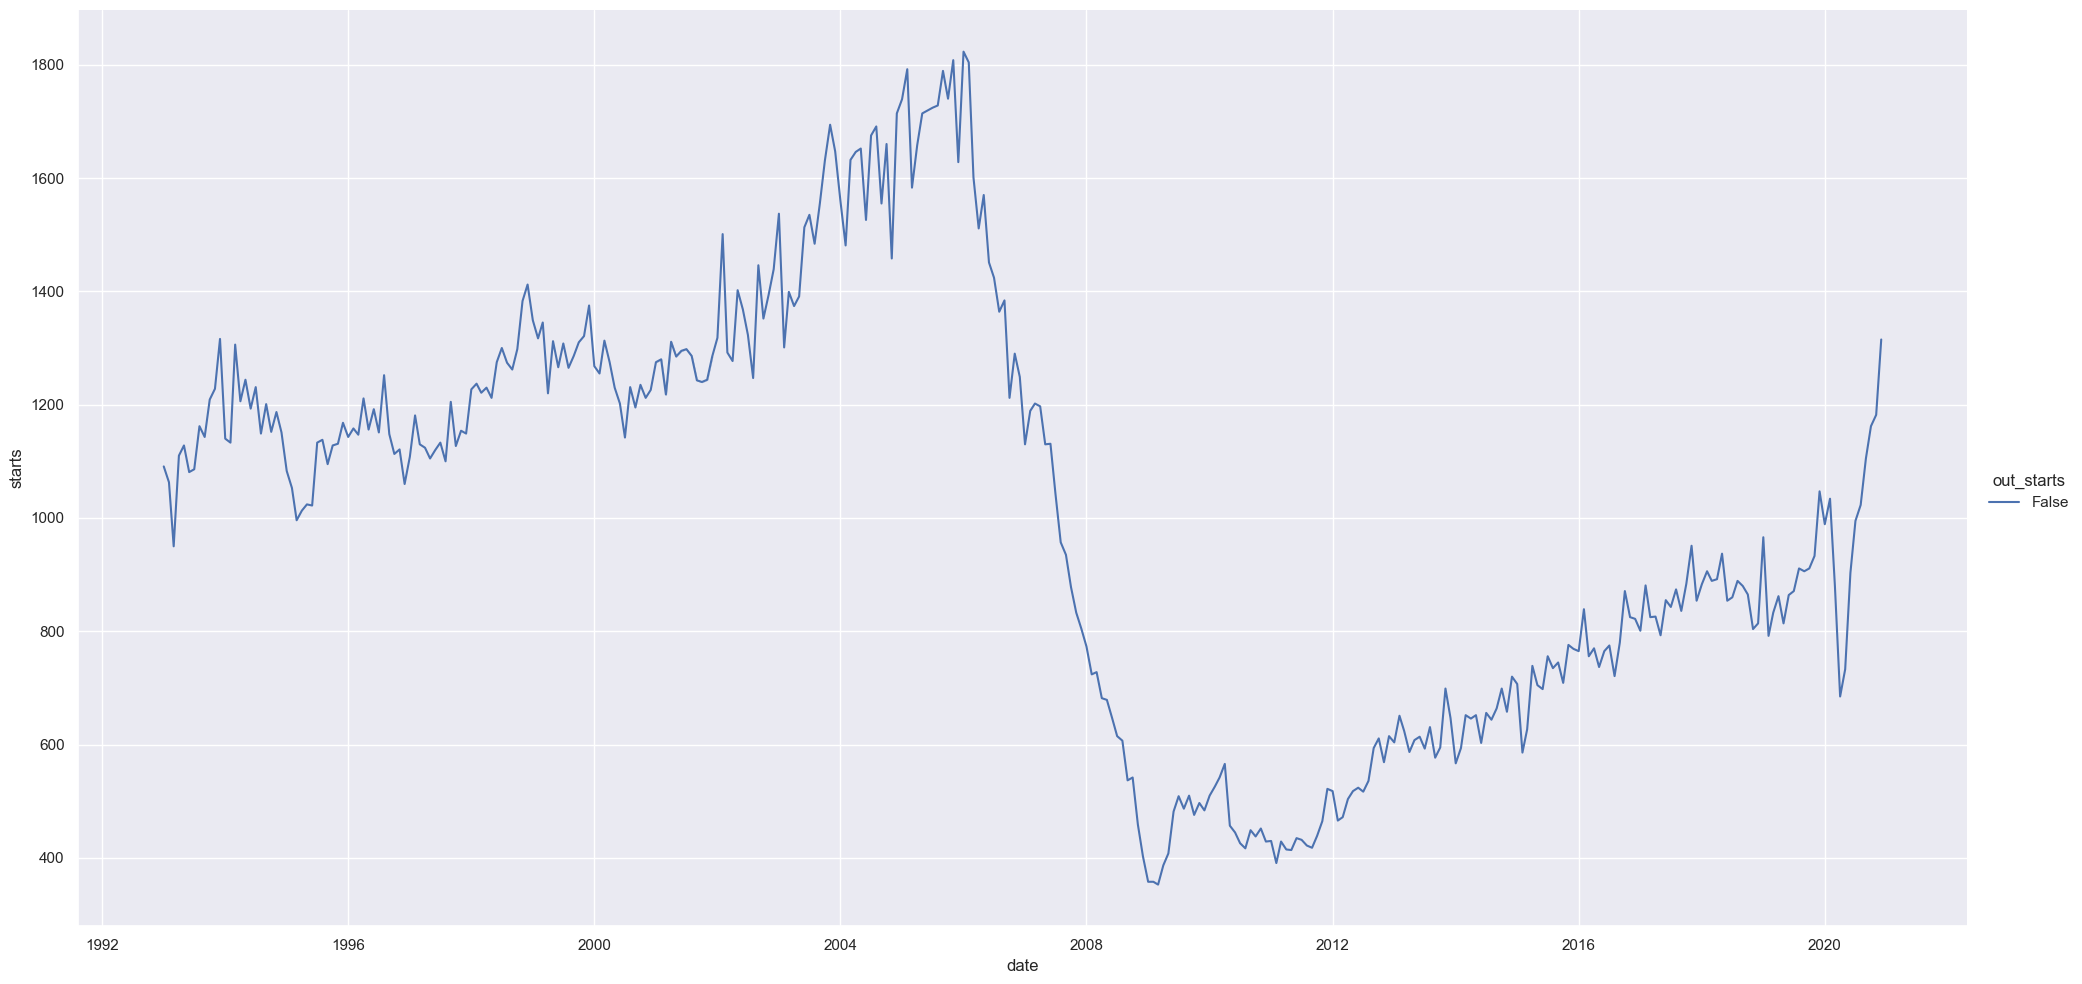

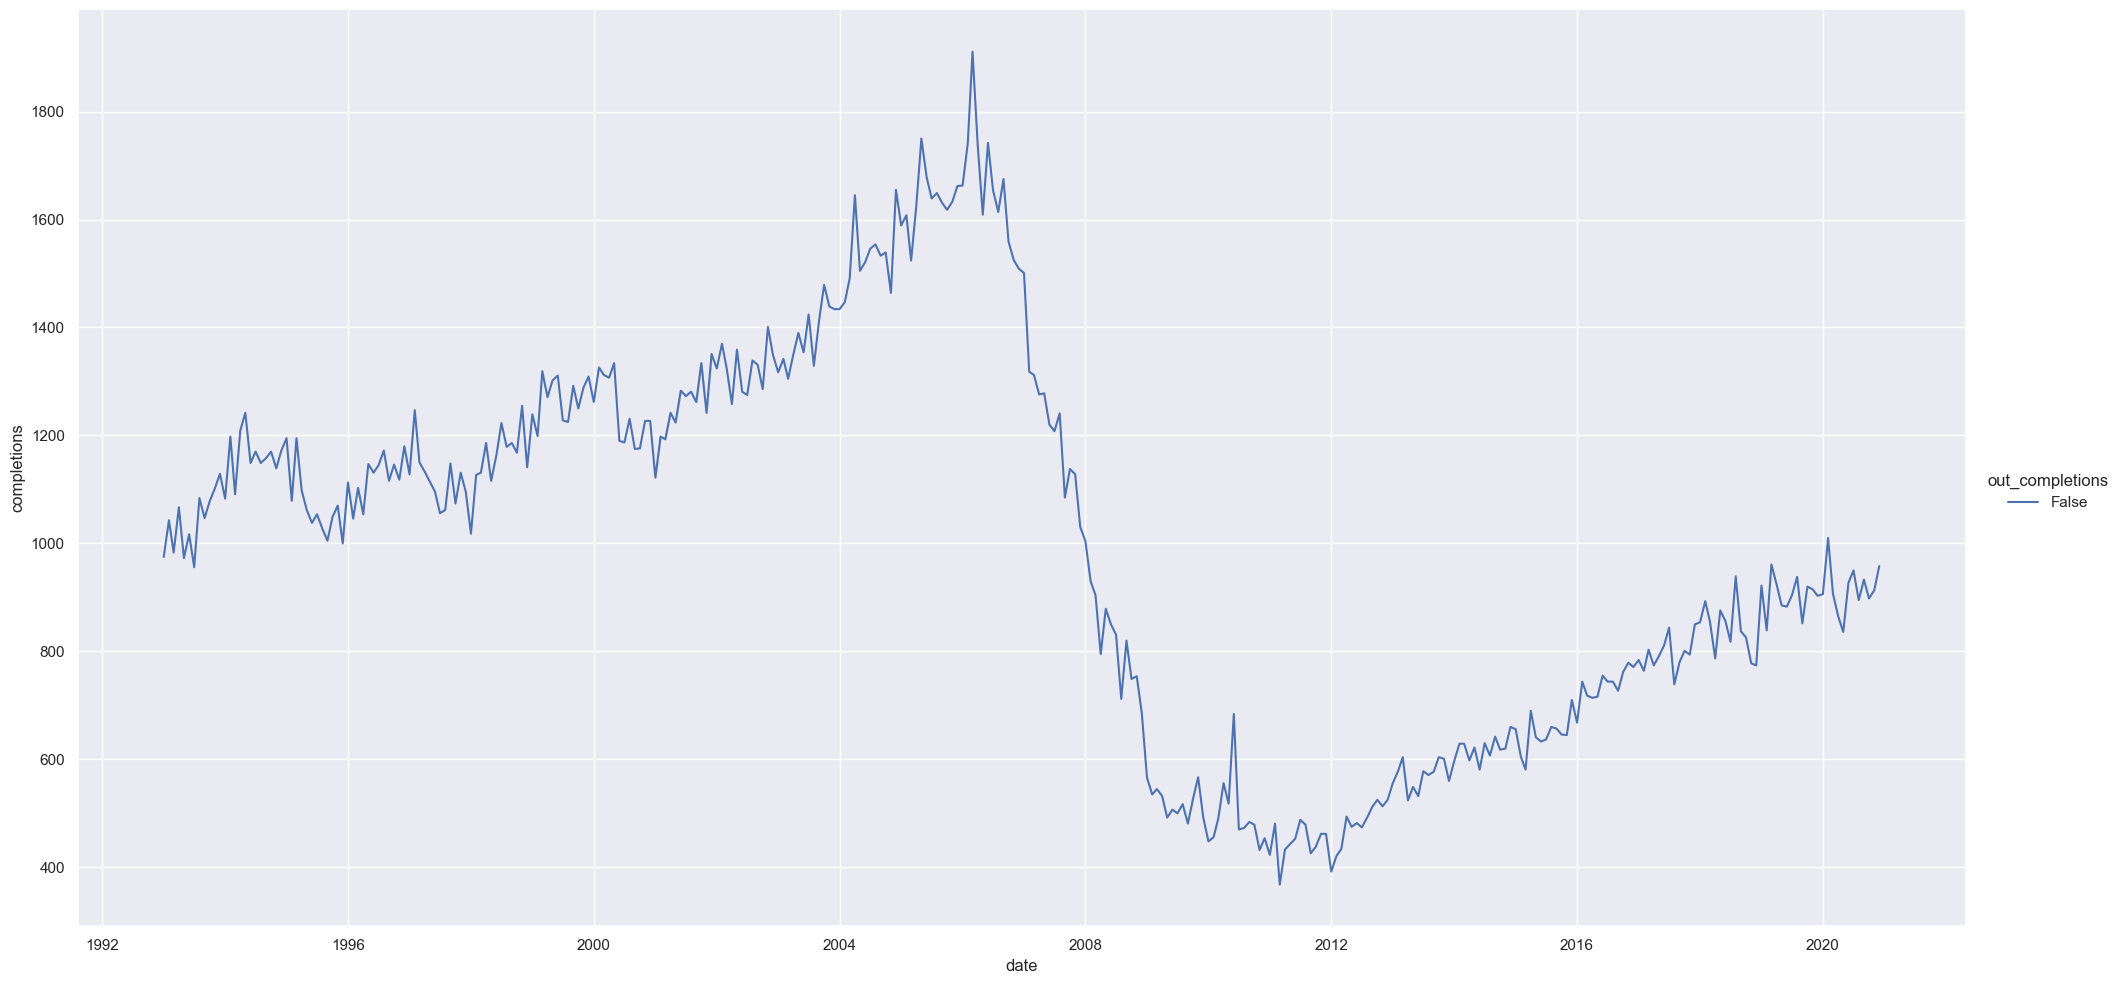

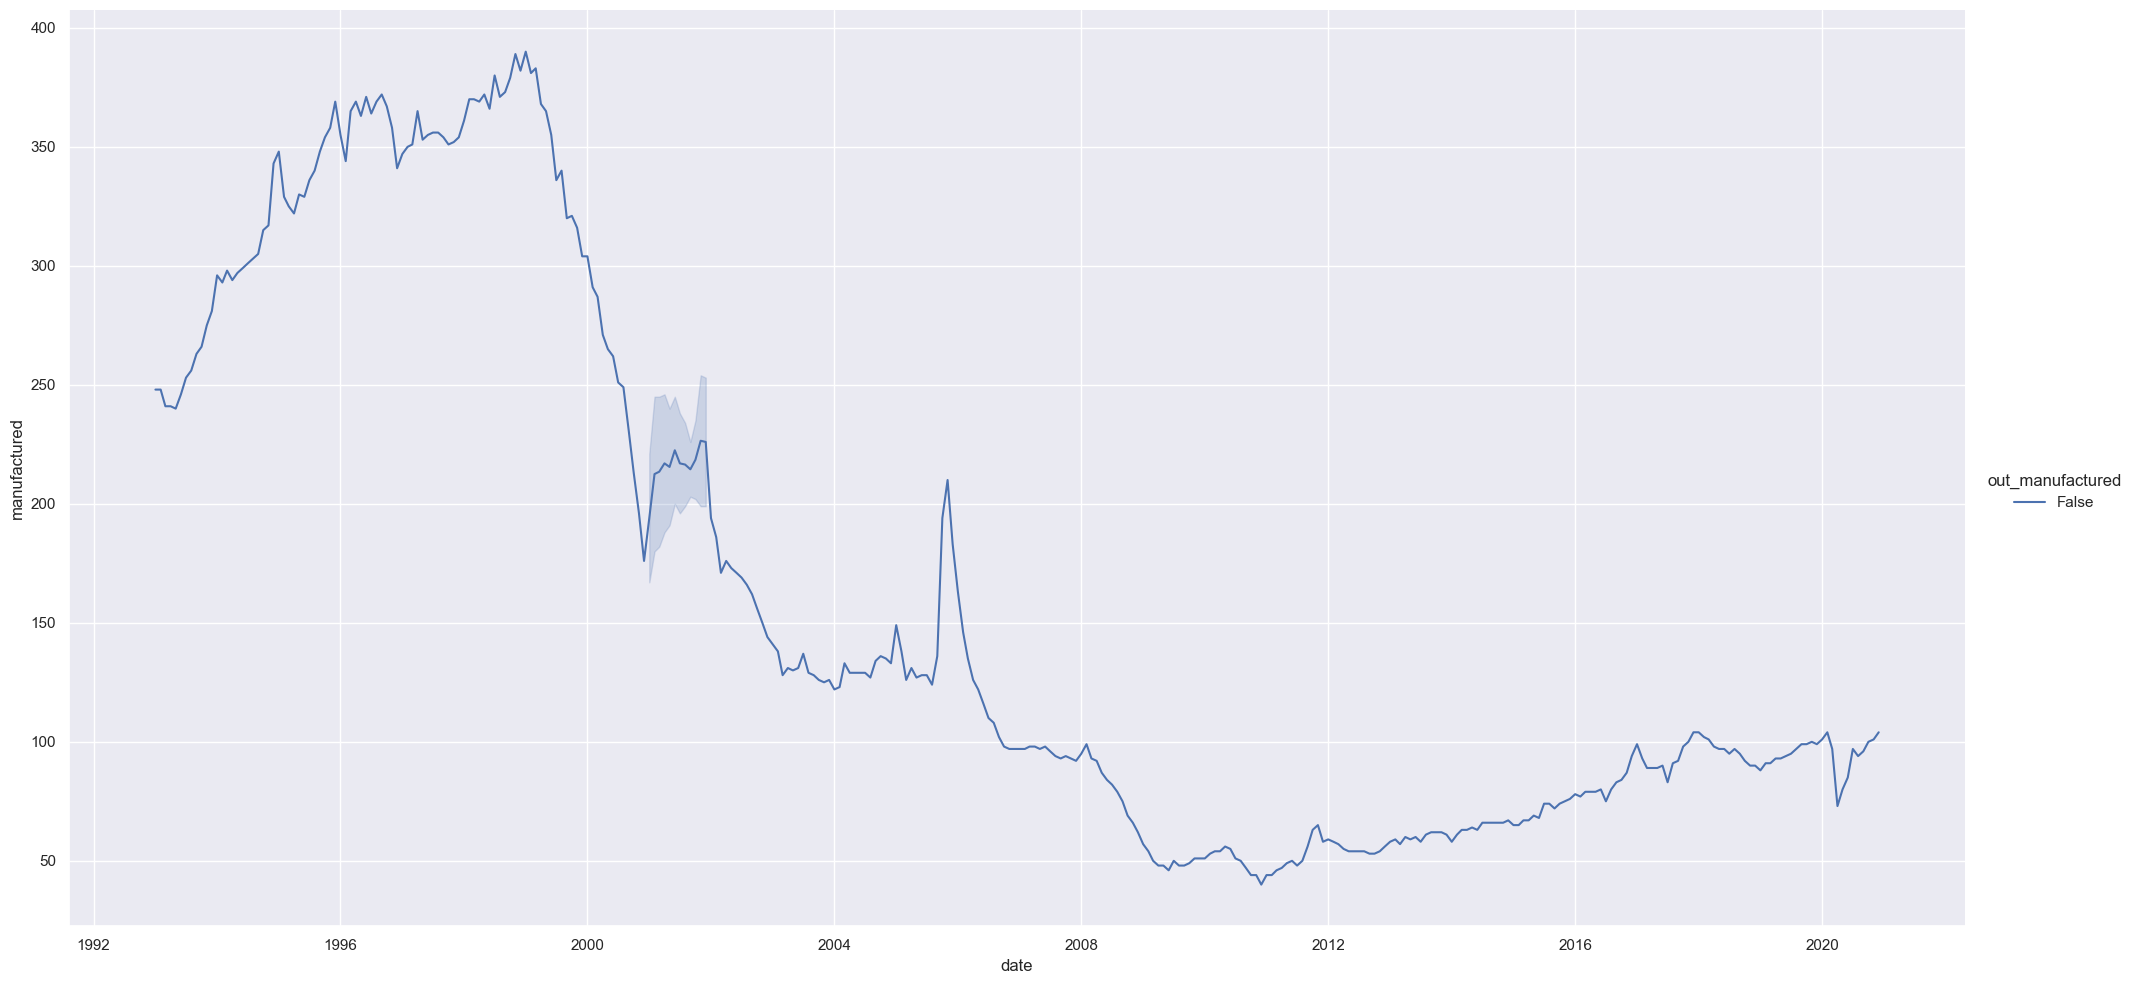

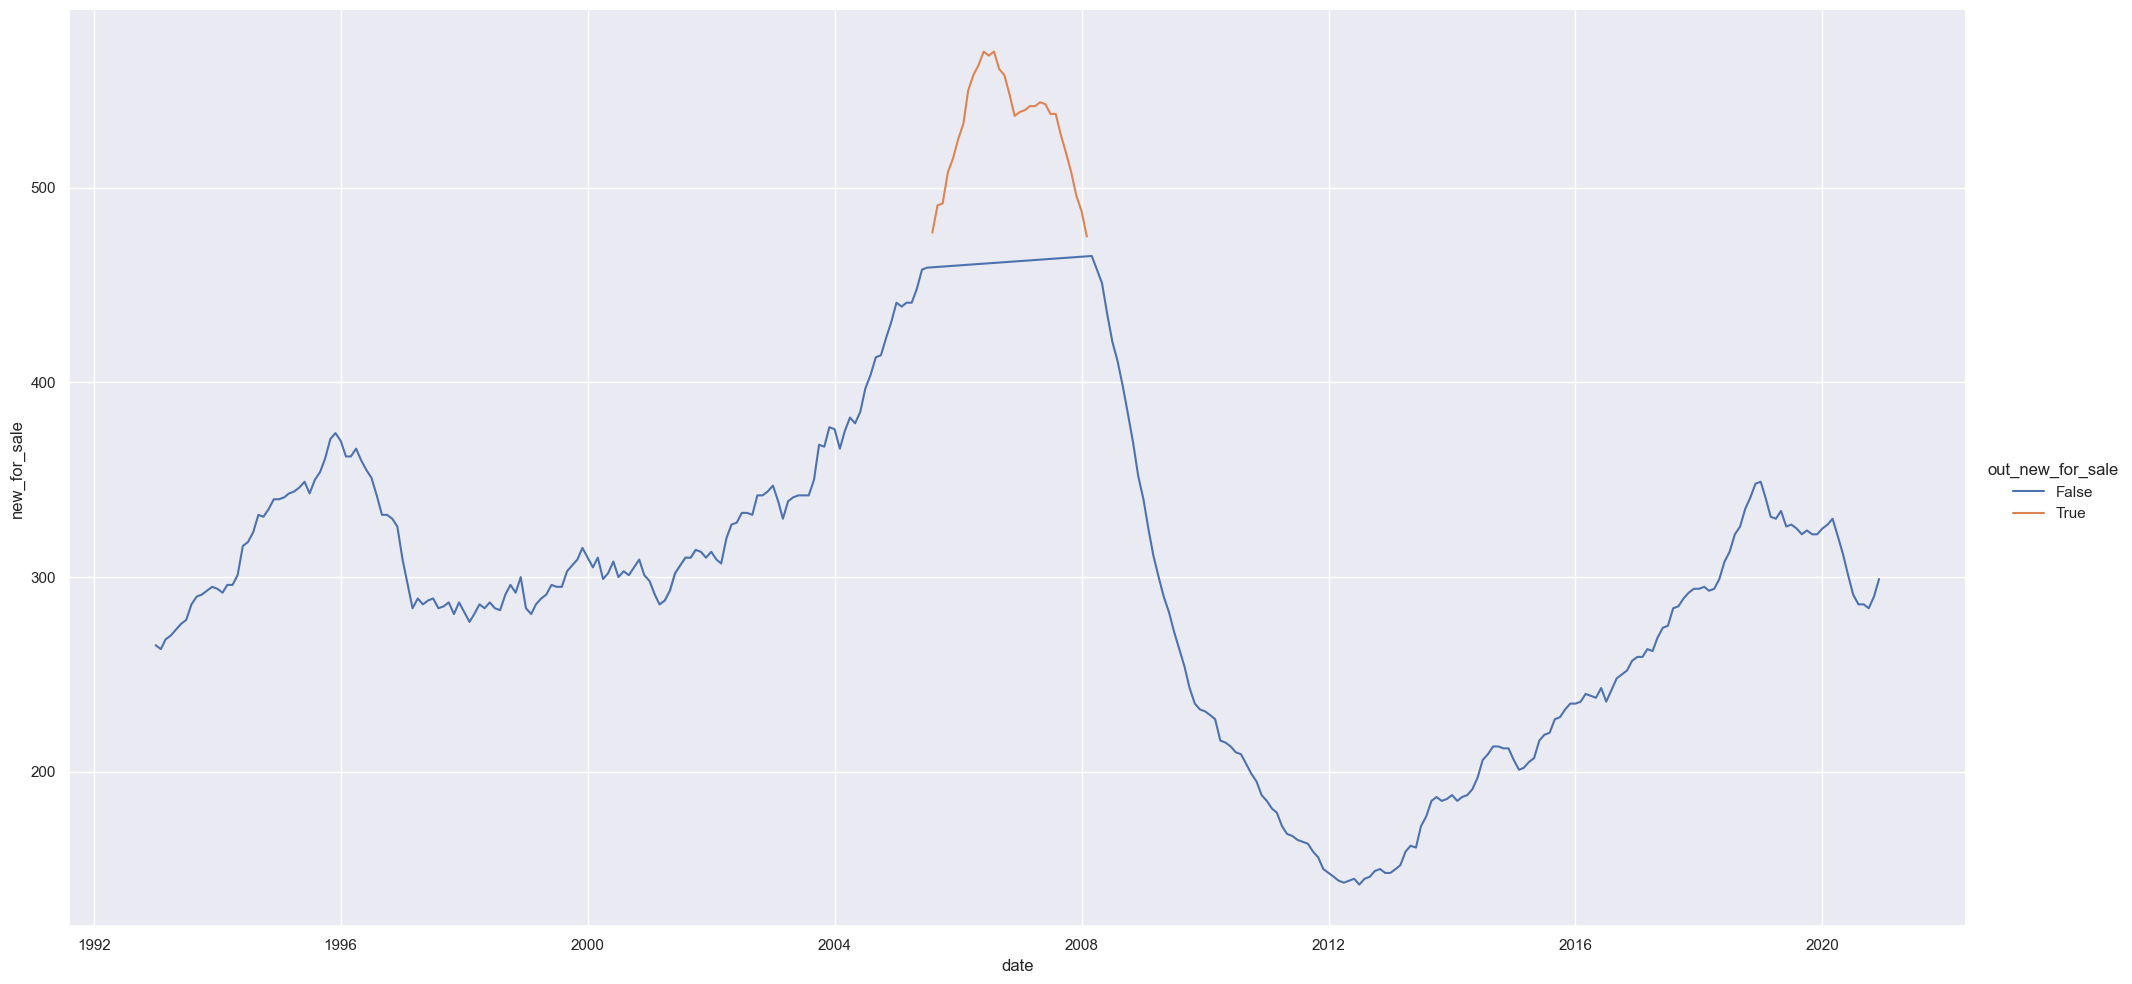

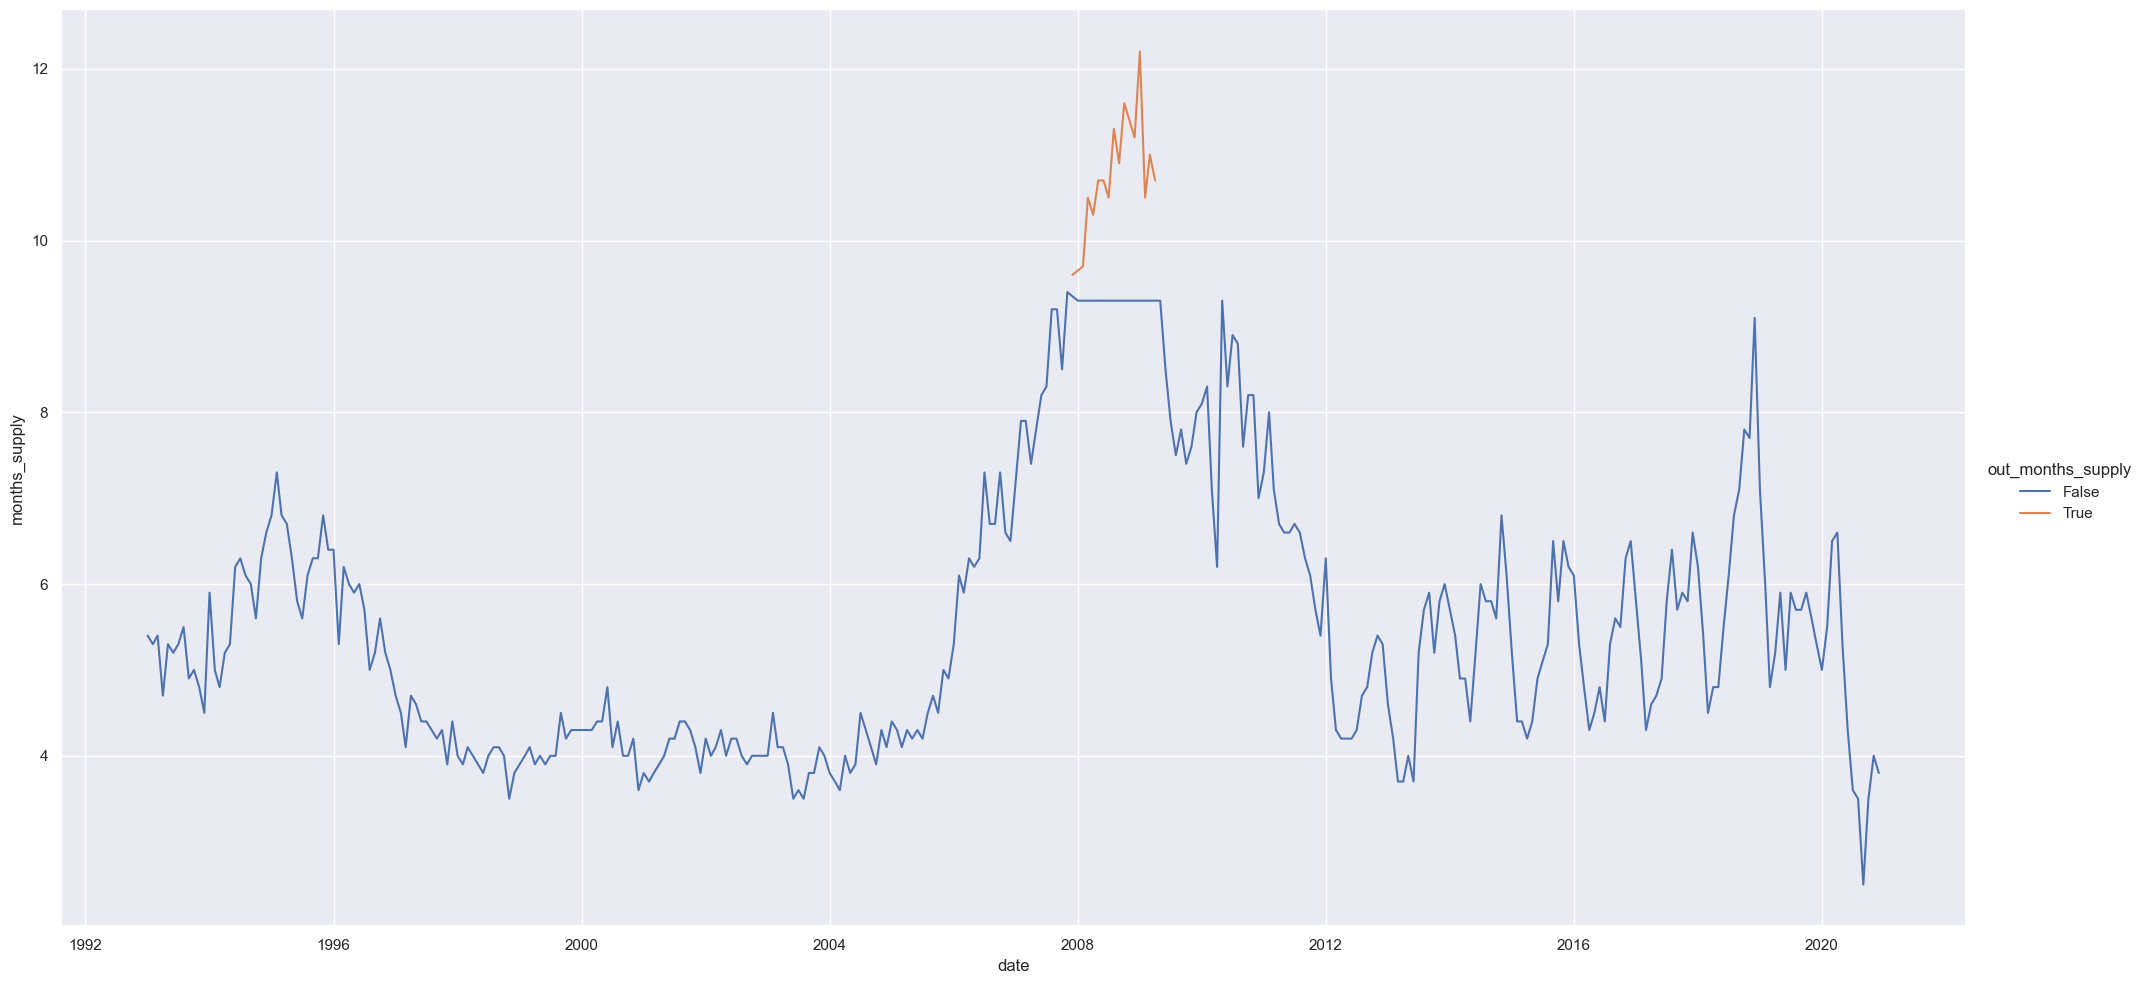

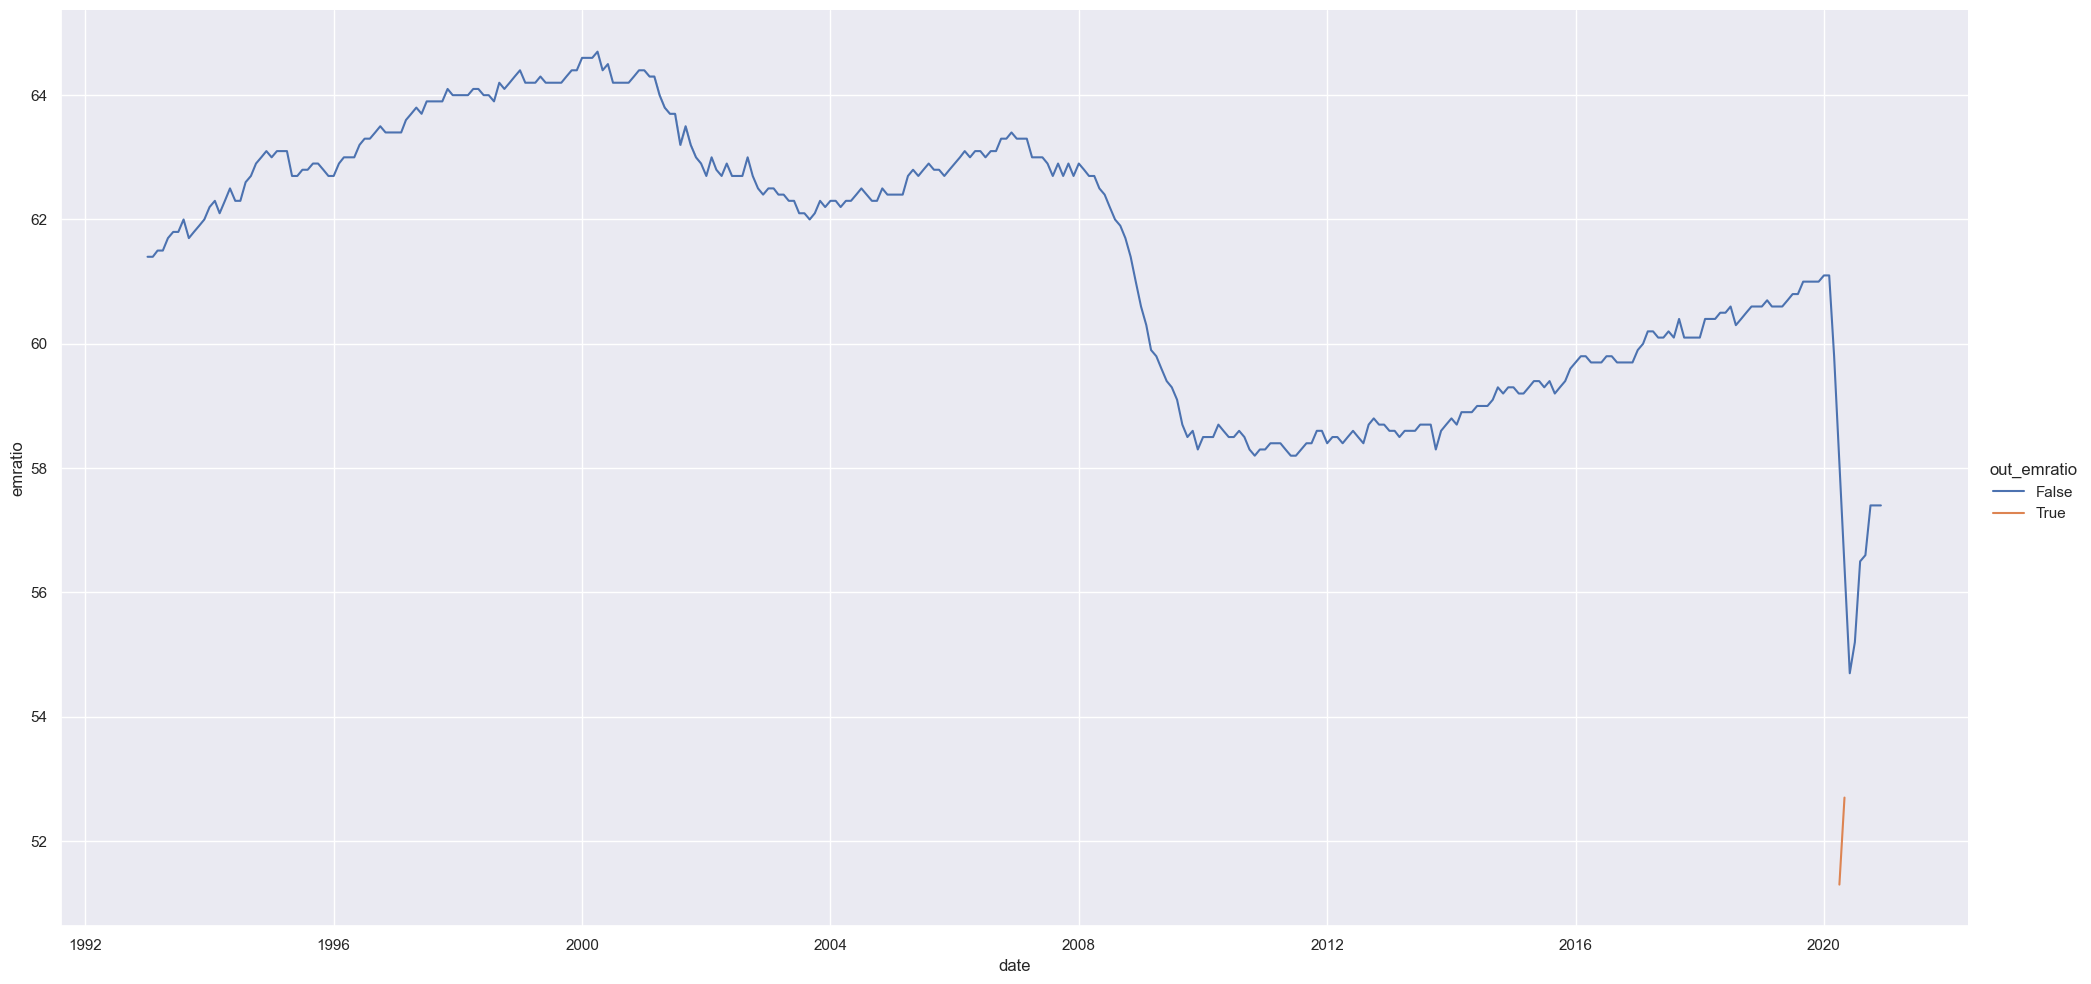

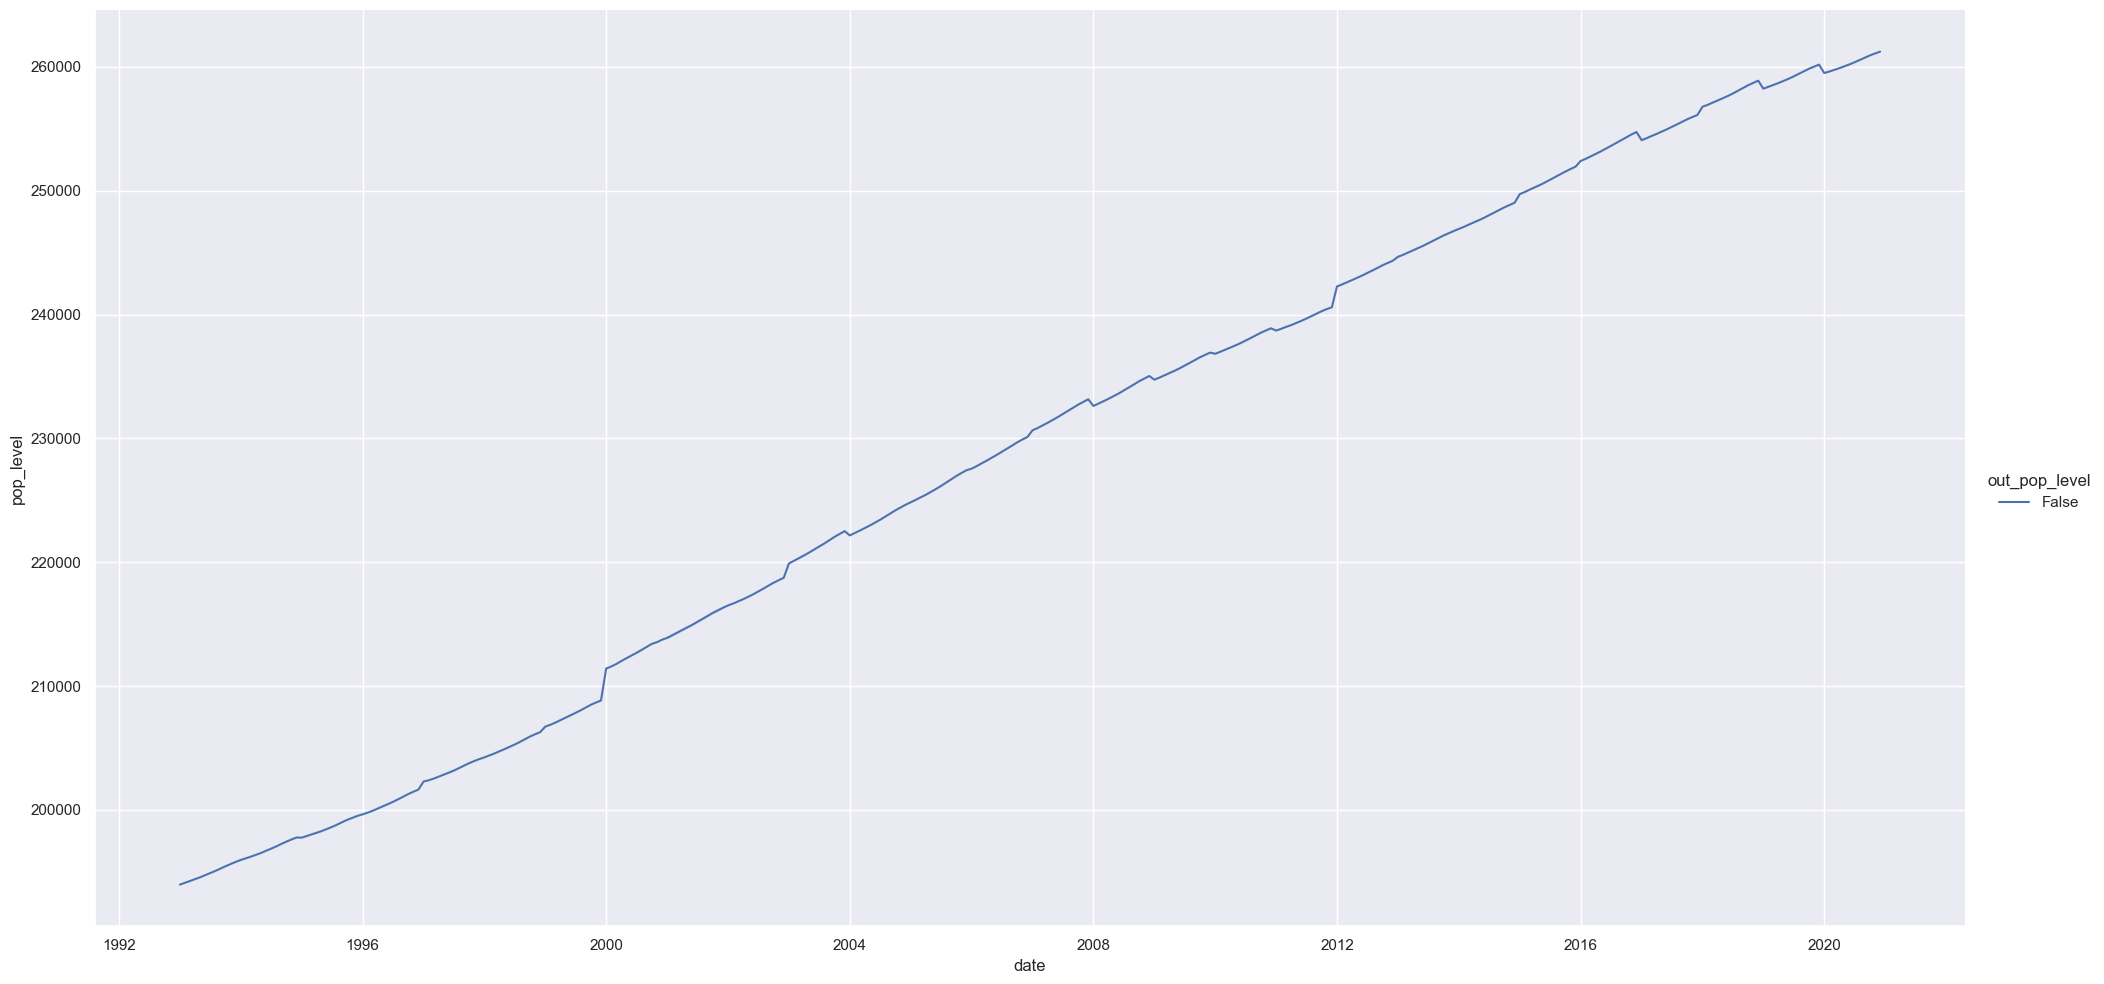

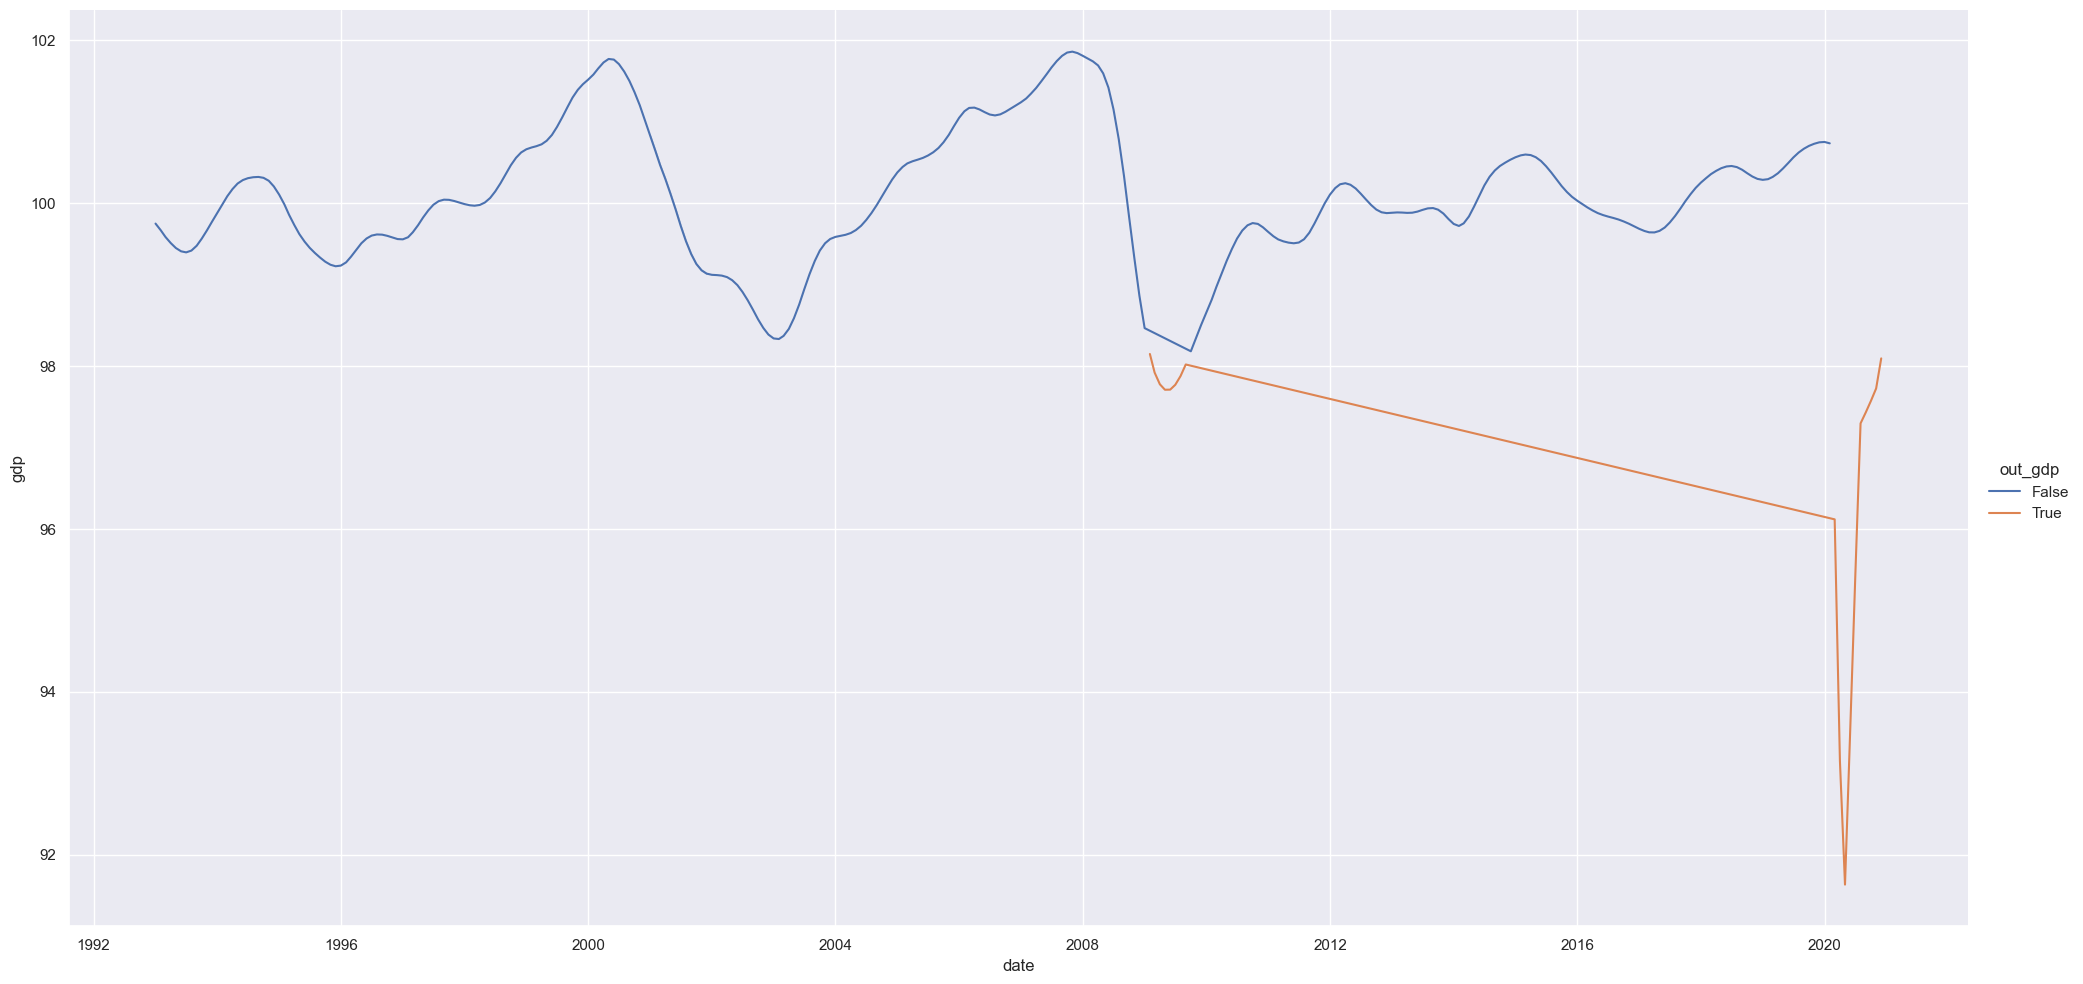

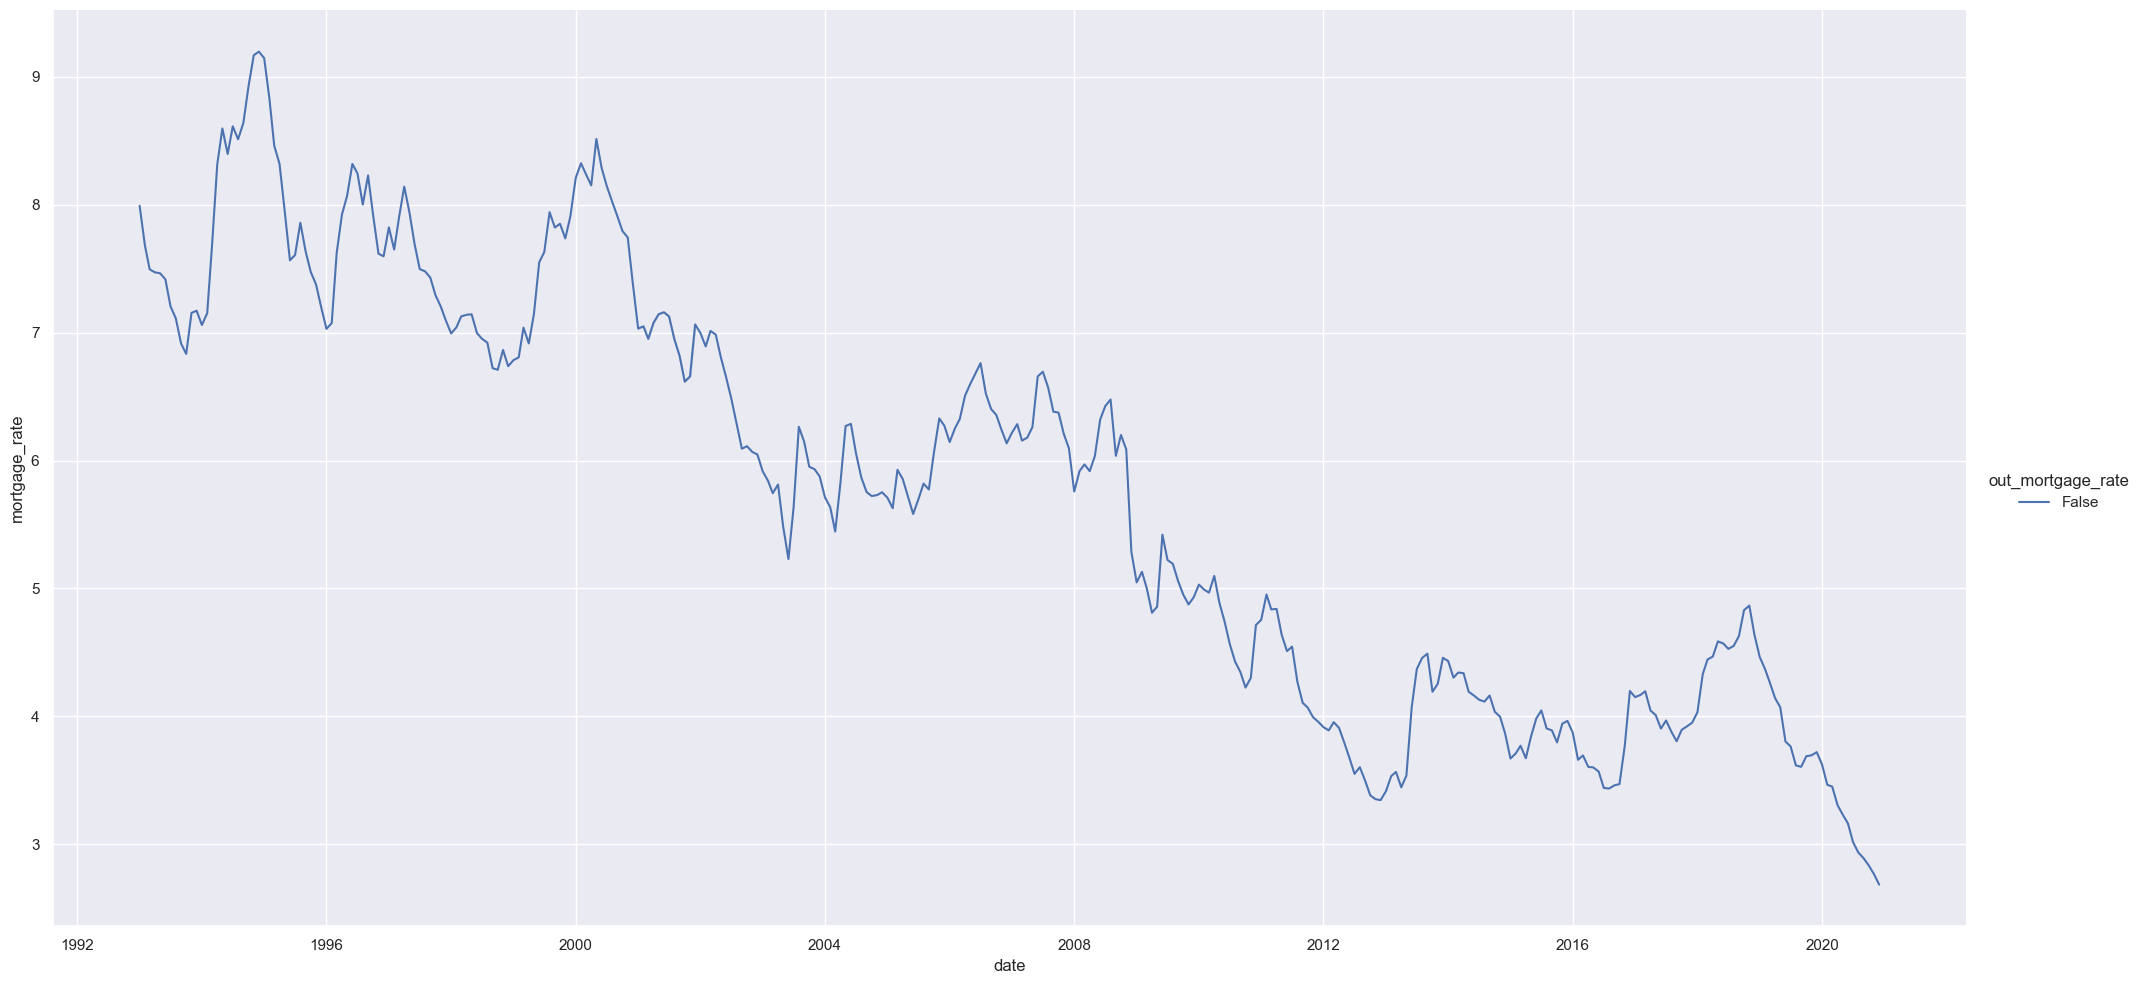

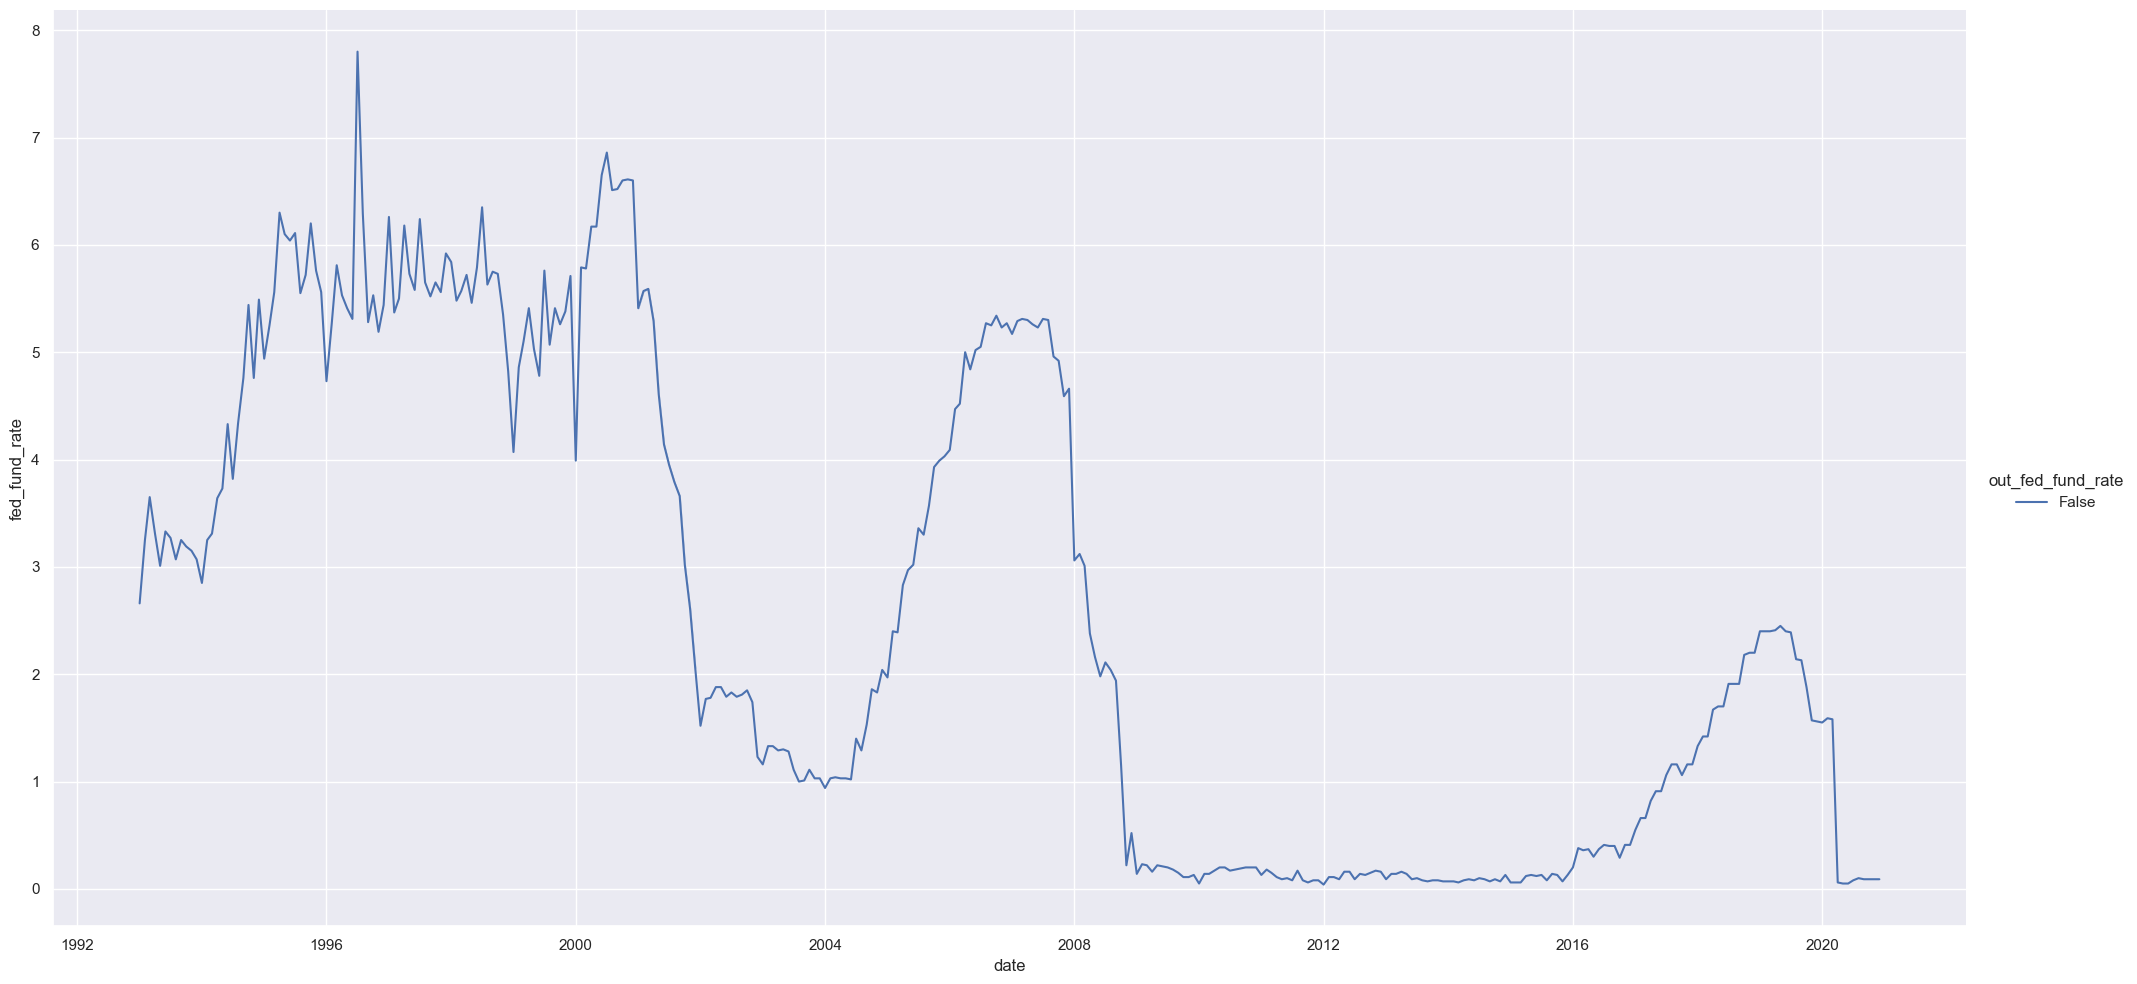

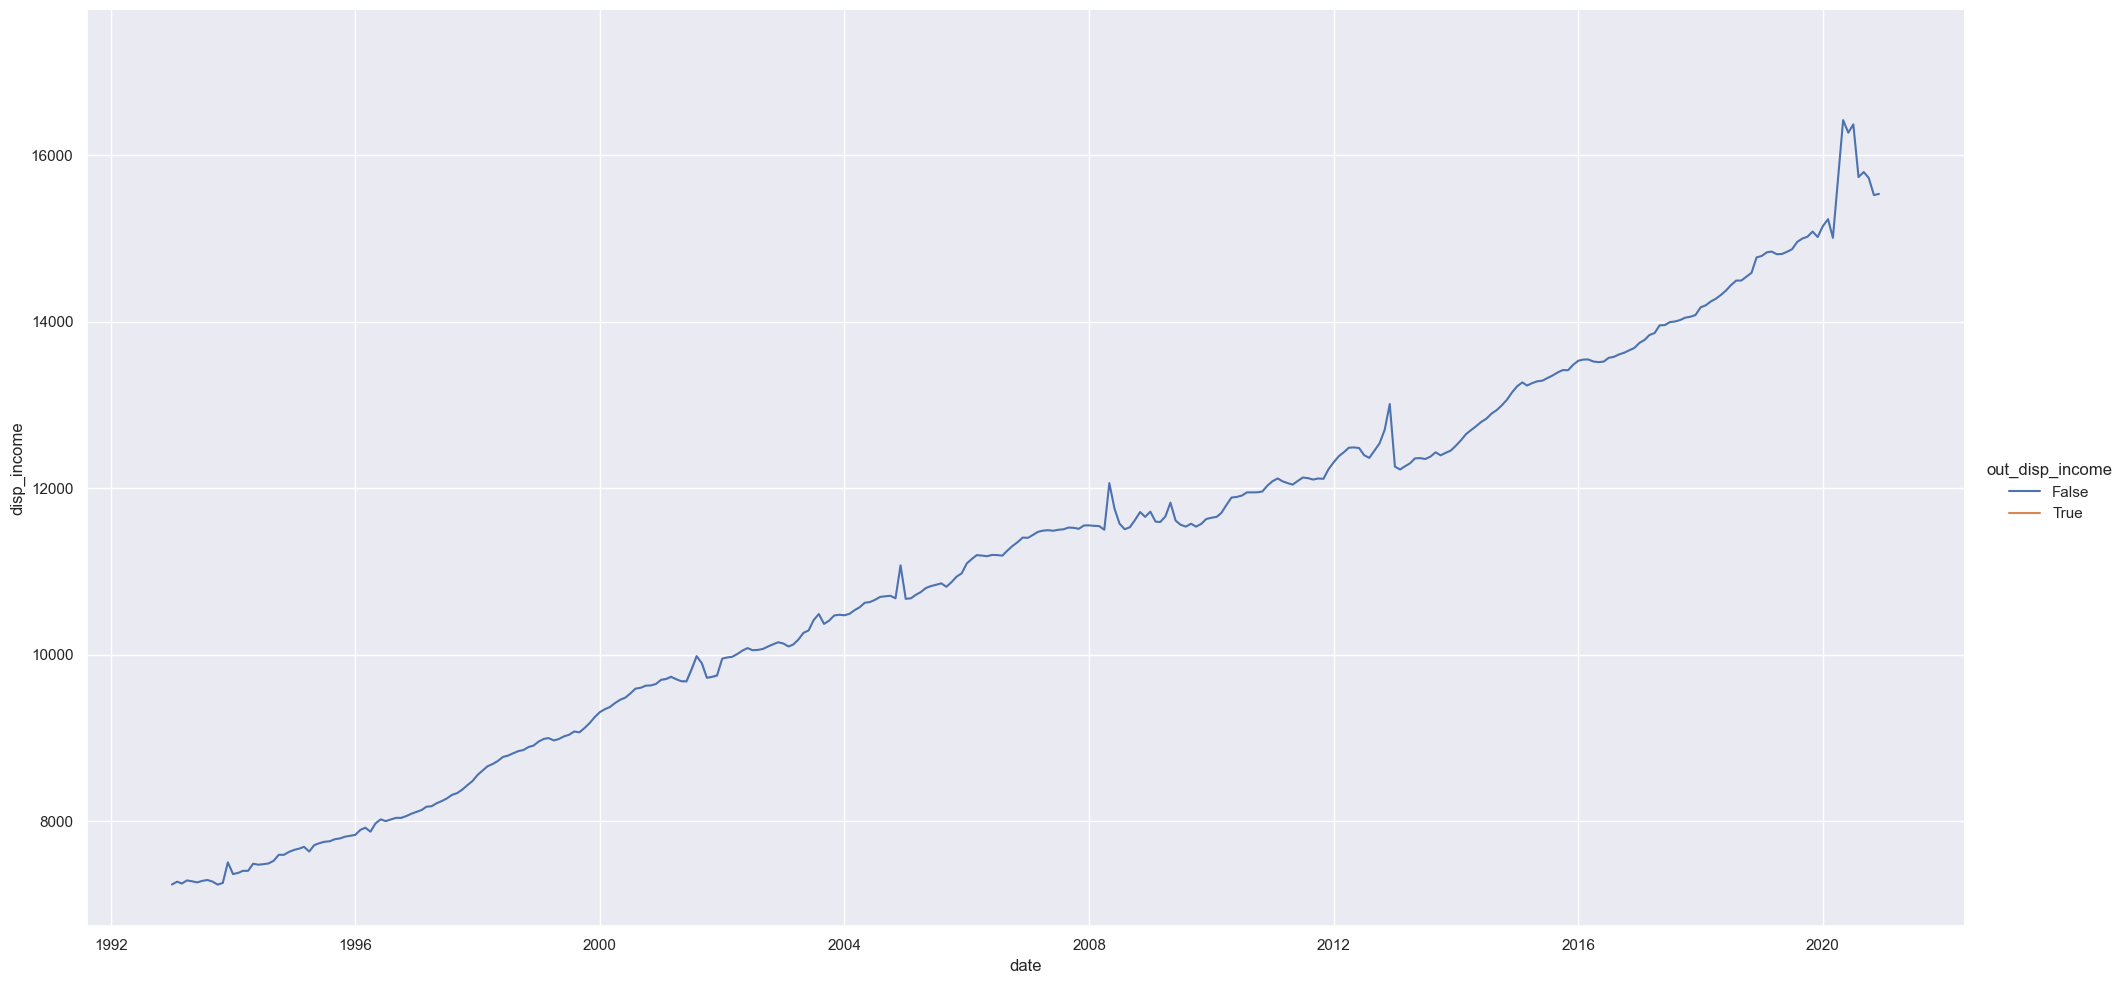

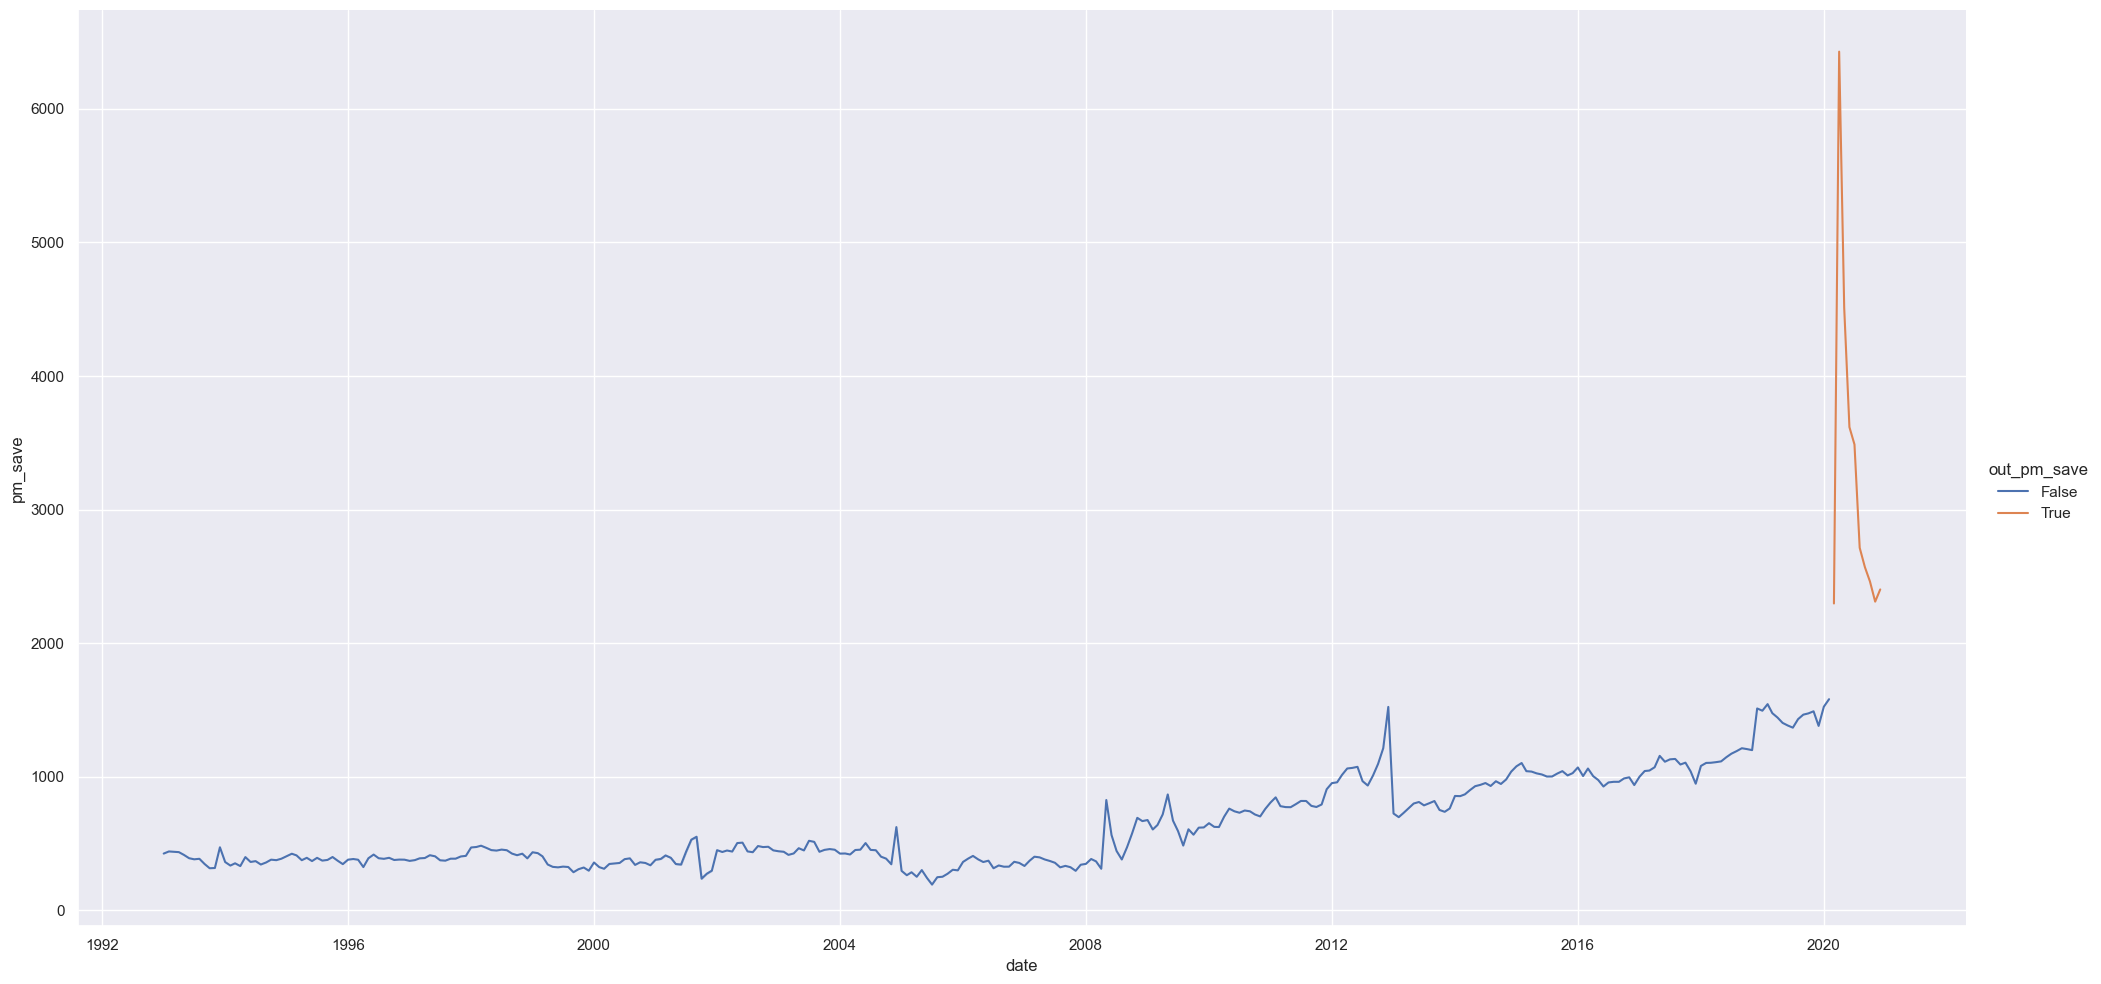

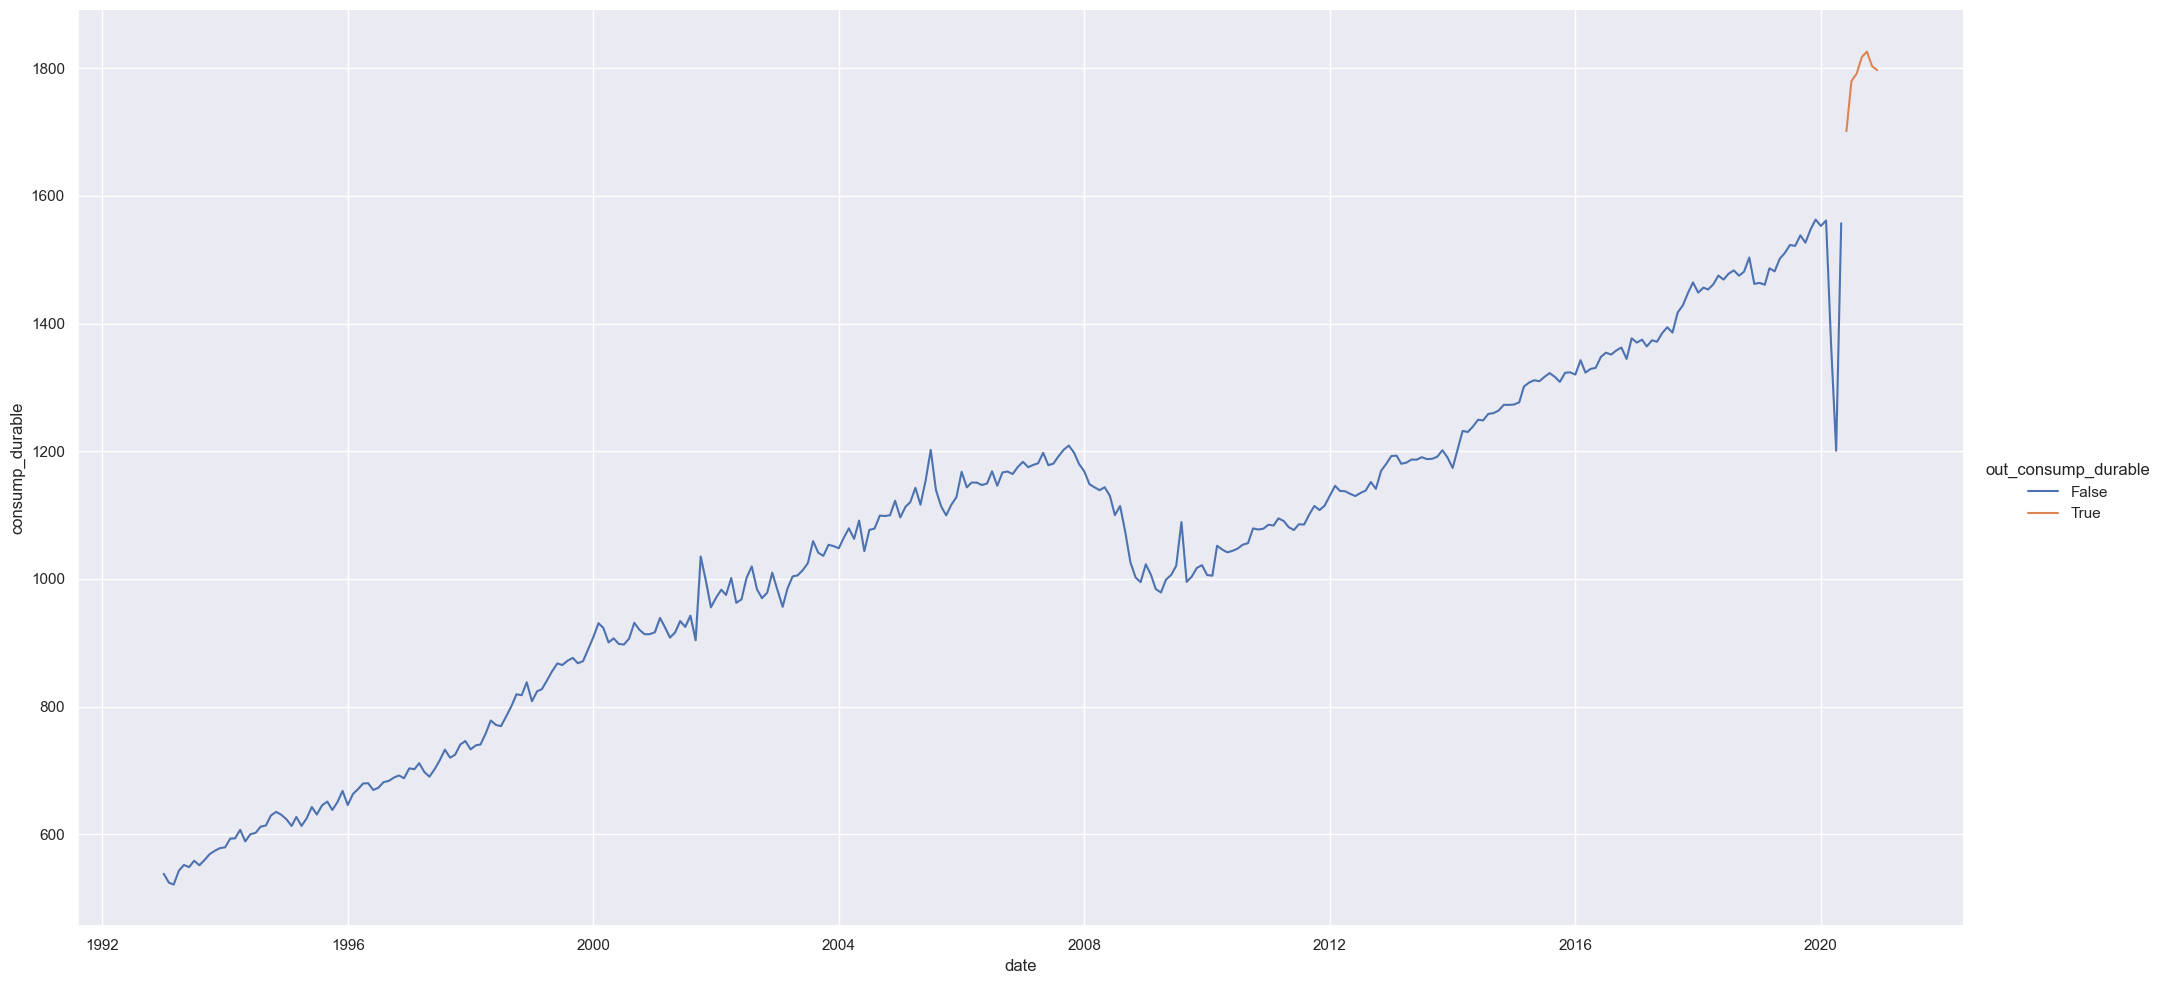

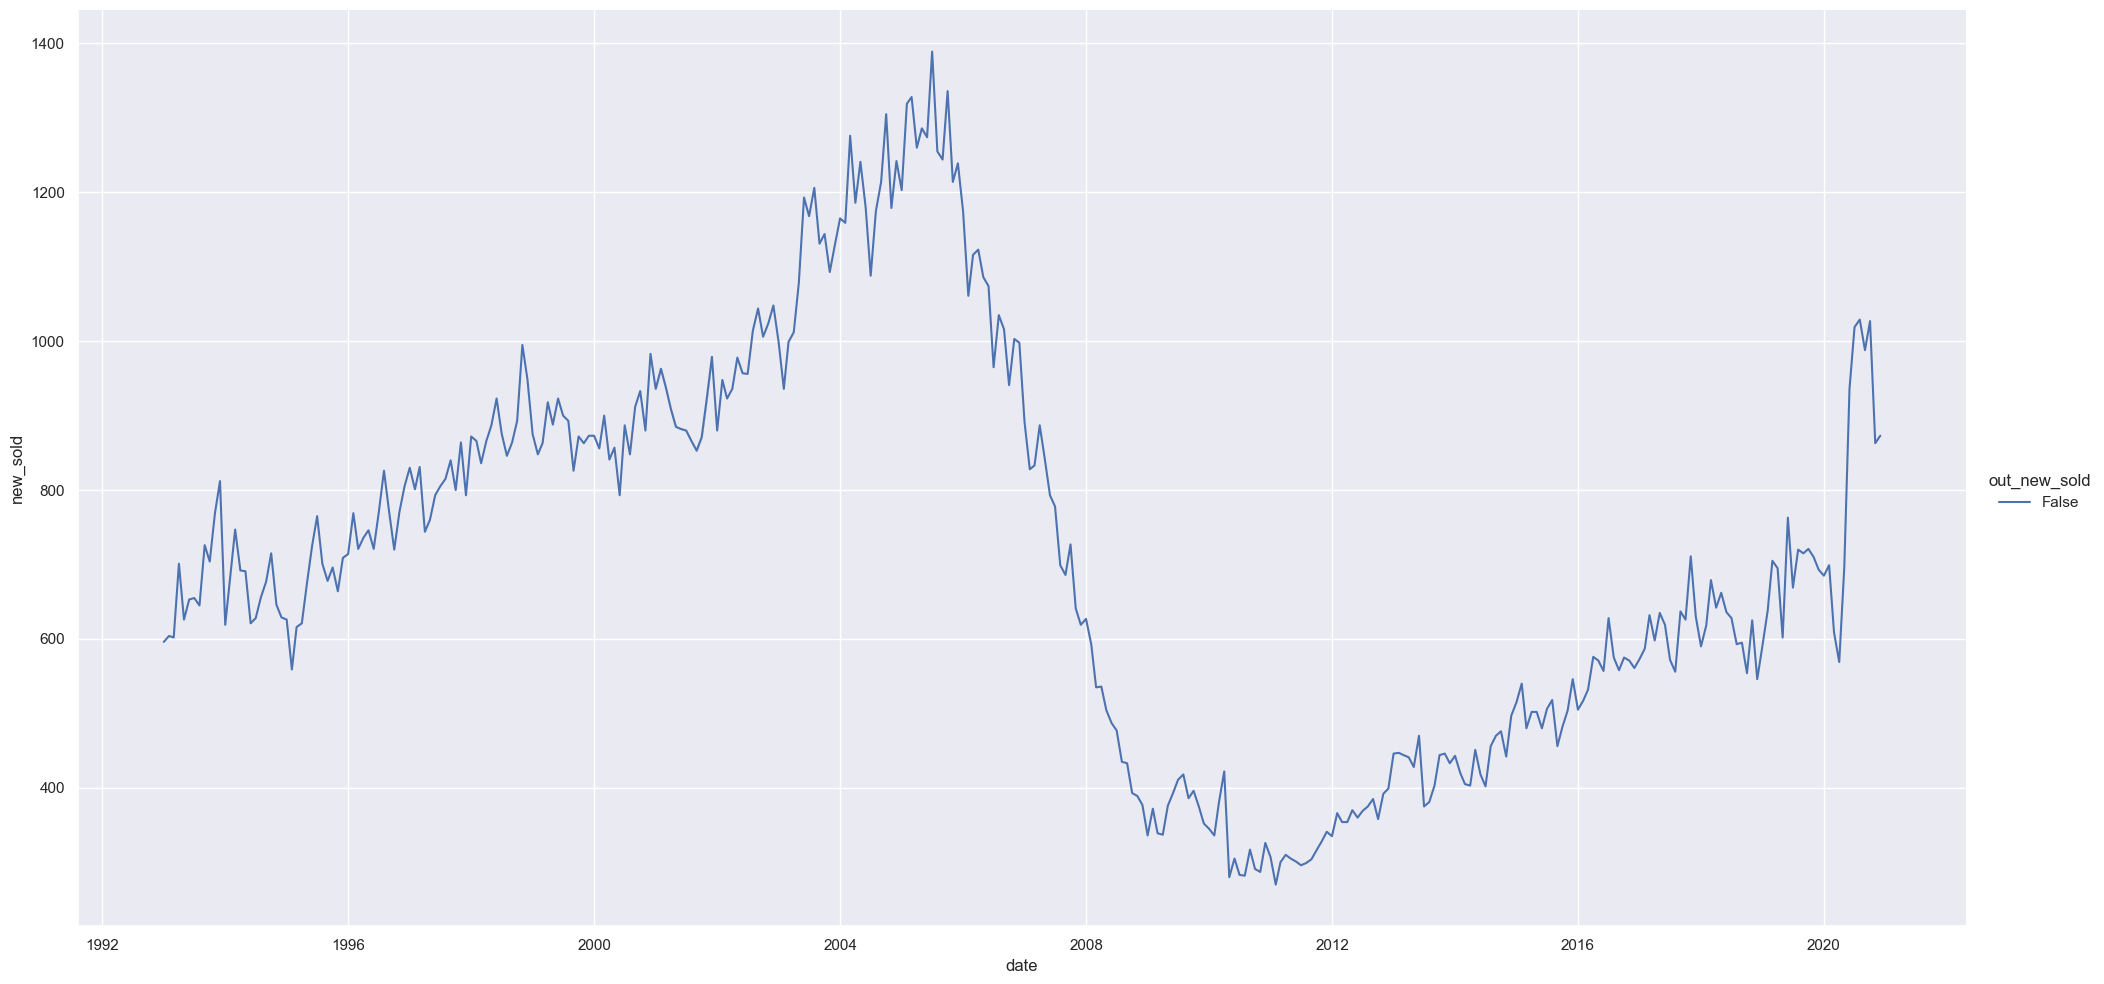

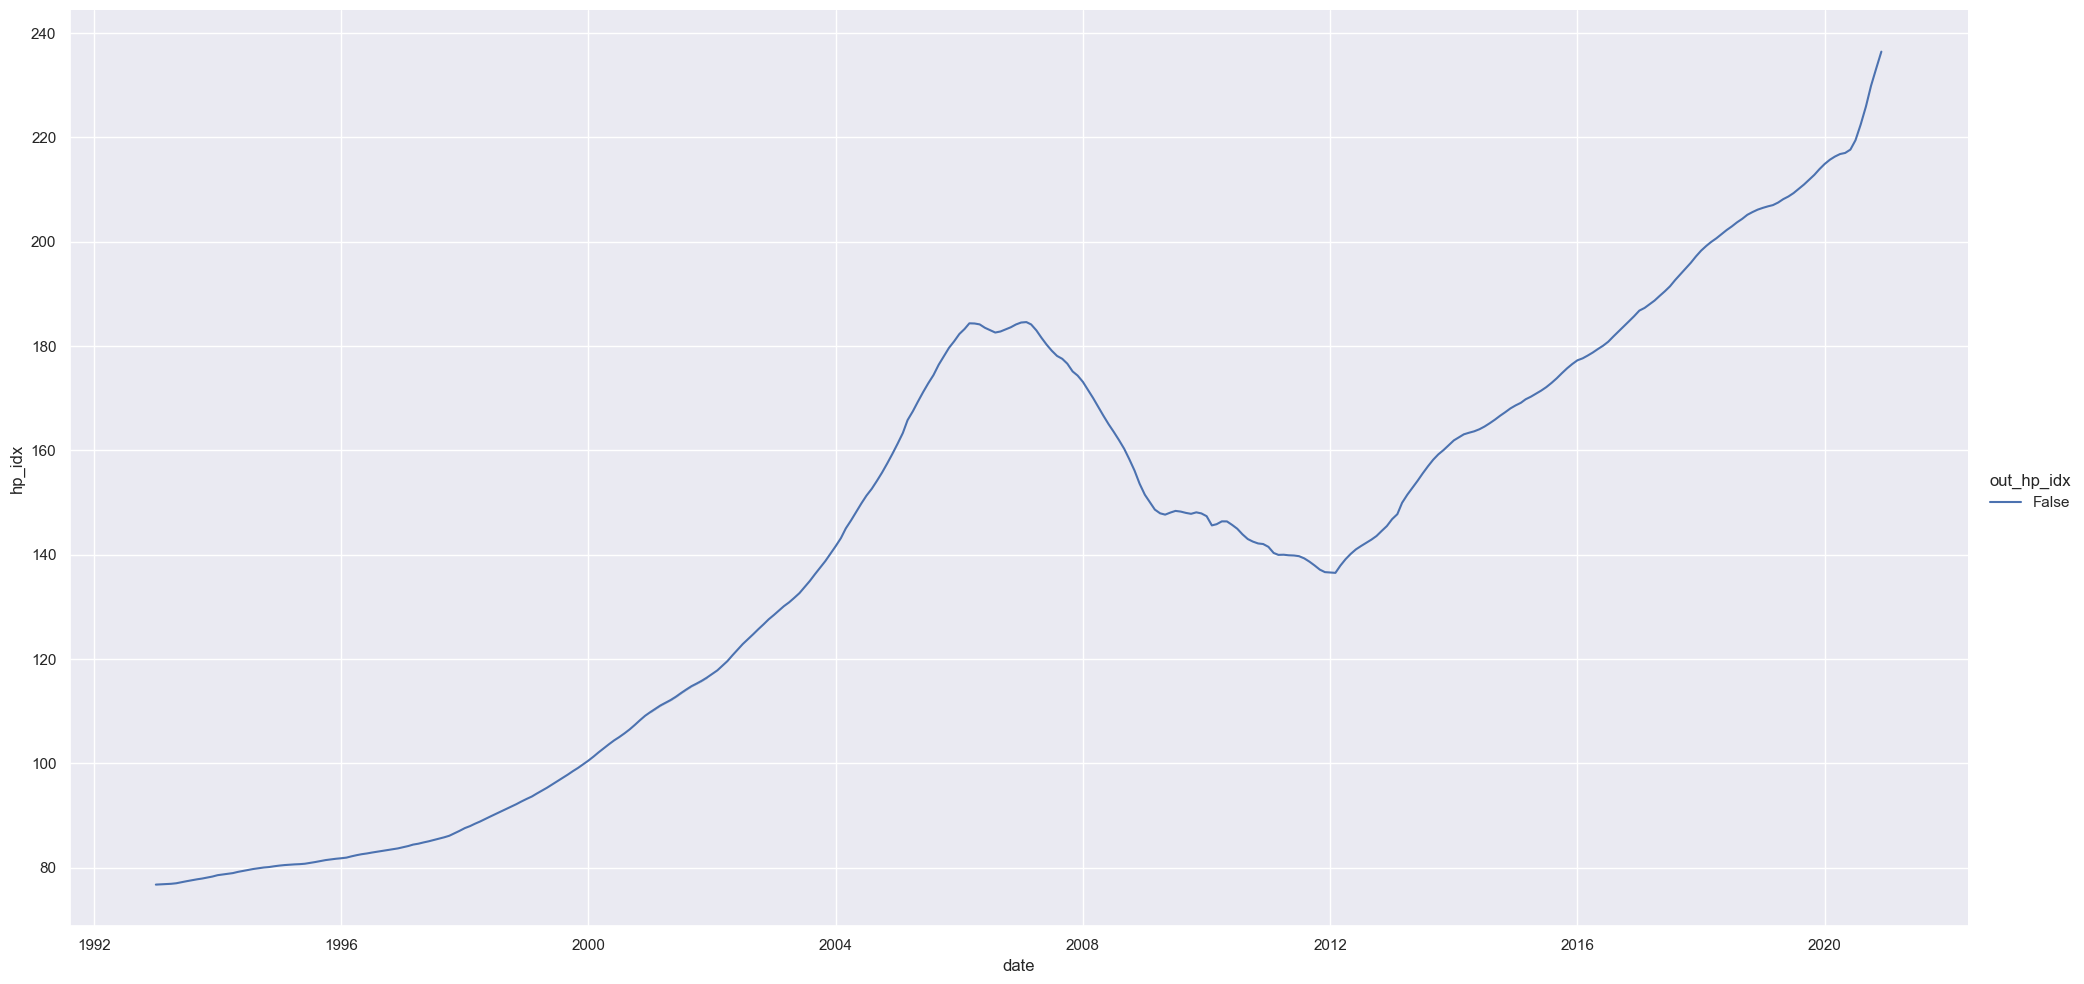

In [14]:
plt.close('all')
for col in x_mnth.columns:    
    sns.relplot(data=x_mnth_out.reset_index(), x='date', y=col, hue='out_' + col, kind='line', height=10, aspect=2)


In [15]:
x_qtr_out = detect_outlier(x_qtr)

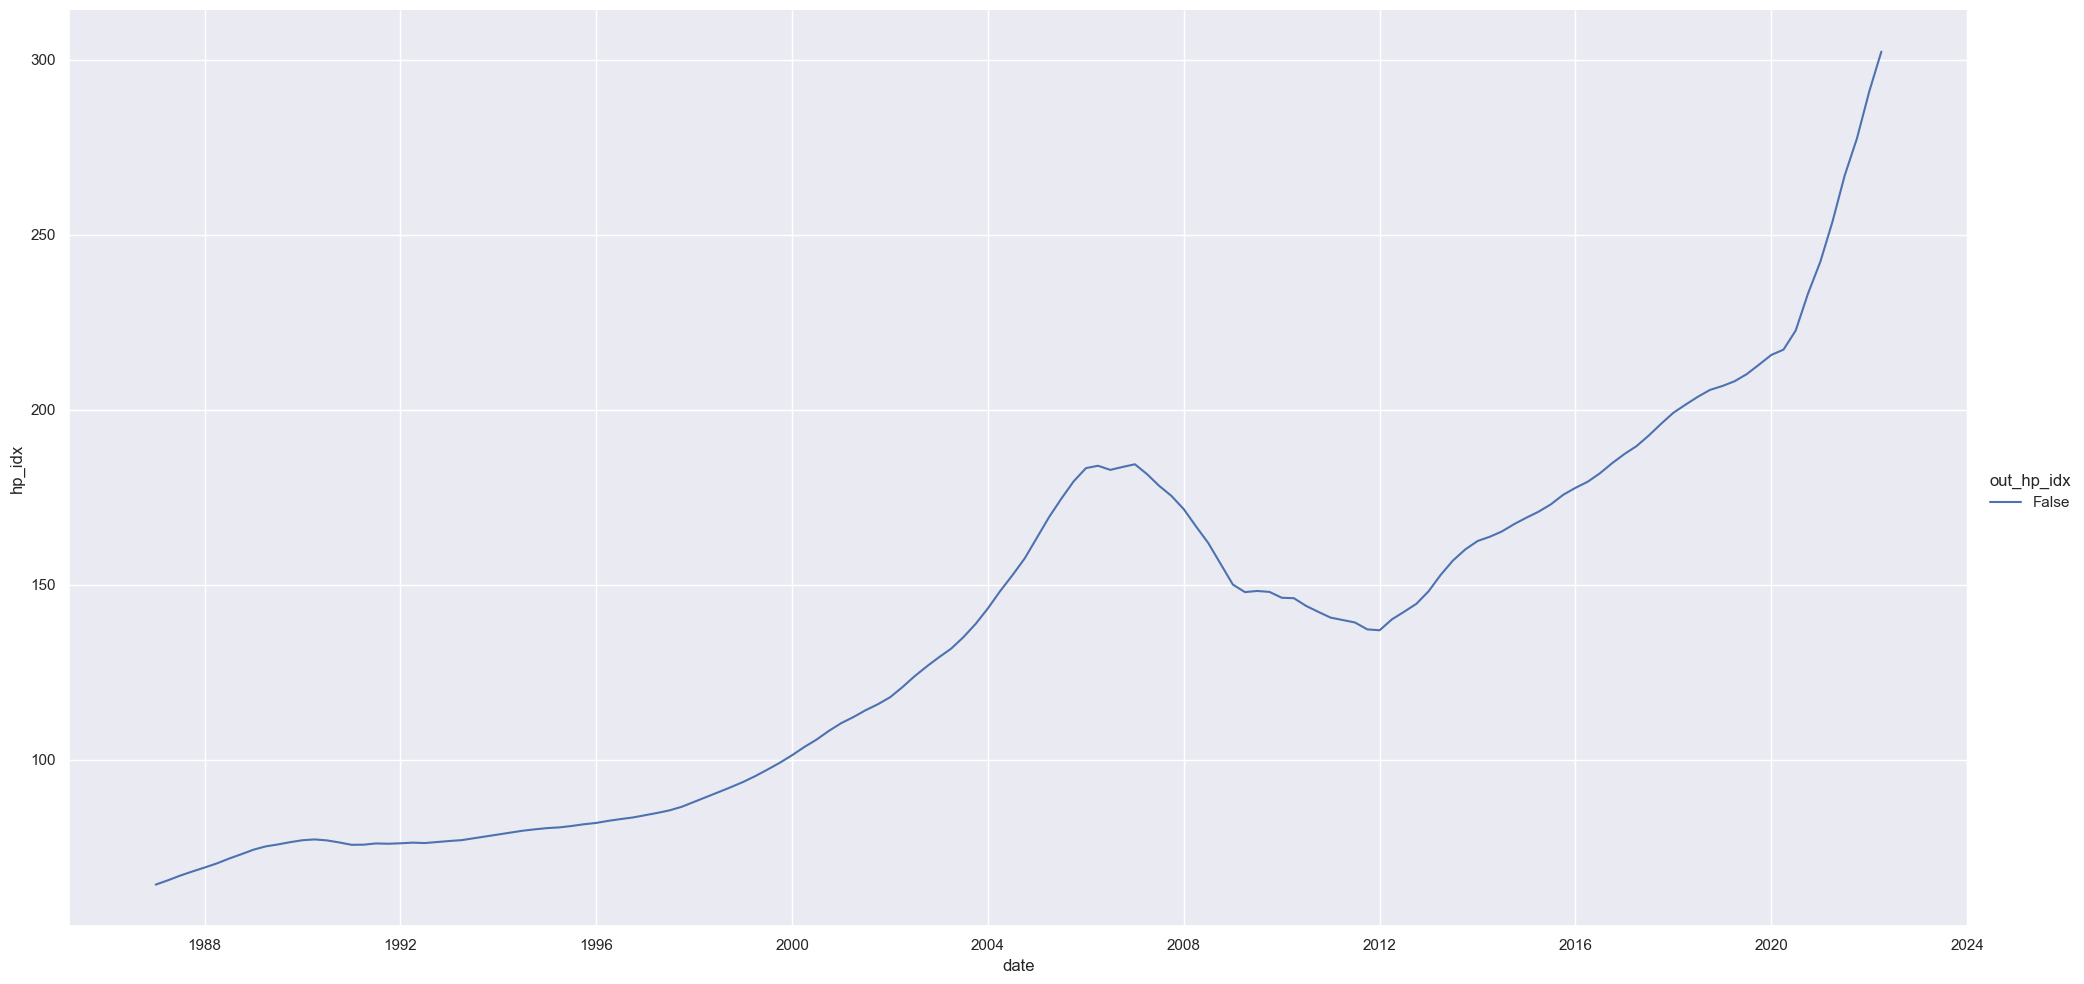

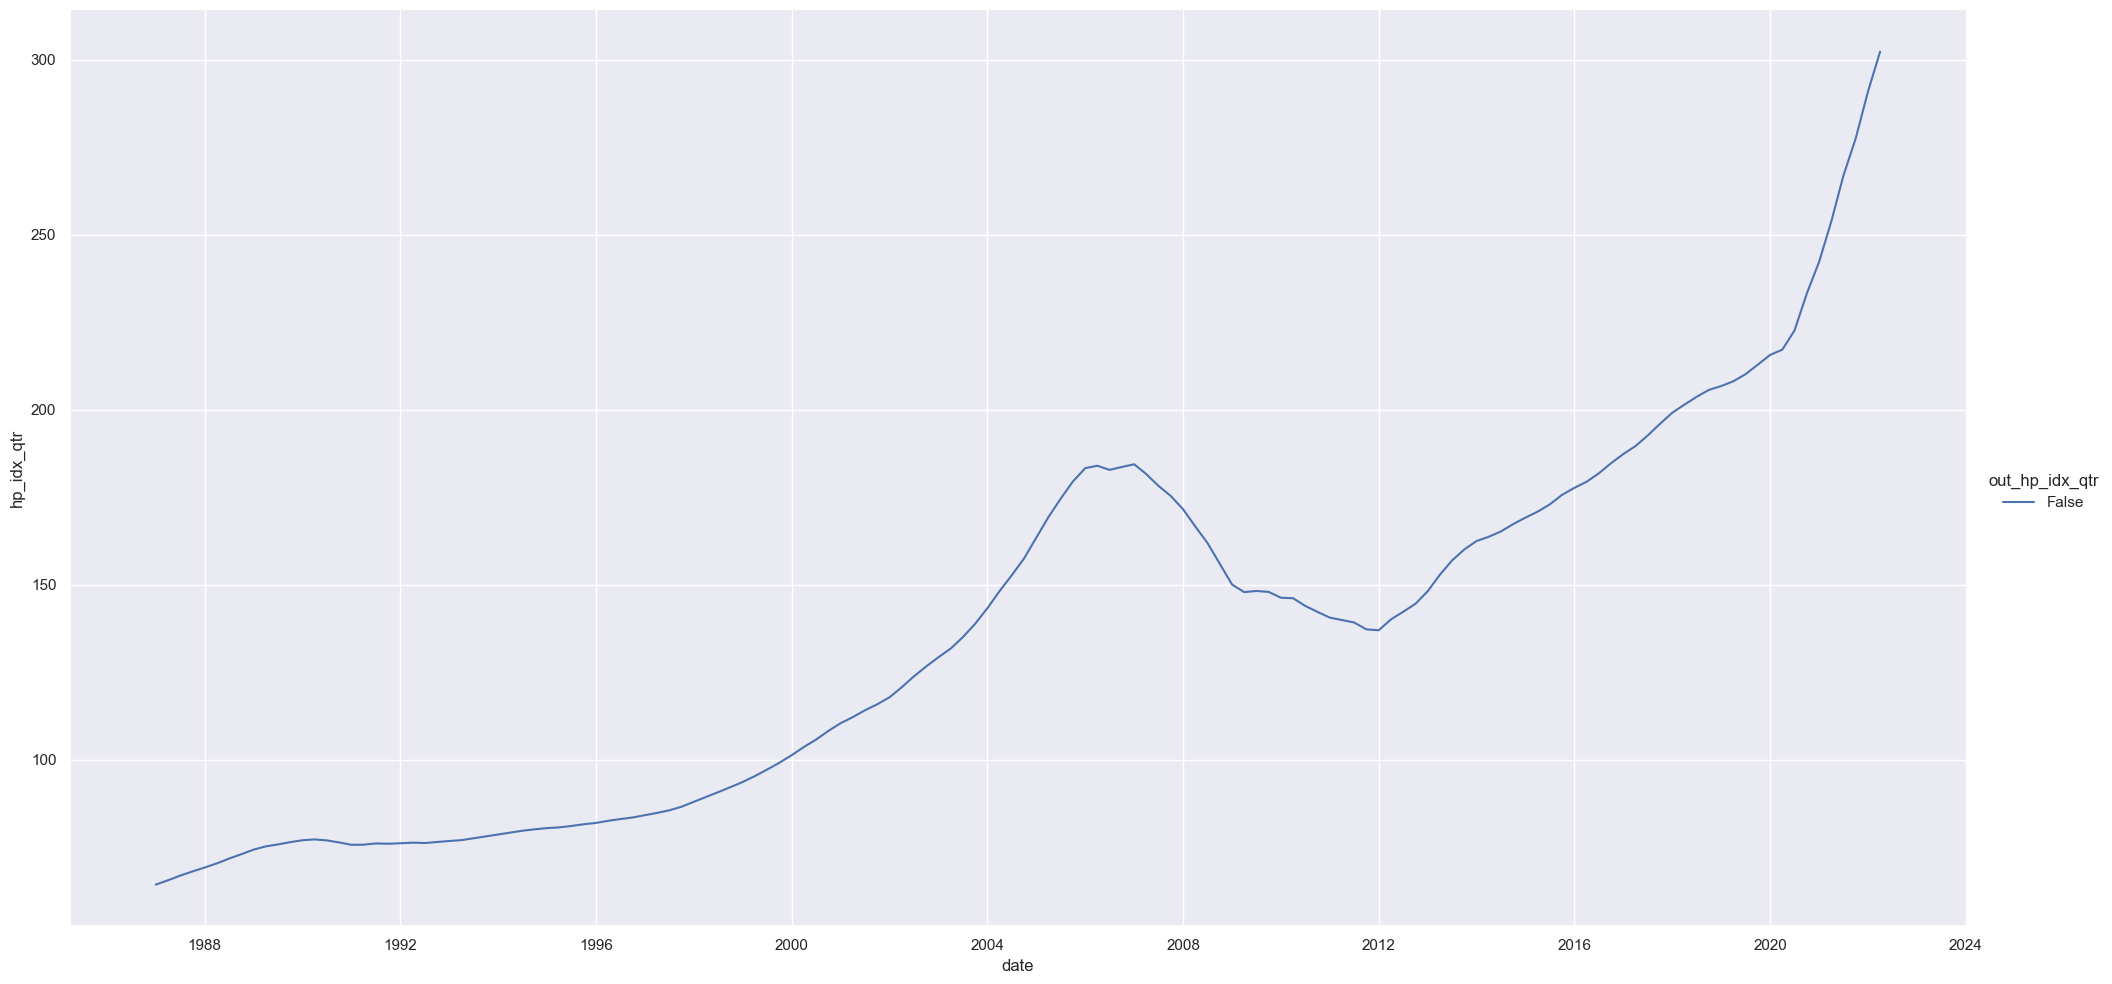

In [16]:
plt.close('all')
for col in x_qtr.columns:
    sns.relplot(data=x_qtr_out.reset_index(), x='date', y=col, hue='out_' + col, kind='line', height=10, aspect=2)

The line you provided is explaining the presence of outliers in a dataset by attributing them to specific events in time: the 2008 recession and the 2020 pandemic period. Let's break down the description:

Outliers values are explainable: This part suggests that there are data points in a dataset that deviate significantly from the typical or expected values. These unusual data points are commonly referred to as outliers.

As they occur around 2008 recession or 2020 pandemic period: This part explains why these outliers are considered explainable. It suggests that the outliers can be linked to specific time periods, namely, the economic recession that occurred around 2008 and the global pandemic that started in 2020. In other words, the extreme values in the data are likely a result of the unique circumstances or shocks associated with these events.

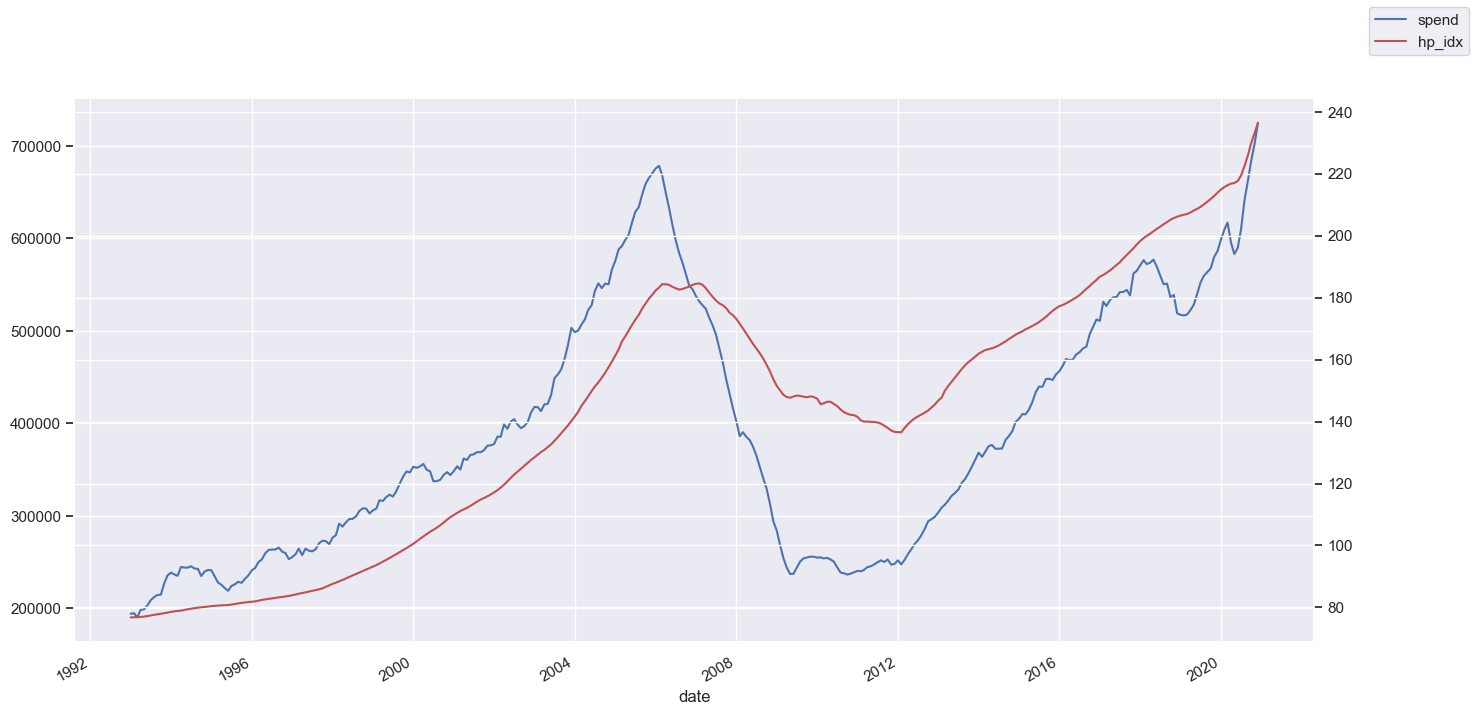

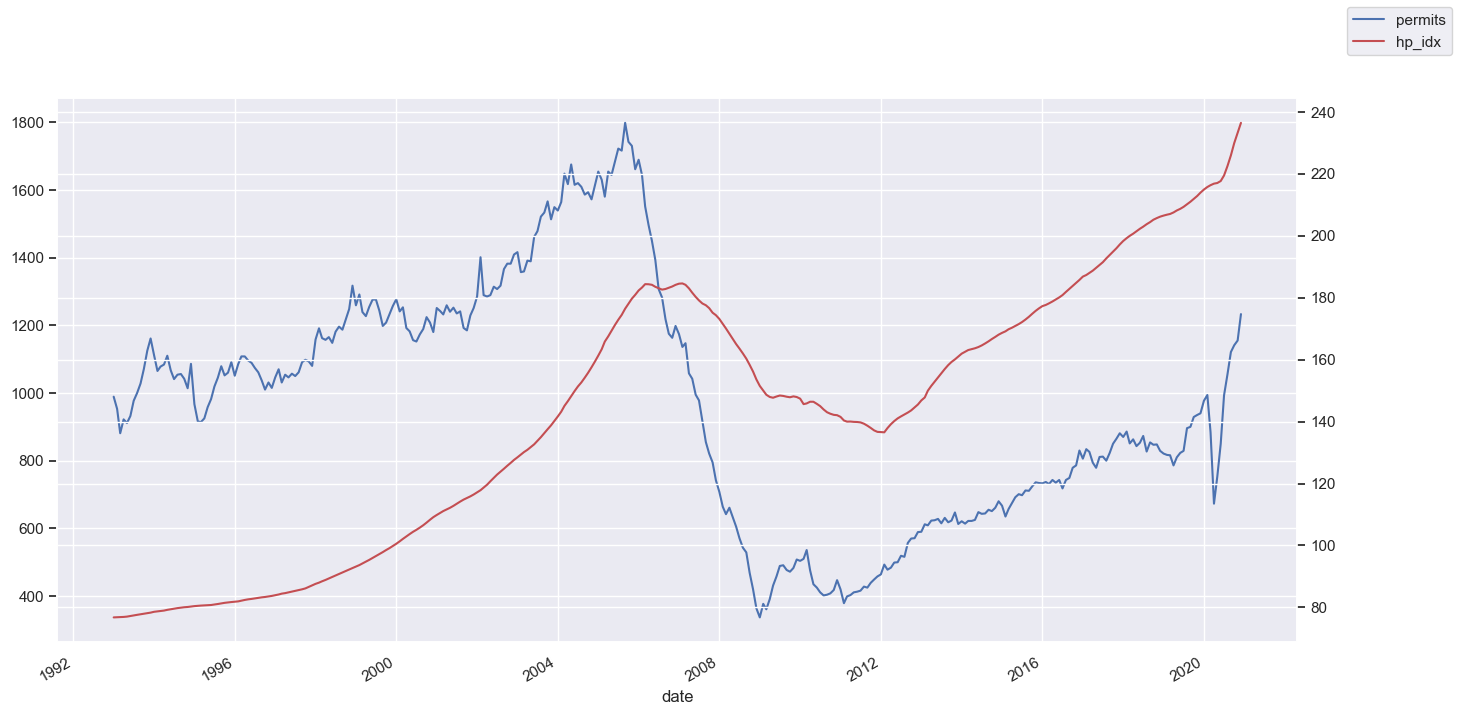

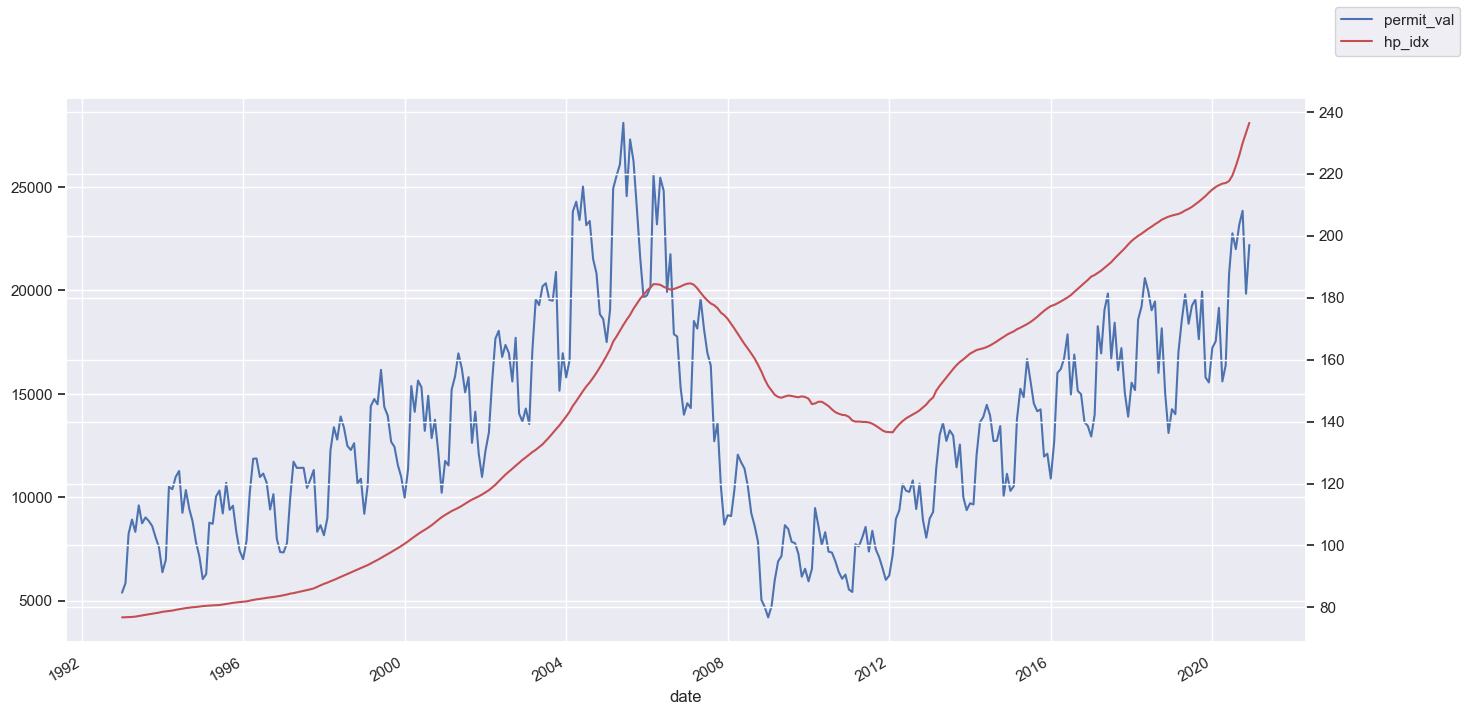

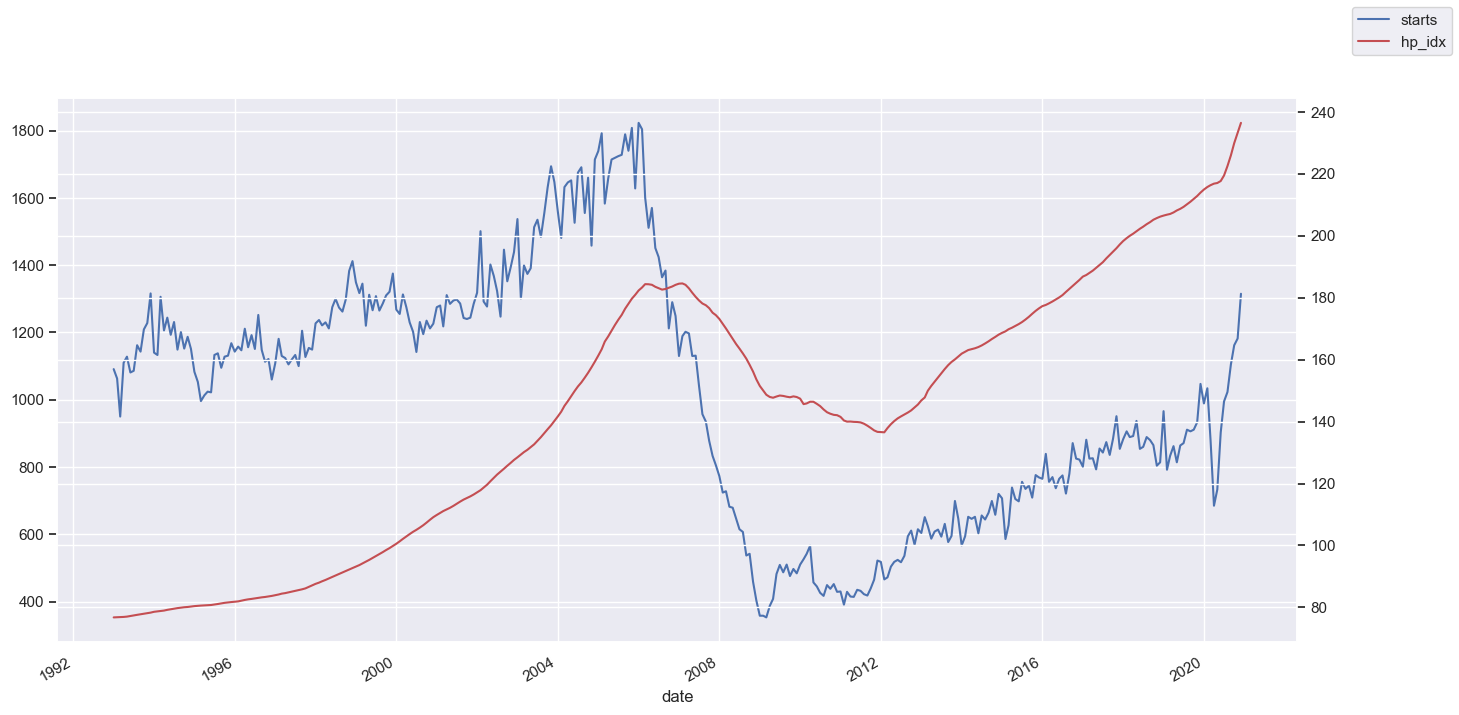

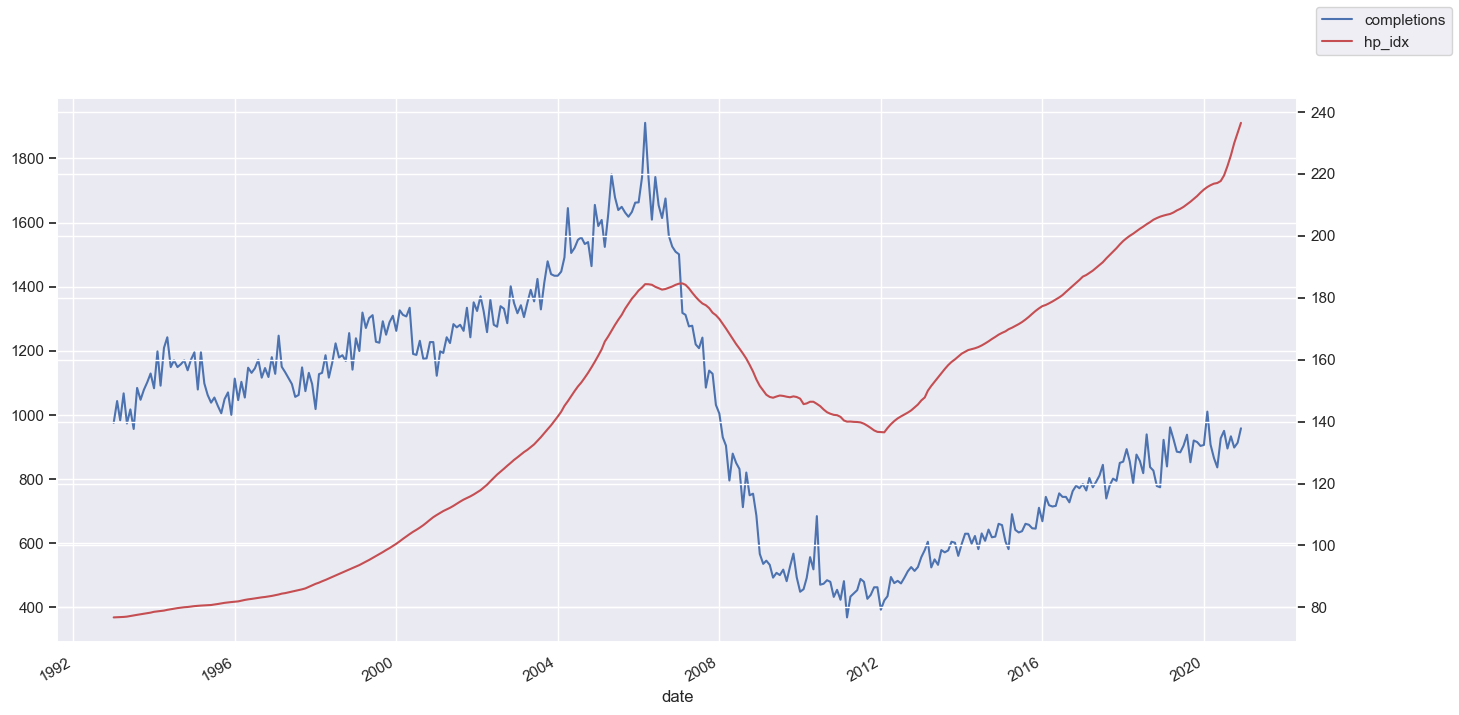

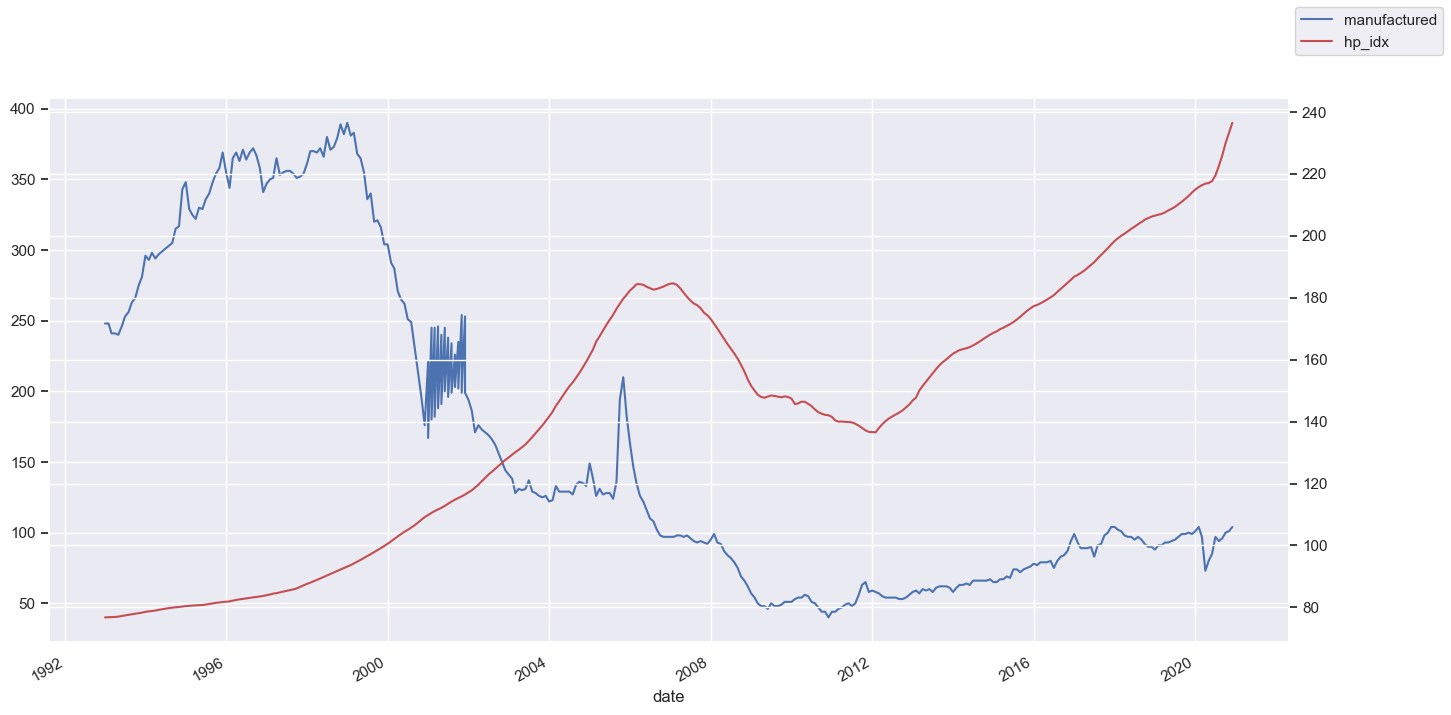

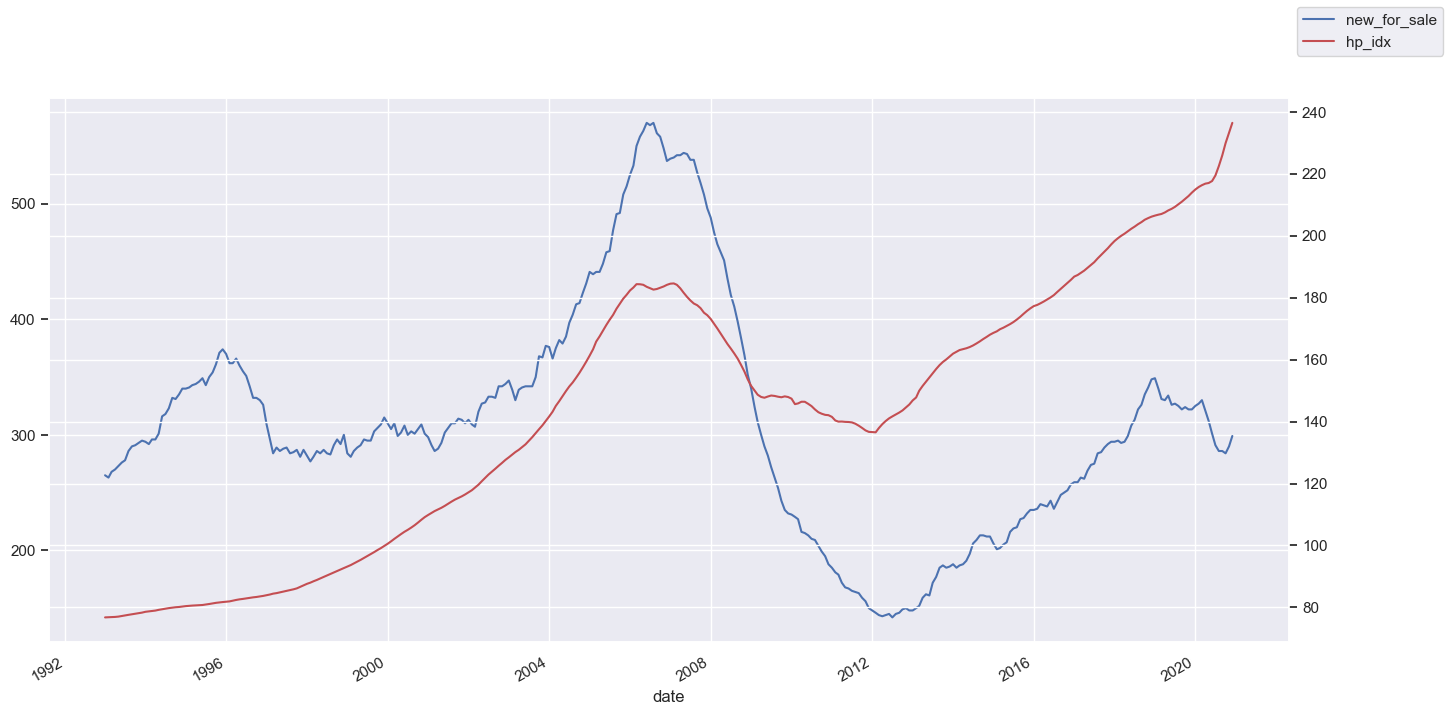

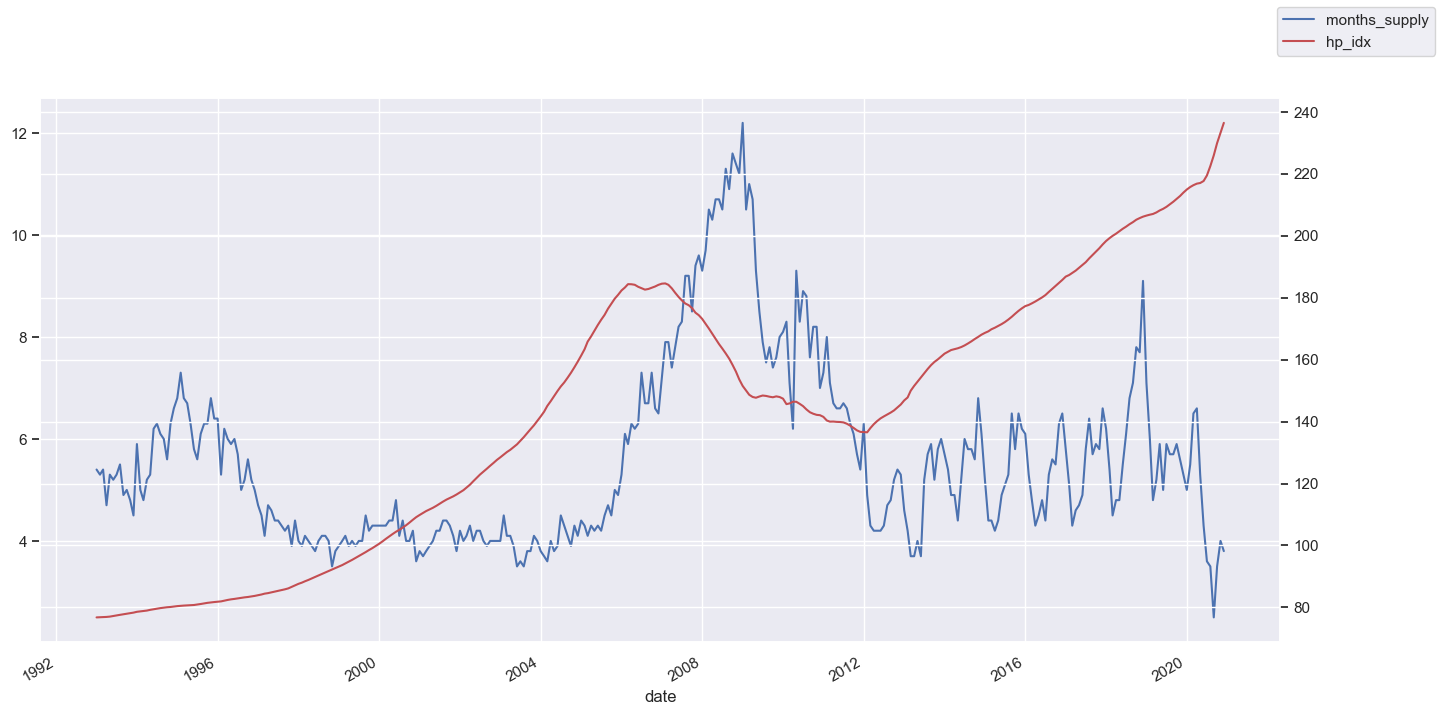

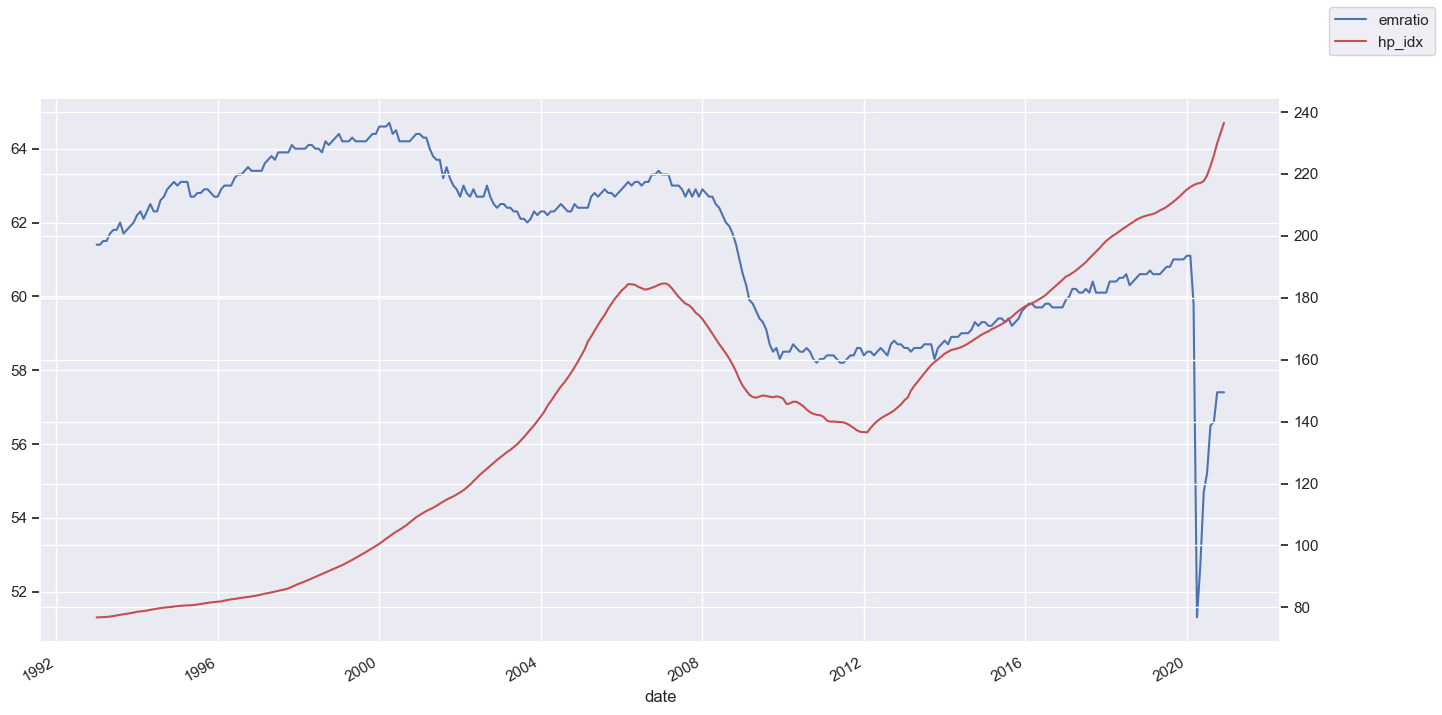

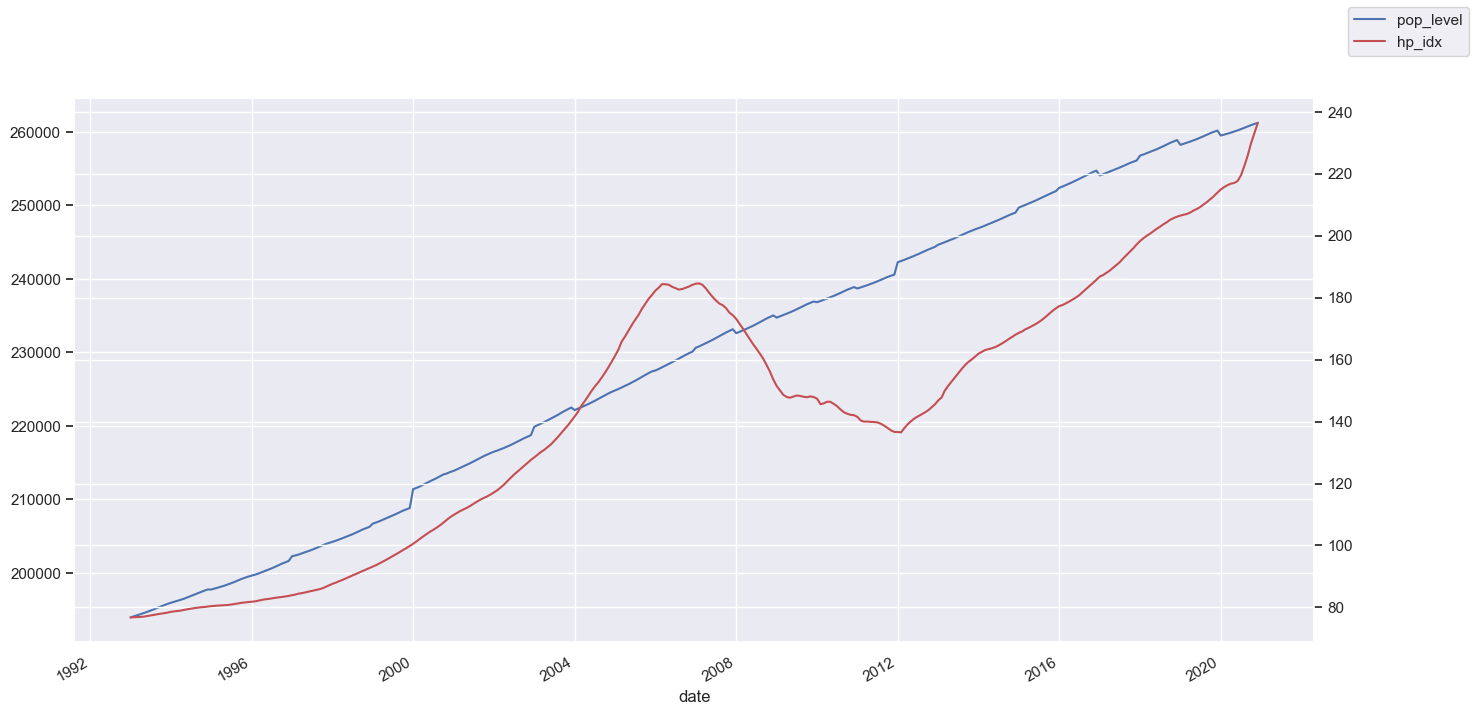

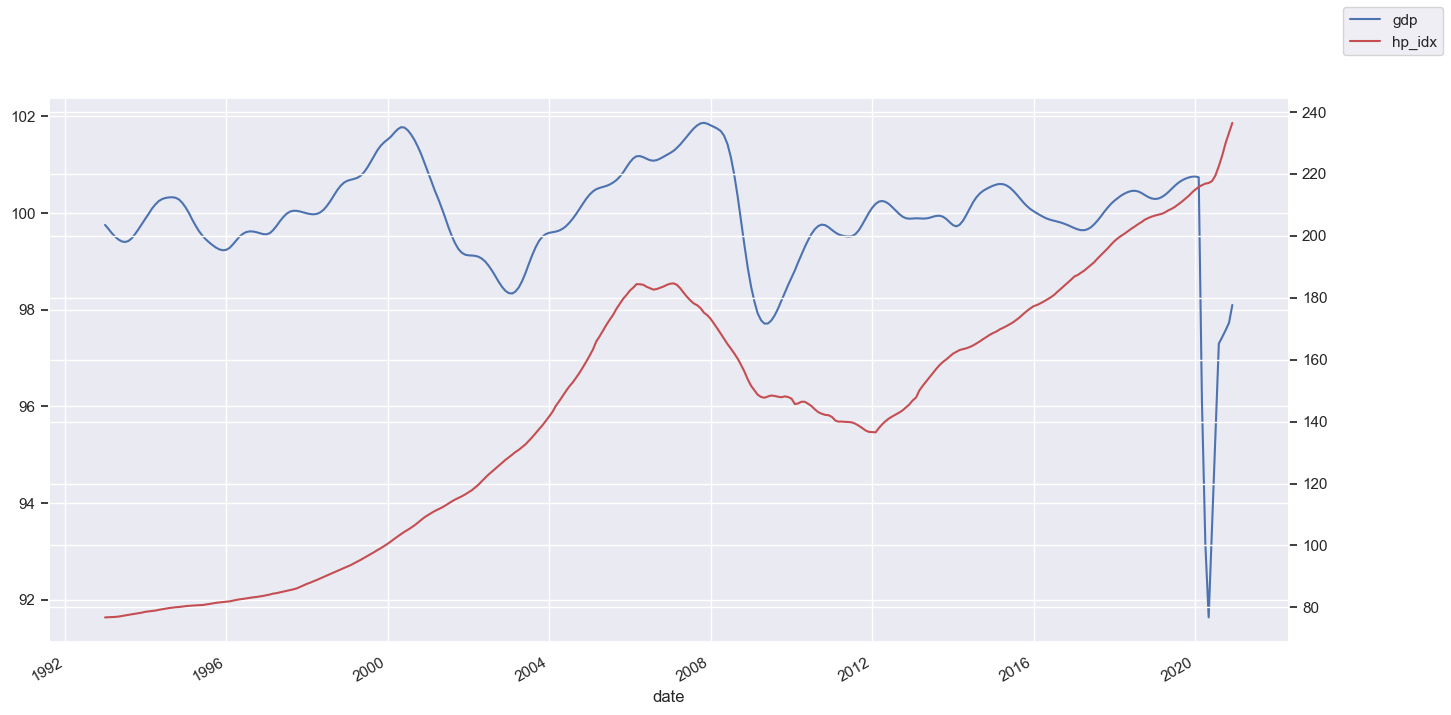

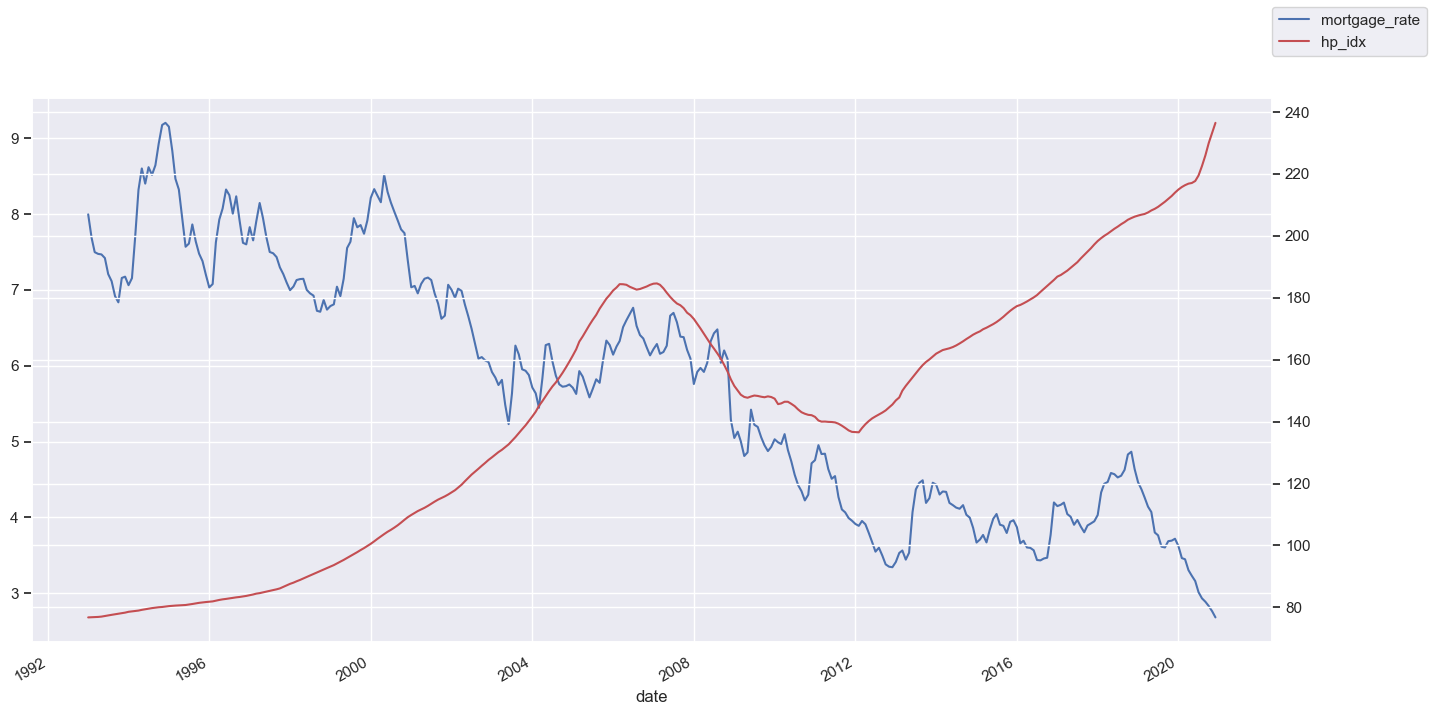

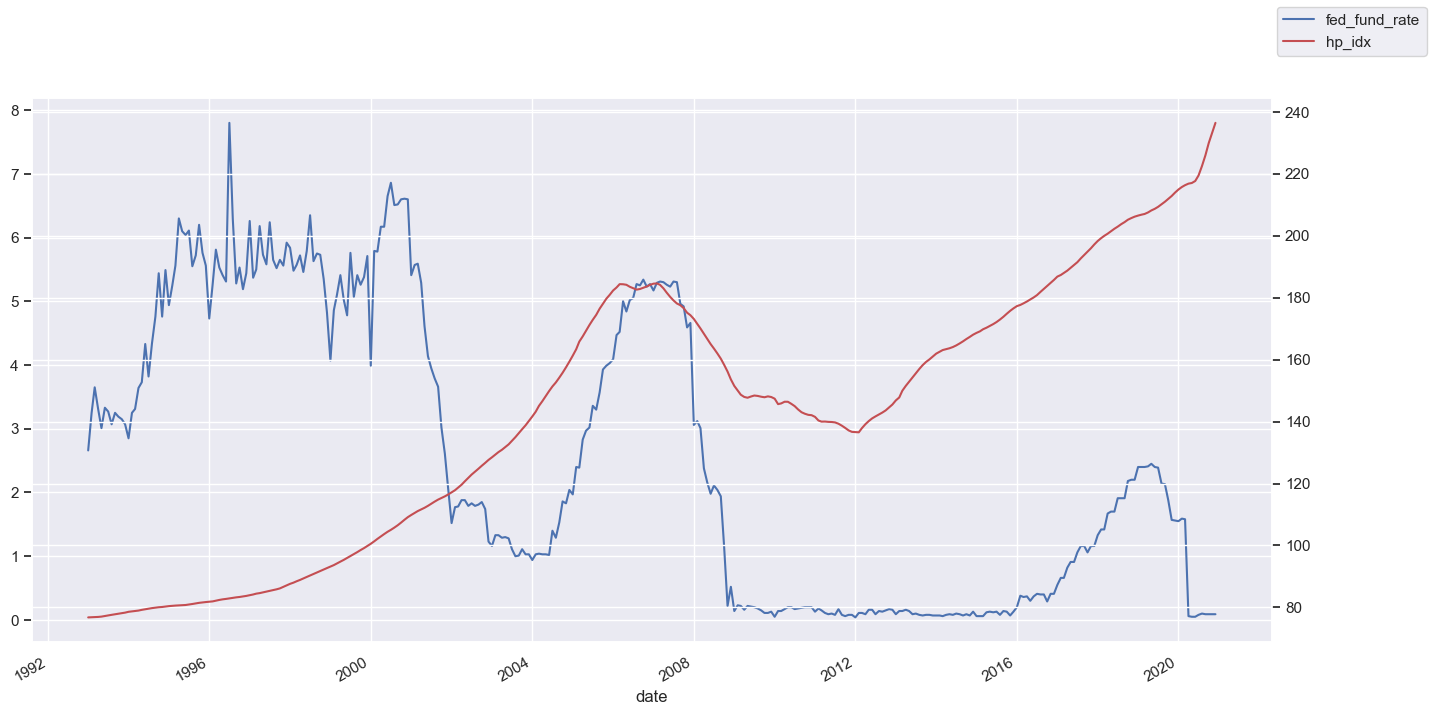

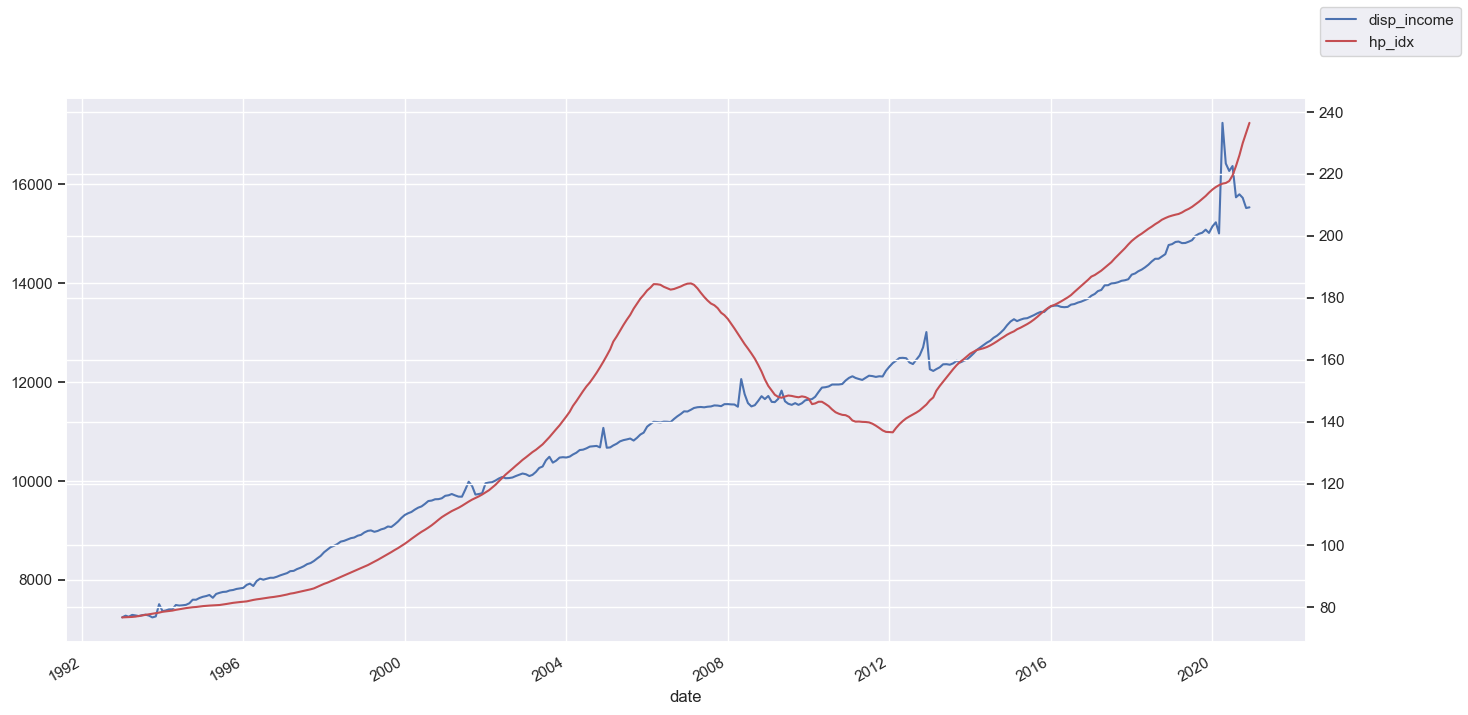

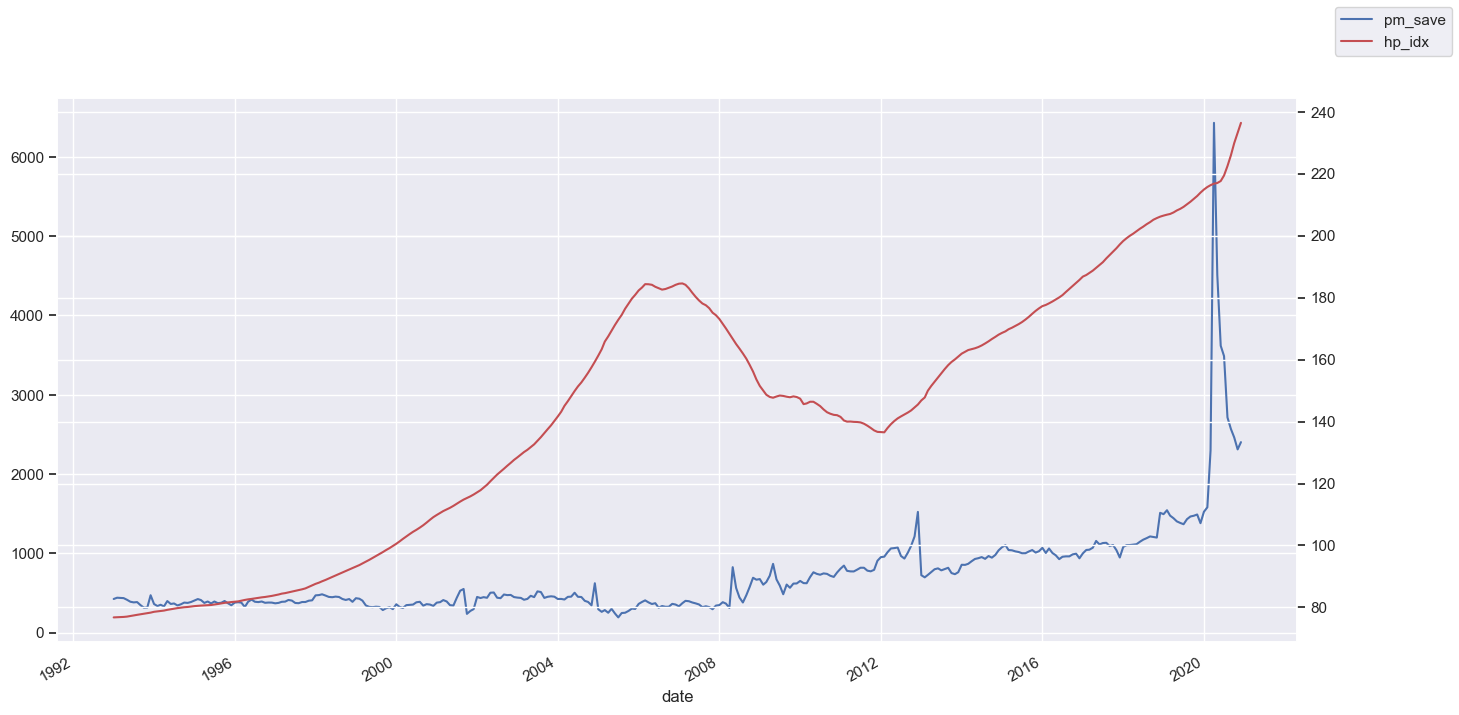

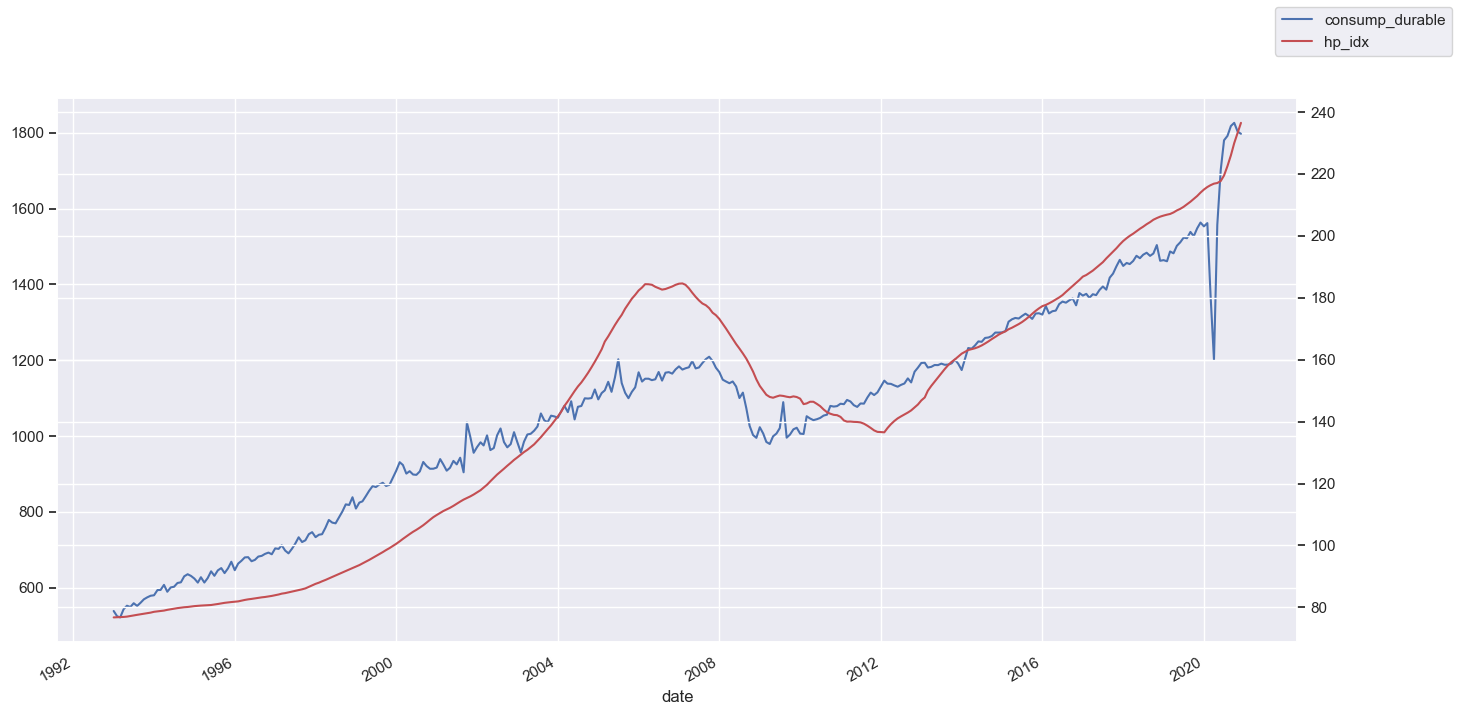

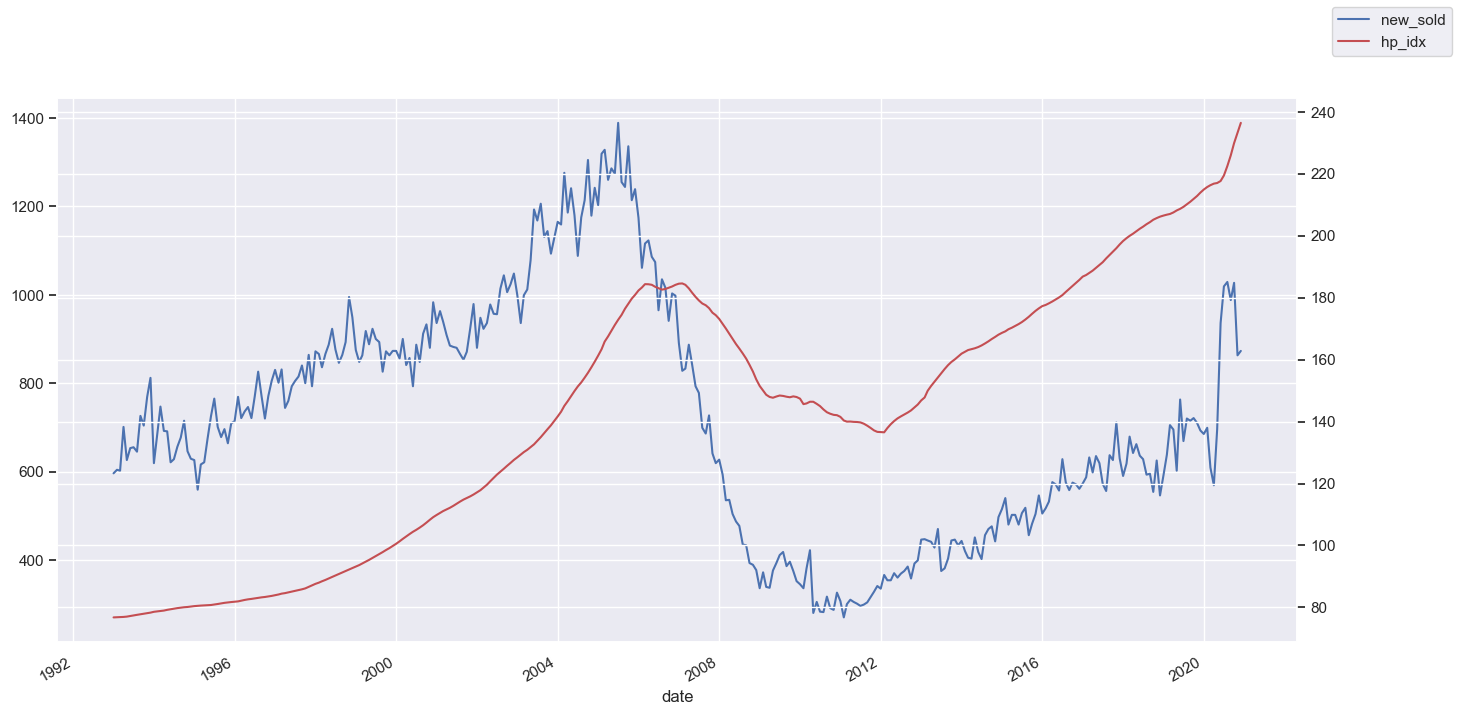

In [17]:
plt.close('all')
for col in x_mnth.columns[:-1]:    
    f, ax = plt.subplots(figsize=(16, 8))
    x_mnth.plot(y=col, legend=False, ax=ax)
    ax2 = ax.twinx()
    x_mnth.plot(y="hp_idx", ax=ax2, legend=False, color="r")
    ax.figure.legend()
    plt.show()

As for the specific description of "house price" ("hp_idx"), it's not entirely clear from the code alone. However, based on the code, "hp_idx" appears to represent some index or value related to house prices. The line plots visualize how this "house price index" (or whatever "hp_idx" represents) is related to other columns of data in the x_mnth dataset. The dual-axis setup allows you to examine the trends or correlations between these variables simultaneously.

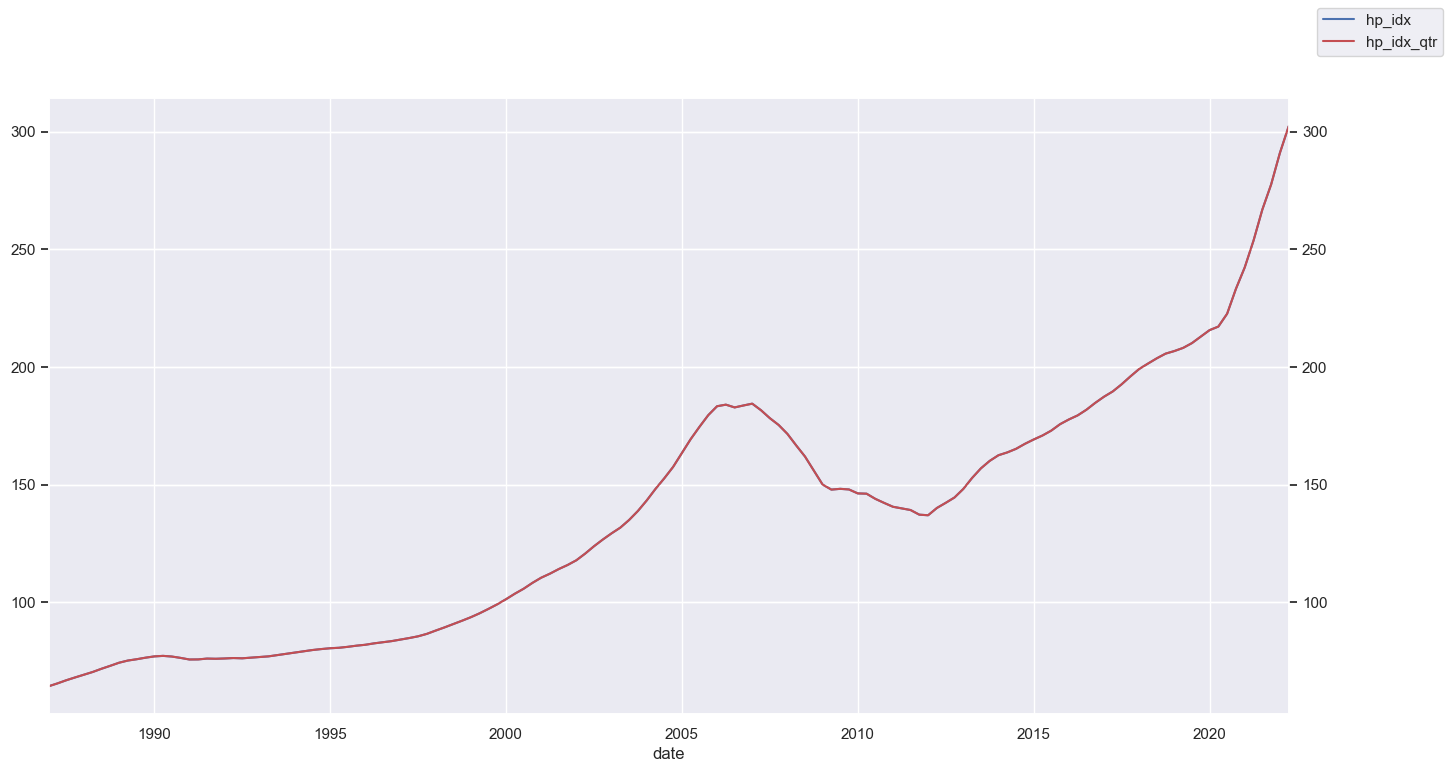

In [18]:
plt.close('all')
for col in x_qtr.columns[:-1]:    
    f, ax = plt.subplots(figsize=(16, 8))
    x_qtr.plot(y=col, legend=False, ax=ax)
    ax2 = ax.twinx()
    x_qtr.plot(y="hp_idx_qtr", ax=ax2, legend=False, color="r")
    ax.figure.legend()
    plt.show()

## Combining monthly and quarterly data
- I'll combine both datasets, by upsampling quarterly to monthly data, using linear interpolation (with two nearest neighbors) for missing data

In [19]:
x_qtr_monthly = x_qtr.resample('MS').interpolate(method='linear')
x_qtr_monthly.head()

hp_idx  hp_idx_qtr
date                             
1987-01-01  64.374667   64.374667
1987-02-01  64.779222   64.779222
1987-03-01  65.183778   65.183778
1987-04-01  65.588333   65.588333
1987-05-01  66.033778   66.033778

In [20]:
x_monthly_data = x_mnth.join(x_qtr_monthly, how='inner', lsuffix='_left', rsuffix='_right')

In [21]:
x_monthly_data

spend  permits  permit_val  starts  completions  manufactured  \
date                                                                         
1993-01-01  194150      989    5383.028    1091        975.0           248   
1993-02-01  194689      953    5844.533    1063       1043.0           248   
1993-03-01  190185      881    8227.729     950        983.0           241   
1993-04-01  198296      922    8918.858    1110       1067.0           241   
1993-05-01  198835      911    8320.702    1128        973.0           240   
...            ...      ...         ...     ...          ...           ...   
2020-08-01  641103     1055   21995.756    1023        895.0            94   
2020-09-01  662353     1121   23179.135    1105        933.0            96   
2020-10-01  684180     1141   23846.574    1162        898.0           100   
2020-11-01  702717     1155   19839.048    1182        913.0           101   
2020-12-01  725025     1233   22196.074    1315        958.0           104   

            new_for_sale  months_supply  emratio  pop_level        gdp  \
date                                                                     
1993-01-01           265            5.4     61.4     193962  99.750560   
1993-02-01           263            5.3     61.4     194108  99.668158   
1993-03-01           268            5.4     61.5     194248  99.585598   
1993-04-01           270            4.7     61.5     194398  99.511168   
1993-05-01           273            5.3     61.7     194549  99.450667   
...                  ...            ...      ...        ...        ...   
2020-08-01           286            3.5     56.5     260558  97.297319   
2020-09-01           286            2.5     56.6     260742  97.433292   
2020-10-01           284            3.5     57.4     260925  97.572374   
2020-11-01           290            4.0     57.4     261085  97.726275   
2020-12-01           299            3.8     57.4     261230  98.095174   

            mortgage_rate  fed_fund_rate  disp_income  pm_save  \
date                                                             
1993-01-01         7.9925           2.66       7237.6    425.6   
1993-02-01         7.6825           3.25       7271.8    441.5   
1993-03-01         7.4950           3.65       7249.2    439.0   
1993-04-01         7.4720           3.31       7286.8    436.4   
1993-05-01         7.4650           3.01       7276.3    415.8   
...                   ...            ...          ...      ...   
2020-08-01         2.9350           0.10      15739.2   2714.5   
2020-09-01         2.8900           0.09      15799.7   2569.3   
2020-10-01         2.8340           0.09      15729.1   2462.2   
2020-11-01         2.7650           0.09      15522.5   2311.5   
2020-12-01         2.6840           0.09      15536.5   2402.8   

            consump_durable  new_sold  hp_idx_left  hp_idx_right  hp_idx_qtr  
date                                                                          
1993-01-01            538.1       596       76.783     76.828667   76.828667  
1993-02-01            524.2       604       76.836     76.909667   76.909667  
1993-03-01            521.2       602       76.867     76.990667   76.990667  
1993-04-01            543.0       701       76.936     77.071667   77.071667  
1993-05-01            552.0       626       77.037     77.251667   77.251667  
...                     ...       ...          ...           ...         ...  
2020-08-01           1791.7      1029      222.484    226.145778  226.145778  
2020-09-01           1817.8       988      225.937    229.668556  229.668556  
2020-10-01           1826.1      1027      229.888    233.191333  233.191333  
2020-11-01           1803.1       863      233.253    236.223222  236.223222  
2020-12-01           1797.2       873      236.433    239.255111  239.255111  

[348 rows x 20 columns]

In [22]:
# Save the above dataset
x_monthly_data.to_csv(r'C:\House_price\notebook\data\x_monthly_data.csv')

### Correlation Matrix of Above dataset

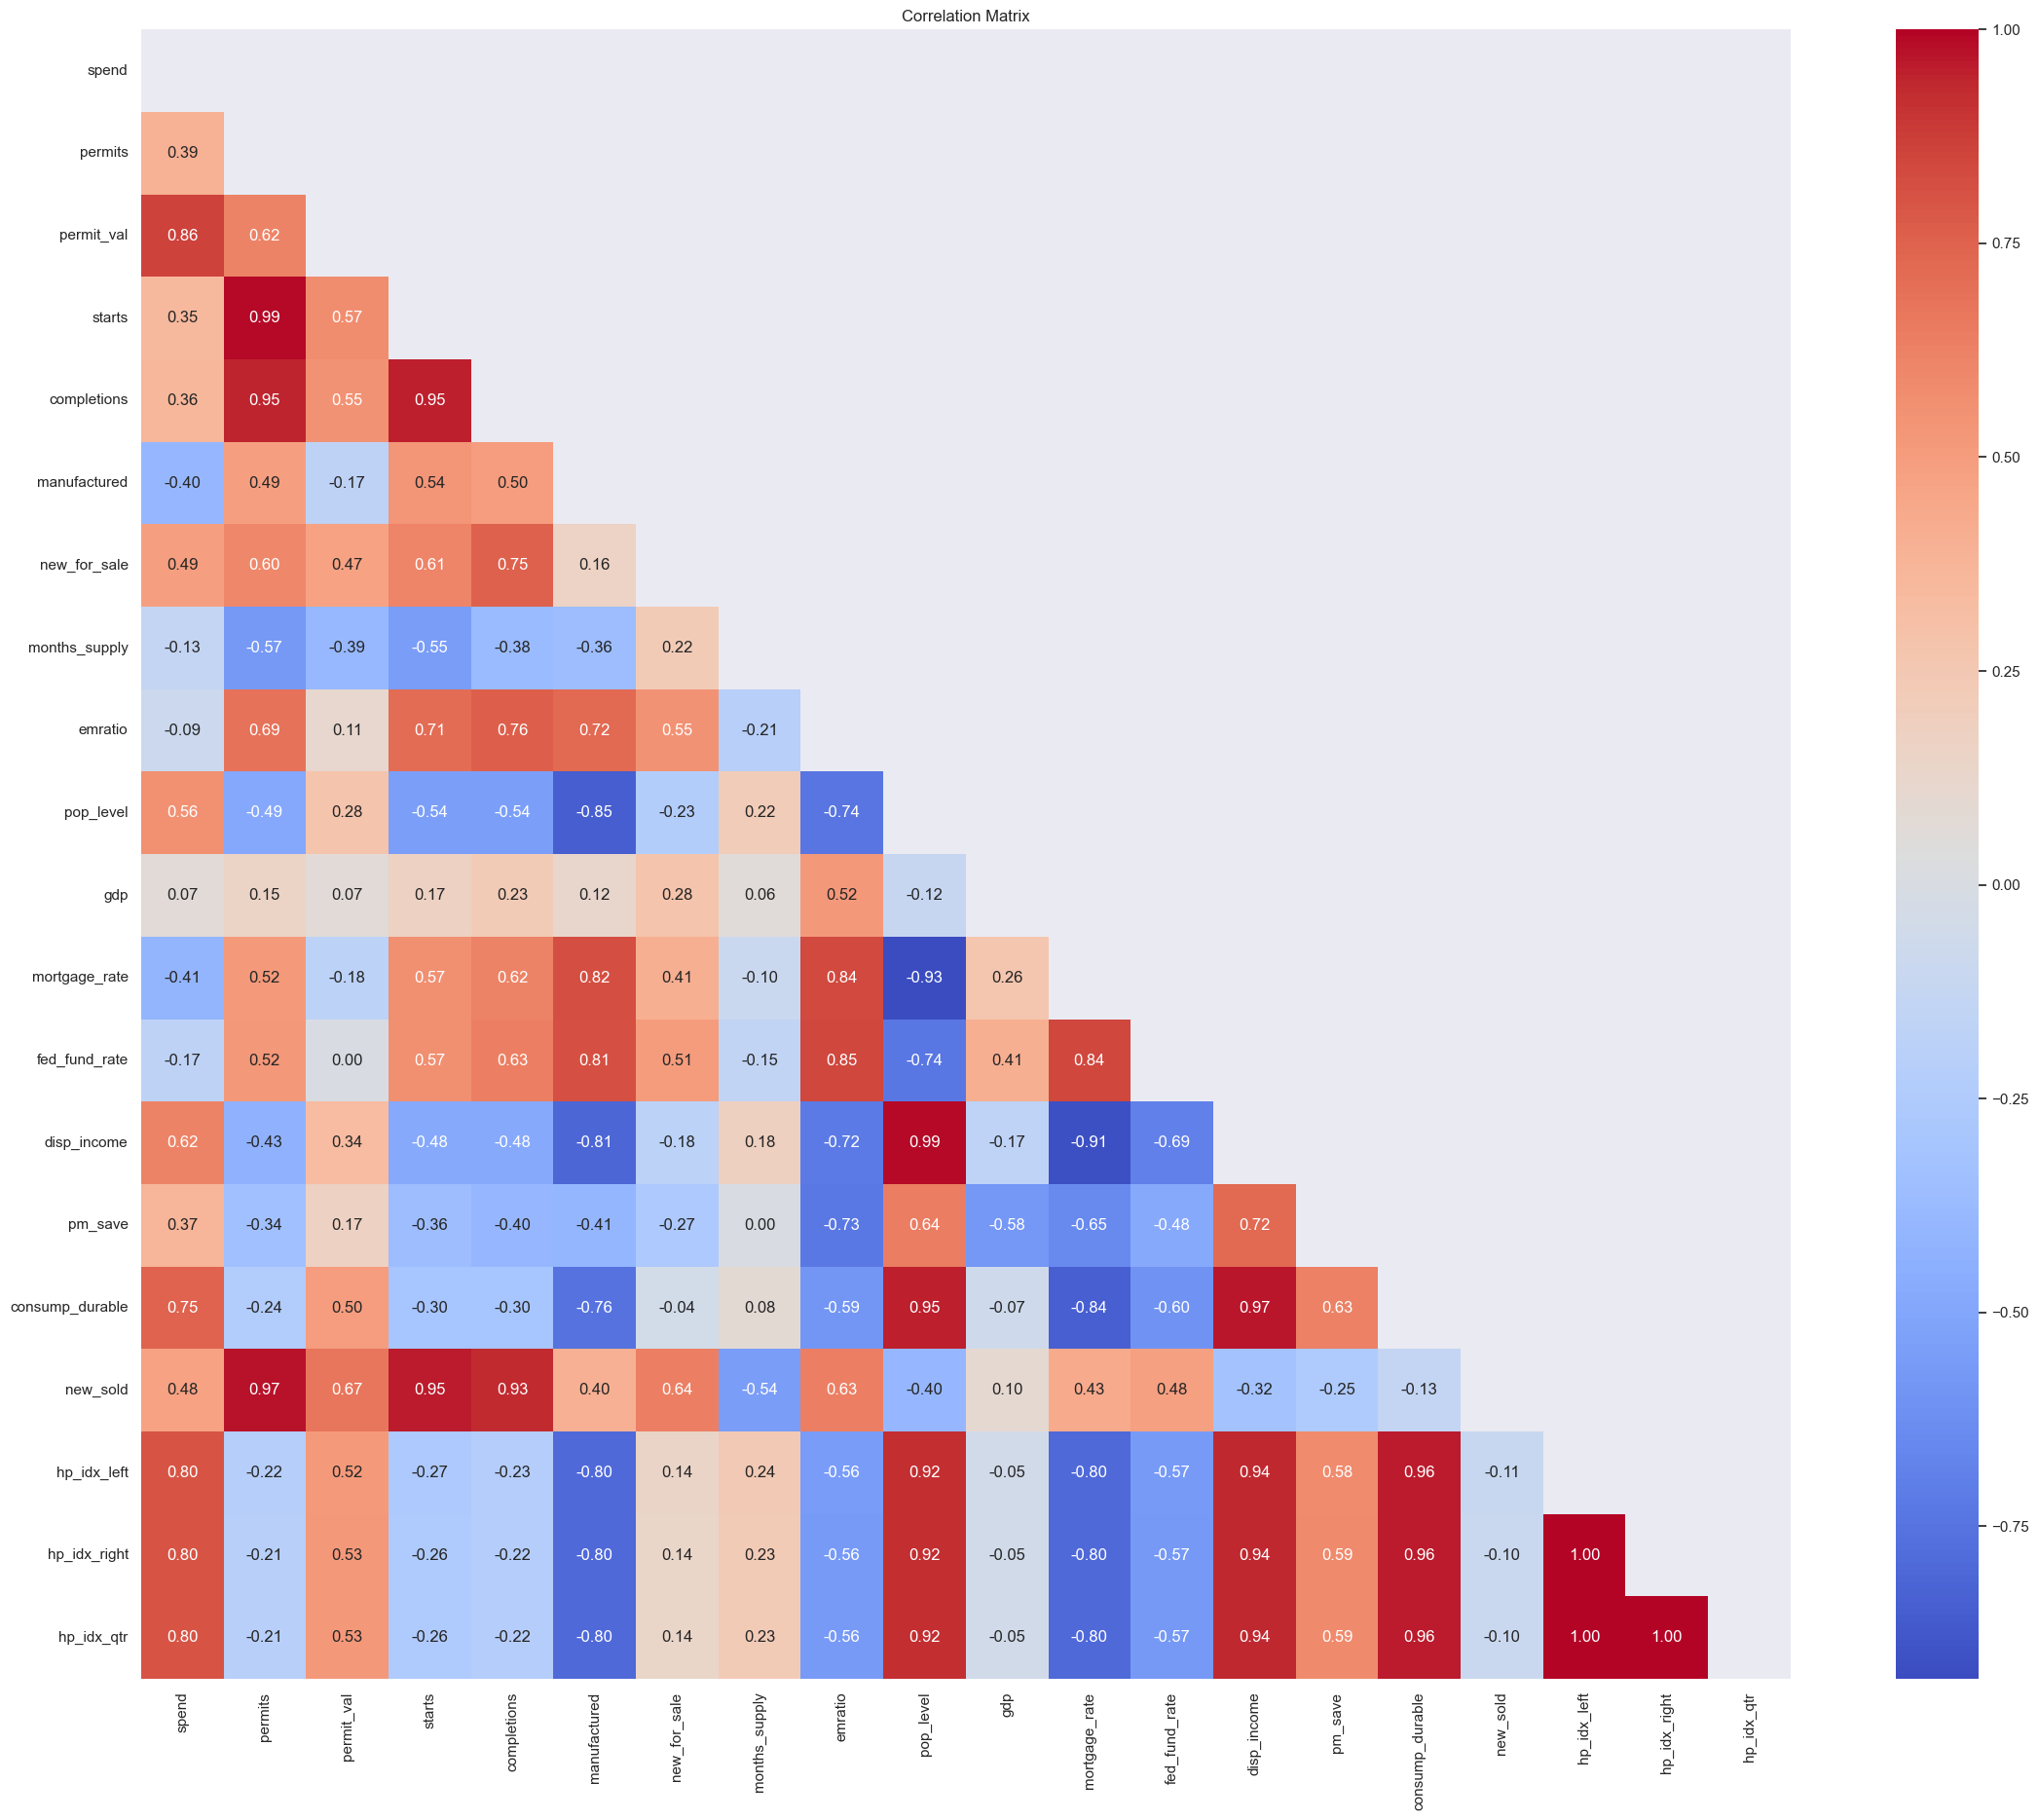

In [23]:
# Generate the correlation matrix
corr = x_monthly_data.corr()

# Create a mask to hide the upper triangle (to avoid duplicate information)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a figure and axis for the heatmap
_, ax = plt.subplots(figsize=(28, 22))

# Create the heatmap with annotations and apply the mask
p = sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True, ax=ax, mask=mask)

# Set the title of the heatmap
ax.set_title("Correlation Matrix")

# Display the heatmap
plt.show()

Insights
1. **Permits, Permit Value, Starts, Completions:** These construction-related features often exhibit high positive correlations. When permits are issued, their values tend to align, and as construction starts increase, more projects are likely to be completed. Increasing the correlation threshold would still group these features together due to their strong interdependence, making them valuable for analyzing construction trends.

2. **Disposable Income, Consumption, Population Level, Mortgage Rate:** Disposable income and consumption are positively correlated, as higher disposable income typically leads to increased spending. Population level and consumption can also have a positive relationship due to a larger consumer base. Mortgage rates may negatively correlate with disposable income and consumption, as higher rates can reduce disposable income. Raising the correlation threshold may emphasize the connection between disposable income and consumption, while population and mortgage rate may be less emphasized.

3. **Permits, New House Sold, Starts, Completions:** Permits and new house sales may have a positive correlation, indicating that when permits are issued, more new houses are likely to be sold. Starts and completions, as discussed previously, often have a positive correlation. Increasing the correlation threshold in this set of features would likely retain all variables, given their relevance to construction and housing development.